In [1]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import GRU,Dropout,SimpleRNN
from keras.optimizers import SGD
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.rcParams.update({'figure.figsize': (18, 8), 'figure.dpi': 100})

Using TensorFlow backend.


In [2]:
%matplotlib inline
sns.set()
plt.rcParams.update({'figure.figsize': (18, 8), 'figure.dpi': 100})

In [3]:
df = pd.read_csv('iig_bharati.csv')
df.obstime = pd.to_datetime(df.obstime)
df.set_index('obstime', inplace=True)

df=df[df.tempr>-100]
df.head()

tempr     rh    ws      wd      ap
obstime                                                
2012-01-28 12:00:00  -0.33  34.24  4.51  155.95  982.00
2012-01-28 13:00:00  -0.44  38.07  4.19  149.70  982.02
2012-01-28 14:00:00   0.02  40.88  4.06  149.46  981.18
2012-01-28 15:00:00  -0.15  43.44  2.95  118.61  980.60
2012-01-28 16:00:00   0.06  44.14  3.14  134.17  979.63

In [4]:

#df_month = df.resample('M').mean()
#temp = df_month[['temp']]
#temp.dropna(inplace=True)

In [5]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [6]:
#df=df.last(30)
raw_values = df['tempr'].values
# print(raw_values)

In [7]:
n_steps = 24
X, y = split_sequence(raw_values, n_steps)
for i in range(len(raw_values)-n_steps):
    print( X[i], y[i])
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

[-0.33 -0.44  0.02 -0.15  0.06 -0.01 -0.45 -1.47 -2.64 -3.2  -3.51 -3.61
 -3.85 -4.44 -5.11 -5.21 -5.06 -4.98 -4.43 -3.88 -3.3  -2.96 -2.3  -1.79] -1.13
[-0.44  0.02 -0.15  0.06 -0.01 -0.45 -1.47 -2.64 -3.2  -3.51 -3.61 -3.85
 -4.44 -5.11 -5.21 -5.06 -4.98 -4.43 -3.88 -3.3  -2.96 -2.3  -1.79 -1.13] 0.52
[ 0.02 -0.15  0.06 -0.01 -0.45 -1.47 -2.64 -3.2  -3.51 -3.61 -3.85 -4.44
 -5.11 -5.21 -5.06 -4.98 -4.43 -3.88 -3.3  -2.96 -2.3  -1.79 -1.13  0.52] 1.12
[-0.15  0.06 -0.01 -0.45 -1.47 -2.64 -3.2  -3.51 -3.61 -3.85 -4.44 -5.11
 -5.21 -5.06 -4.98 -4.43 -3.88 -3.3  -2.96 -2.3  -1.79 -1.13  0.52  1.12] 1.12
[ 0.06 -0.01 -0.45 -1.47 -2.64 -3.2  -3.51 -3.61 -3.85 -4.44 -5.11 -5.21
 -5.06 -4.98 -4.43 -3.88 -3.3  -2.96 -2.3  -1.79 -1.13  0.52  1.12  1.12] 0.99
[-0.01 -0.45 -1.47 -2.64 -3.2  -3.51 -3.61 -3.85 -4.44 -5.11 -5.21 -5.06
 -4.98 -4.43 -3.88 -3.3  -2.96 -2.3  -1.79 -1.13  0.52  1.12  1.12  0.99] 0.63
[-0.45 -1.47 -2.64 -3.2  -3.51 -3.61 -3.85 -4.44 -5.11 -5.21 -5.06 -4.98
 -4.43 -3.88 -

 -2.18 -2.12 -2.19 -1.8  -2.2  -2.26 -2.19 -2.29 -2.33 -2.36 -2.4  -2.56] -2.6
[-3.18 -2.58 -2.78 -4.4  -3.73 -3.31 -3.31 -3.05 -3.04 -2.79 -2.56 -2.18
 -2.12 -2.19 -1.8  -2.2  -2.26 -2.19 -2.29 -2.33 -2.36 -2.4  -2.56 -2.6 ] -2.43
[-2.58 -2.78 -4.4  -3.73 -3.31 -3.31 -3.05 -3.04 -2.79 -2.56 -2.18 -2.12
 -2.19 -1.8  -2.2  -2.26 -2.19 -2.29 -2.33 -2.36 -2.4  -2.56 -2.6  -2.43] -2.25
[-2.78 -4.4  -3.73 -3.31 -3.31 -3.05 -3.04 -2.79 -2.56 -2.18 -2.12 -2.19
 -1.8  -2.2  -2.26 -2.19 -2.29 -2.33 -2.36 -2.4  -2.56 -2.6  -2.43 -2.25] -2.24
[-4.4  -3.73 -3.31 -3.31 -3.05 -3.04 -2.79 -2.56 -2.18 -2.12 -2.19 -1.8
 -2.2  -2.26 -2.19 -2.29 -2.33 -2.36 -2.4  -2.56 -2.6  -2.43 -2.25 -2.24] -2.03
[-3.73 -3.31 -3.31 -3.05 -3.04 -2.79 -2.56 -2.18 -2.12 -2.19 -1.8  -2.2
 -2.26 -2.19 -2.29 -2.33 -2.36 -2.4  -2.56 -2.6  -2.43 -2.25 -2.24 -2.03] -1.87
[-3.31 -3.31 -3.05 -3.04 -2.79 -2.56 -2.18 -2.12 -2.19 -1.8  -2.2  -2.26
 -2.19 -2.29 -2.33 -2.36 -2.4  -2.56 -2.6  -2.43 -2.25 -2.24 -2.03 -1.87] -1.76
[-3.3

 -7.91 -7.69 -7.04 -6.21 -5.   -4.11 -2.91 -2.32 -2.   -1.68 -1.59 -1.66] -1.78
[ 0.43  0.23 -0.28 -2.1  -3.18 -3.62 -4.28 -5.55 -7.32 -8.75 -8.28 -7.91
 -7.69 -7.04 -6.21 -5.   -4.11 -2.91 -2.32 -2.   -1.68 -1.59 -1.66 -1.78] -2.56
[ 0.23 -0.28 -2.1  -3.18 -3.62 -4.28 -5.55 -7.32 -8.75 -8.28 -7.91 -7.69
 -7.04 -6.21 -5.   -4.11 -2.91 -2.32 -2.   -1.68 -1.59 -1.66 -1.78 -2.56] -4.02
[-0.28 -2.1  -3.18 -3.62 -4.28 -5.55 -7.32 -8.75 -8.28 -7.91 -7.69 -7.04
 -6.21 -5.   -4.11 -2.91 -2.32 -2.   -1.68 -1.59 -1.66 -1.78 -2.56 -4.02] -5.22
[-2.1  -3.18 -3.62 -4.28 -5.55 -7.32 -8.75 -8.28 -7.91 -7.69 -7.04 -6.21
 -5.   -4.11 -2.91 -2.32 -2.   -1.68 -1.59 -1.66 -1.78 -2.56 -4.02 -5.22] -6.53
[-3.18 -3.62 -4.28 -5.55 -7.32 -8.75 -8.28 -7.91 -7.69 -7.04 -6.21 -5.
 -4.11 -2.91 -2.32 -2.   -1.68 -1.59 -1.66 -1.78 -2.56 -4.02 -5.22 -6.53] -7.23
[-3.62 -4.28 -5.55 -7.32 -8.75 -8.28 -7.91 -7.69 -7.04 -6.21 -5.   -4.11
 -2.91 -2.32 -2.   -1.68 -1.59 -1.66 -1.78 -2.56 -4.02 -5.22 -6.53 -7.23] -7.85
[-4.

 -2.5  -2.38 -2.71 -2.79 -2.79 -2.85 -2.94 -3.01 -2.97 -2.66 -2.52 -2.35] -2.41
[-4.26 -4.23 -3.59 -4.27 -3.94 -3.07 -2.9  -2.87 -3.11 -2.77 -2.7  -2.5
 -2.38 -2.71 -2.79 -2.79 -2.85 -2.94 -3.01 -2.97 -2.66 -2.52 -2.35 -2.41] -3.8
[-4.23 -3.59 -4.27 -3.94 -3.07 -2.9  -2.87 -3.11 -2.77 -2.7  -2.5  -2.38
 -2.71 -2.79 -2.79 -2.85 -2.94 -3.01 -2.97 -2.66 -2.52 -2.35 -2.41 -3.8 ] -3.26
[-3.59 -4.27 -3.94 -3.07 -2.9  -2.87 -3.11 -2.77 -2.7  -2.5  -2.38 -2.71
 -2.79 -2.79 -2.85 -2.94 -3.01 -2.97 -2.66 -2.52 -2.35 -2.41 -3.8  -3.26] -2.14
[-4.27 -3.94 -3.07 -2.9  -2.87 -3.11 -2.77 -2.7  -2.5  -2.38 -2.71 -2.79
 -2.79 -2.85 -2.94 -3.01 -2.97 -2.66 -2.52 -2.35 -2.41 -3.8  -3.26 -2.14] -1.53
[-3.94 -3.07 -2.9  -2.87 -3.11 -2.77 -2.7  -2.5  -2.38 -2.71 -2.79 -2.79
 -2.85 -2.94 -3.01 -2.97 -2.66 -2.52 -2.35 -2.41 -3.8  -3.26 -2.14 -1.53] -1.62
[-3.07 -2.9  -2.87 -3.11 -2.77 -2.7  -2.5  -2.38 -2.71 -2.79 -2.79 -2.85
 -2.94 -3.01 -2.97 -2.66 -2.52 -2.35 -2.41 -3.8  -3.26 -2.14 -1.53 -1.62] -2.03
[-2.

 -2.7  -3.03 -3.14 -2.93 -2.04 -1.9  -1.81 -1.64 -1.4  -1.13 -0.71 -2.02] -2.51
[-8.53 -7.91 -7.09 -5.43 -4.23 -3.63 -3.13 -2.61 -2.65 -2.7  -2.76 -2.7
 -3.03 -3.14 -2.93 -2.04 -1.9  -1.81 -1.64 -1.4  -1.13 -0.71 -2.02 -2.51] -2.28
[-7.91 -7.09 -5.43 -4.23 -3.63 -3.13 -2.61 -2.65 -2.7  -2.76 -2.7  -3.03
 -3.14 -2.93 -2.04 -1.9  -1.81 -1.64 -1.4  -1.13 -0.71 -2.02 -2.51 -2.28] -1.07
[-7.09 -5.43 -4.23 -3.63 -3.13 -2.61 -2.65 -2.7  -2.76 -2.7  -3.03 -3.14
 -2.93 -2.04 -1.9  -1.81 -1.64 -1.4  -1.13 -0.71 -2.02 -2.51 -2.28 -1.07] -0.22
[-5.43 -4.23 -3.63 -3.13 -2.61 -2.65 -2.7  -2.76 -2.7  -3.03 -3.14 -2.93
 -2.04 -1.9  -1.81 -1.64 -1.4  -1.13 -0.71 -2.02 -2.51 -2.28 -1.07 -0.22] -0.61
[-4.23 -3.63 -3.13 -2.61 -2.65 -2.7  -2.76 -2.7  -3.03 -3.14 -2.93 -2.04
 -1.9  -1.81 -1.64 -1.4  -1.13 -0.71 -2.02 -2.51 -2.28 -1.07 -0.22 -0.61] -1.05
[-3.63 -3.13 -2.61 -2.65 -2.7  -2.76 -2.7  -3.03 -3.14 -2.93 -2.04 -1.9
 -1.81 -1.64 -1.4  -1.13 -0.71 -2.02 -2.51 -2.28 -1.07 -0.22 -0.61 -1.05] -1.17
[-3.

[ -9.11  -9.65  -9.82 -10.21  -9.98 -10.32 -10.58 -11.17 -11.11 -11.29
 -11.44 -11.24 -10.2   -9.3   -8.5   -8.13  -7.8   -7.54  -7.51  -7.82
  -8.23  -9.06 -10.38 -11.27] -11.24
[ -9.65  -9.82 -10.21  -9.98 -10.32 -10.58 -11.17 -11.11 -11.29 -11.44
 -11.24 -10.2   -9.3   -8.5   -8.13  -7.8   -7.54  -7.51  -7.82  -8.23
  -9.06 -10.38 -11.27 -11.24] -11.36
[ -9.82 -10.21  -9.98 -10.32 -10.58 -11.17 -11.11 -11.29 -11.44 -11.24
 -10.2   -9.3   -8.5   -8.13  -7.8   -7.54  -7.51  -7.82  -8.23  -9.06
 -10.38 -11.27 -11.24 -11.36] -12.05
[-10.21  -9.98 -10.32 -10.58 -11.17 -11.11 -11.29 -11.44 -11.24 -10.2
  -9.3   -8.5   -8.13  -7.8   -7.54  -7.51  -7.82  -8.23  -9.06 -10.38
 -11.27 -11.24 -11.36 -12.05] -12.64
[ -9.98 -10.32 -10.58 -11.17 -11.11 -11.29 -11.44 -11.24 -10.2   -9.3
  -8.5   -8.13  -7.8   -7.54  -7.51  -7.82  -8.23  -9.06 -10.38 -11.27
 -11.24 -11.36 -12.05 -12.64] -12.85
[-10.32 -10.58 -11.17 -11.11 -11.29 -11.44 -11.24 -10.2   -9.3   -8.5
  -8.13  -7.8   -7.54  -7.51  -7.82  

 -4.2  -5.39 -6.63 -6.94 -6.51 -5.8  -5.6  -5.65 -5.83 -5.69 -5.7  -5.44] -5.23
[-4.93 -4.58 -4.49 -4.21 -4.25 -4.   -4.06 -4.3  -4.37 -4.73 -4.47 -4.2
 -5.39 -6.63 -6.94 -6.51 -5.8  -5.6  -5.65 -5.83 -5.69 -5.7  -5.44 -5.23] -4.82
[-4.58 -4.49 -4.21 -4.25 -4.   -4.06 -4.3  -4.37 -4.73 -4.47 -4.2  -5.39
 -6.63 -6.94 -6.51 -5.8  -5.6  -5.65 -5.83 -5.69 -5.7  -5.44 -5.23 -4.82] -4.36
[-4.49 -4.21 -4.25 -4.   -4.06 -4.3  -4.37 -4.73 -4.47 -4.2  -5.39 -6.63
 -6.94 -6.51 -5.8  -5.6  -5.65 -5.83 -5.69 -5.7  -5.44 -5.23 -4.82 -4.36] -5.09
[-4.21 -4.25 -4.   -4.06 -4.3  -4.37 -4.73 -4.47 -4.2  -5.39 -6.63 -6.94
 -6.51 -5.8  -5.6  -5.65 -5.83 -5.69 -5.7  -5.44 -5.23 -4.82 -4.36 -5.09] -5.55
[-4.25 -4.   -4.06 -4.3  -4.37 -4.73 -4.47 -4.2  -5.39 -6.63 -6.94 -6.51
 -5.8  -5.6  -5.65 -5.83 -5.69 -5.7  -5.44 -5.23 -4.82 -4.36 -5.09 -5.55] -6.0
[-4.   -4.06 -4.3  -4.37 -4.73 -4.47 -4.2  -5.39 -6.63 -6.94 -6.51 -5.8
 -5.6  -5.65 -5.83 -5.69 -5.7  -5.44 -5.23 -4.82 -4.36 -5.09 -5.55 -6.  ] -6.59
[-4.0

 -13.67 -14.3  -14.54 -13.96] -13.96
[-13.65 -13.6  -13.64 -13.95 -14.36 -13.97 -13.52 -12.89 -12.69 -11.67
 -11.6  -11.55 -11.34 -11.83 -12.1  -12.9  -12.84 -12.56 -12.3  -13.67
 -14.3  -14.54 -13.96 -13.96] -13.42
[-13.6  -13.64 -13.95 -14.36 -13.97 -13.52 -12.89 -12.69 -11.67 -11.6
 -11.55 -11.34 -11.83 -12.1  -12.9  -12.84 -12.56 -12.3  -13.67 -14.3
 -14.54 -13.96 -13.96 -13.42] -13.36
[-13.64 -13.95 -14.36 -13.97 -13.52 -12.89 -12.69 -11.67 -11.6  -11.55
 -11.34 -11.83 -12.1  -12.9  -12.84 -12.56 -12.3  -13.67 -14.3  -14.54
 -13.96 -13.96 -13.42 -13.36] -13.45
[-13.95 -14.36 -13.97 -13.52 -12.89 -12.69 -11.67 -11.6  -11.55 -11.34
 -11.83 -12.1  -12.9  -12.84 -12.56 -12.3  -13.67 -14.3  -14.54 -13.96
 -13.96 -13.42 -13.36 -13.45] -13.43
[-14.36 -13.97 -13.52 -12.89 -12.69 -11.67 -11.6  -11.55 -11.34 -11.83
 -12.1  -12.9  -12.84 -12.56 -12.3  -13.67 -14.3  -14.54 -13.96 -13.96
 -13.42 -13.36 -13.45 -13.43] -13.32
[-13.97 -13.52 -12.89 -12.69 -11.67 -11.6  -11.55 -11.34 -11.83 -12.1


 -11.46 -10.72 -10.25 -10.22] -9.98
[ -7.56  -7.69  -7.49  -7.51  -7.37  -7.63  -7.84  -8.74  -9.84  -9.66
  -9.62  -9.64 -10.02 -10.85 -10.63 -10.49 -11.28 -11.88 -11.39 -11.46
 -10.72 -10.25 -10.22  -9.98] -10.08
[ -7.69  -7.49  -7.51  -7.37  -7.63  -7.84  -8.74  -9.84  -9.66  -9.62
  -9.64 -10.02 -10.85 -10.63 -10.49 -11.28 -11.88 -11.39 -11.46 -10.72
 -10.25 -10.22  -9.98 -10.08] -10.49
[ -7.49  -7.51  -7.37  -7.63  -7.84  -8.74  -9.84  -9.66  -9.62  -9.64
 -10.02 -10.85 -10.63 -10.49 -11.28 -11.88 -11.39 -11.46 -10.72 -10.25
 -10.22  -9.98 -10.08 -10.49] -10.97
[ -7.51  -7.37  -7.63  -7.84  -8.74  -9.84  -9.66  -9.62  -9.64 -10.02
 -10.85 -10.63 -10.49 -11.28 -11.88 -11.39 -11.46 -10.72 -10.25 -10.22
  -9.98 -10.08 -10.49 -10.97] -10.93
[ -7.37  -7.63  -7.84  -8.74  -9.84  -9.66  -9.62  -9.64 -10.02 -10.85
 -10.63 -10.49 -11.28 -11.88 -11.39 -11.46 -10.72 -10.25 -10.22  -9.98
 -10.08 -10.49 -10.97 -10.93] -10.95
[ -7.63  -7.84  -8.74  -9.84  -9.66  -9.62  -9.64 -10.02 -10.85 -10.6

[-11.   -11.47 -11.71 -12.15 -12.52 -12.79 -12.23 -12.05 -11.43 -10.97
 -10.97 -10.79 -10.91 -11.1  -11.4  -11.32 -11.59 -11.48 -11.18 -10.88
 -10.89 -11.05 -11.13 -11.55] -12.6
[-11.47 -11.71 -12.15 -12.52 -12.79 -12.23 -12.05 -11.43 -10.97 -10.97
 -10.79 -10.91 -11.1  -11.4  -11.32 -11.59 -11.48 -11.18 -10.88 -10.89
 -11.05 -11.13 -11.55 -12.6 ] -13.56
[-11.71 -12.15 -12.52 -12.79 -12.23 -12.05 -11.43 -10.97 -10.97 -10.79
 -10.91 -11.1  -11.4  -11.32 -11.59 -11.48 -11.18 -10.88 -10.89 -11.05
 -11.13 -11.55 -12.6  -13.56] -13.93
[-12.15 -12.52 -12.79 -12.23 -12.05 -11.43 -10.97 -10.97 -10.79 -10.91
 -11.1  -11.4  -11.32 -11.59 -11.48 -11.18 -10.88 -10.89 -11.05 -11.13
 -11.55 -12.6  -13.56 -13.93] -14.31
[-12.52 -12.79 -12.23 -12.05 -11.43 -10.97 -10.97 -10.79 -10.91 -11.1
 -11.4  -11.32 -11.59 -11.48 -11.18 -10.88 -10.89 -11.05 -11.13 -11.55
 -12.6  -13.56 -13.93 -14.31] -14.29
[-12.79 -12.23 -12.05 -11.43 -10.97 -10.97 -10.79 -10.91 -11.1  -11.4
 -11.32 -11.59 -11.48 -11.18 -10.88 -

[-5.29 -5.6  -5.36 -5.27 -5.06 -5.14 -5.32 -5.31 -4.87 -4.66 -5.09 -5.4
 -5.48 -5.47 -6.02 -5.99 -6.13 -6.94 -7.08 -7.7  -7.76 -7.62 -7.68 -7.35] -7.05
[-5.6  -5.36 -5.27 -5.06 -5.14 -5.32 -5.31 -4.87 -4.66 -5.09 -5.4  -5.48
 -5.47 -6.02 -5.99 -6.13 -6.94 -7.08 -7.7  -7.76 -7.62 -7.68 -7.35 -7.05] -7.04
[-5.36 -5.27 -5.06 -5.14 -5.32 -5.31 -4.87 -4.66 -5.09 -5.4  -5.48 -5.47
 -6.02 -5.99 -6.13 -6.94 -7.08 -7.7  -7.76 -7.62 -7.68 -7.35 -7.05 -7.04] -6.6
[-5.27 -5.06 -5.14 -5.32 -5.31 -4.87 -4.66 -5.09 -5.4  -5.48 -5.47 -6.02
 -5.99 -6.13 -6.94 -7.08 -7.7  -7.76 -7.62 -7.68 -7.35 -7.05 -7.04 -6.6 ] -6.43
[-5.06 -5.14 -5.32 -5.31 -4.87 -4.66 -5.09 -5.4  -5.48 -5.47 -6.02 -5.99
 -6.13 -6.94 -7.08 -7.7  -7.76 -7.62 -7.68 -7.35 -7.05 -7.04 -6.6  -6.43] -6.76
[-5.14 -5.32 -5.31 -4.87 -4.66 -5.09 -5.4  -5.48 -5.47 -6.02 -5.99 -6.13
 -6.94 -7.08 -7.7  -7.76 -7.62 -7.68 -7.35 -7.05 -7.04 -6.6  -6.43 -6.76] -6.72
[-5.32 -5.31 -4.87 -4.66 -5.09 -5.4  -5.48 -5.47 -6.02 -5.99 -6.13 -6.94
 -7.08 -7.7

 -16.1  -15.51 -15.01 -14.96] -14.6
[-18.54 -18.13 -17.31 -17.06 -16.93 -17.39 -17.99 -18.07 -17.73 -17.56
 -17.55 -17.55 -17.63 -17.82 -17.4  -17.09 -16.61 -16.75 -16.72 -16.1
 -15.51 -15.01 -14.96 -14.6 ] -14.12
[-18.13 -17.31 -17.06 -16.93 -17.39 -17.99 -18.07 -17.73 -17.56 -17.55
 -17.55 -17.63 -17.82 -17.4  -17.09 -16.61 -16.75 -16.72 -16.1  -15.51
 -15.01 -14.96 -14.6  -14.12] -13.3
[-17.31 -17.06 -16.93 -17.39 -17.99 -18.07 -17.73 -17.56 -17.55 -17.55
 -17.63 -17.82 -17.4  -17.09 -16.61 -16.75 -16.72 -16.1  -15.51 -15.01
 -14.96 -14.6  -14.12 -13.3 ] -12.16
[-17.06 -16.93 -17.39 -17.99 -18.07 -17.73 -17.56 -17.55 -17.55 -17.63
 -17.82 -17.4  -17.09 -16.61 -16.75 -16.72 -16.1  -15.51 -15.01 -14.96
 -14.6  -14.12 -13.3  -12.16] -11.55
[-16.93 -17.39 -17.99 -18.07 -17.73 -17.56 -17.55 -17.55 -17.63 -17.82
 -17.4  -17.09 -16.61 -16.75 -16.72 -16.1  -15.51 -15.01 -14.96 -14.6
 -14.12 -13.3  -12.16 -11.55] -10.85
[-17.39 -17.99 -18.07 -17.73 -17.56 -17.55 -17.55 -17.63 -17.82 -17.4
 -

[-20.58 -21.01 -20.66 -20.73 -21.06 -21.13 -21.35 -21.82 -22.12 -21.83
 -21.61 -21.04 -20.36 -20.48 -19.87 -19.18 -19.7  -20.03 -19.92 -19.62
 -19.13 -18.39 -18.12 -18.17] -18.03
[-21.01 -20.66 -20.73 -21.06 -21.13 -21.35 -21.82 -22.12 -21.83 -21.61
 -21.04 -20.36 -20.48 -19.87 -19.18 -19.7  -20.03 -19.92 -19.62 -19.13
 -18.39 -18.12 -18.17 -18.03] -17.35
[-20.66 -20.73 -21.06 -21.13 -21.35 -21.82 -22.12 -21.83 -21.61 -21.04
 -20.36 -20.48 -19.87 -19.18 -19.7  -20.03 -19.92 -19.62 -19.13 -18.39
 -18.12 -18.17 -18.03 -17.35] -16.79
[-20.73 -21.06 -21.13 -21.35 -21.82 -22.12 -21.83 -21.61 -21.04 -20.36
 -20.48 -19.87 -19.18 -19.7  -20.03 -19.92 -19.62 -19.13 -18.39 -18.12
 -18.17 -18.03 -17.35 -16.79] -16.66
[-21.06 -21.13 -21.35 -21.82 -22.12 -21.83 -21.61 -21.04 -20.36 -20.48
 -19.87 -19.18 -19.7  -20.03 -19.92 -19.62 -19.13 -18.39 -18.12 -18.17
 -18.03 -17.35 -16.79 -16.66] -16.28
[-21.13 -21.35 -21.82 -22.12 -21.83 -21.61 -21.04 -20.36 -20.48 -19.87
 -19.18 -19.7  -20.03 -19.92 -19.6

[ -7.59  -7.71  -7.84  -8.41  -8.22  -8.42  -8.76  -9.11  -9.35  -9.41
  -9.61  -9.79  -9.71  -9.99 -10.35 -10.66 -10.8  -11.36 -11.71 -12.14
 -12.54 -13.13 -13.5  -13.67] -13.86
[ -7.71  -7.84  -8.41  -8.22  -8.42  -8.76  -9.11  -9.35  -9.41  -9.61
  -9.79  -9.71  -9.99 -10.35 -10.66 -10.8  -11.36 -11.71 -12.14 -12.54
 -13.13 -13.5  -13.67 -13.86] -14.32
[ -7.84  -8.41  -8.22  -8.42  -8.76  -9.11  -9.35  -9.41  -9.61  -9.79
  -9.71  -9.99 -10.35 -10.66 -10.8  -11.36 -11.71 -12.14 -12.54 -13.13
 -13.5  -13.67 -13.86 -14.32] -14.49
[ -8.41  -8.22  -8.42  -8.76  -9.11  -9.35  -9.41  -9.61  -9.79  -9.71
  -9.99 -10.35 -10.66 -10.8  -11.36 -11.71 -12.14 -12.54 -13.13 -13.5
 -13.67 -13.86 -14.32 -14.49] -15.16
[ -8.22  -8.42  -8.76  -9.11  -9.35  -9.41  -9.61  -9.79  -9.71  -9.99
 -10.35 -10.66 -10.8  -11.36 -11.71 -12.14 -12.54 -13.13 -13.5  -13.67
 -13.86 -14.32 -14.49 -15.16] -15.19
[ -8.42  -8.76  -9.11  -9.35  -9.41  -9.61  -9.79  -9.71  -9.99 -10.35
 -10.66 -10.8  -11.36 -11.71 -12.14

 -16.2  -14.17 -13.82 -12.45] -11.03
[-28.16 -28.05 -28.83 -29.07 -29.61 -30.69 -31.17 -30.2  -29.06 -27.78
 -25.41 -21.2  -20.46 -20.81 -20.78 -19.53 -18.17 -17.64 -17.16 -16.2
 -14.17 -13.82 -12.45 -11.03] -10.78
[-28.05 -28.83 -29.07 -29.61 -30.69 -31.17 -30.2  -29.06 -27.78 -25.41
 -21.2  -20.46 -20.81 -20.78 -19.53 -18.17 -17.64 -17.16 -16.2  -14.17
 -13.82 -12.45 -11.03 -10.78] -11.17
[-28.83 -29.07 -29.61 -30.69 -31.17 -30.2  -29.06 -27.78 -25.41 -21.2
 -20.46 -20.81 -20.78 -19.53 -18.17 -17.64 -17.16 -16.2  -14.17 -13.82
 -12.45 -11.03 -10.78 -11.17] -9.98
[-29.07 -29.61 -30.69 -31.17 -30.2  -29.06 -27.78 -25.41 -21.2  -20.46
 -20.81 -20.78 -19.53 -18.17 -17.64 -17.16 -16.2  -14.17 -13.82 -12.45
 -11.03 -10.78 -11.17  -9.98] -8.94
[-29.61 -30.69 -31.17 -30.2  -29.06 -27.78 -25.41 -21.2  -20.46 -20.81
 -20.78 -19.53 -18.17 -17.64 -17.16 -16.2  -14.17 -13.82 -12.45 -11.03
 -10.78 -11.17  -9.98  -8.94] -8.99
[-30.69 -31.17 -30.2  -29.06 -27.78 -25.41 -21.2  -20.46 -20.81 -20.78
 -

[-16.39 -16.   -15.37 -15.16 -15.96 -16.07 -16.   -16.2  -16.2  -16.25
 -16.74 -16.82 -16.33 -17.48 -17.96 -19.01 -19.71 -19.88 -20.23 -20.77
 -20.88 -21.16 -20.89 -20.84] -20.72
[-16.   -15.37 -15.16 -15.96 -16.07 -16.   -16.2  -16.2  -16.25 -16.74
 -16.82 -16.33 -17.48 -17.96 -19.01 -19.71 -19.88 -20.23 -20.77 -20.88
 -21.16 -20.89 -20.84 -20.72] -20.27
[-15.37 -15.16 -15.96 -16.07 -16.   -16.2  -16.2  -16.25 -16.74 -16.82
 -16.33 -17.48 -17.96 -19.01 -19.71 -19.88 -20.23 -20.77 -20.88 -21.16
 -20.89 -20.84 -20.72 -20.27] -20.02
[-15.16 -15.96 -16.07 -16.   -16.2  -16.2  -16.25 -16.74 -16.82 -16.33
 -17.48 -17.96 -19.01 -19.71 -19.88 -20.23 -20.77 -20.88 -21.16 -20.89
 -20.84 -20.72 -20.27 -20.02] -19.25
[-15.96 -16.07 -16.   -16.2  -16.2  -16.25 -16.74 -16.82 -16.33 -17.48
 -17.96 -19.01 -19.71 -19.88 -20.23 -20.77 -20.88 -21.16 -20.89 -20.84
 -20.72 -20.27 -20.02 -19.25] -20.15
[-16.07 -16.   -16.2  -16.2  -16.25 -16.74 -16.82 -16.33 -17.48 -17.96
 -19.01 -19.71 -19.88 -20.23 -20.7

  -8.52  -8.37  -8.11  -8.28] -8.36
[ -8.45  -8.8   -9.21  -9.45  -9.46  -9.95 -10.45 -10.76 -10.56  -9.95
  -9.71  -9.78 -10.11 -10.26 -10.69 -10.69 -10.25  -9.92  -8.93  -8.52
  -8.37  -8.11  -8.28  -8.36] -8.37
[ -8.8   -9.21  -9.45  -9.46  -9.95 -10.45 -10.76 -10.56  -9.95  -9.71
  -9.78 -10.11 -10.26 -10.69 -10.69 -10.25  -9.92  -8.93  -8.52  -8.37
  -8.11  -8.28  -8.36  -8.37] -8.33
[ -9.21  -9.45  -9.46  -9.95 -10.45 -10.76 -10.56  -9.95  -9.71  -9.78
 -10.11 -10.26 -10.69 -10.69 -10.25  -9.92  -8.93  -8.52  -8.37  -8.11
  -8.28  -8.36  -8.37  -8.33] -8.59
[ -9.45  -9.46  -9.95 -10.45 -10.76 -10.56  -9.95  -9.71  -9.78 -10.11
 -10.26 -10.69 -10.69 -10.25  -9.92  -8.93  -8.52  -8.37  -8.11  -8.28
  -8.36  -8.37  -8.33  -8.59] -8.8
[ -9.46  -9.95 -10.45 -10.76 -10.56  -9.95  -9.71  -9.78 -10.11 -10.26
 -10.69 -10.69 -10.25  -9.92  -8.93  -8.52  -8.37  -8.11  -8.28  -8.36
  -8.37  -8.33  -8.59  -8.8 ] -9.16
[ -9.95 -10.45 -10.76 -10.56  -9.95  -9.71  -9.78 -10.11 -10.26 -10.69
 -10

[-10.95 -10.44  -9.76  -9.63  -9.45  -9.63  -9.08  -8.61  -8.8   -8.57
  -8.12  -7.48  -7.19  -6.68  -6.72  -6.93  -6.72  -6.55  -6.38  -6.09
  -6.41  -7.19  -7.36  -7.63] -7.01
[-10.44  -9.76  -9.63  -9.45  -9.63  -9.08  -8.61  -8.8   -8.57  -8.12
  -7.48  -7.19  -6.68  -6.72  -6.93  -6.72  -6.55  -6.38  -6.09  -6.41
  -7.19  -7.36  -7.63  -7.01] -6.42
[-9.76 -9.63 -9.45 -9.63 -9.08 -8.61 -8.8  -8.57 -8.12 -7.48 -7.19 -6.68
 -6.72 -6.93 -6.72 -6.55 -6.38 -6.09 -6.41 -7.19 -7.36 -7.63 -7.01 -6.42] -5.84
[-9.63 -9.45 -9.63 -9.08 -8.61 -8.8  -8.57 -8.12 -7.48 -7.19 -6.68 -6.72
 -6.93 -6.72 -6.55 -6.38 -6.09 -6.41 -7.19 -7.36 -7.63 -7.01 -6.42 -5.84] -6.6
[-9.45 -9.63 -9.08 -8.61 -8.8  -8.57 -8.12 -7.48 -7.19 -6.68 -6.72 -6.93
 -6.72 -6.55 -6.38 -6.09 -6.41 -7.19 -7.36 -7.63 -7.01 -6.42 -5.84 -6.6 ] -6.86
[-9.63 -9.08 -8.61 -8.8  -8.57 -8.12 -7.48 -7.19 -6.68 -6.72 -6.93 -6.72
 -6.55 -6.38 -6.09 -6.41 -7.19 -7.36 -7.63 -7.01 -6.42 -5.84 -6.6  -6.86] -7.52
[-9.08 -8.61 -8.8  -8.57 -8.12 -7

 -10.75 -11.3  -11.75 -12.01] -12.55
[ -8.56  -7.78  -8.49  -8.87  -8.88  -8.81  -9.16  -9.02  -8.94  -8.9
  -8.97  -9.15  -8.82  -8.63  -8.75  -9.37  -9.65  -9.81 -10.02 -10.75
 -11.3  -11.75 -12.01 -12.55] -13.17
[ -7.78  -8.49  -8.87  -8.88  -8.81  -9.16  -9.02  -8.94  -8.9   -8.97
  -9.15  -8.82  -8.63  -8.75  -9.37  -9.65  -9.81 -10.02 -10.75 -11.3
 -11.75 -12.01 -12.55 -13.17] -13.44
[ -8.49  -8.87  -8.88  -8.81  -9.16  -9.02  -8.94  -8.9   -8.97  -9.15
  -8.82  -8.63  -8.75  -9.37  -9.65  -9.81 -10.02 -10.75 -11.3  -11.75
 -12.01 -12.55 -13.17 -13.44] -14.25
[ -8.87  -8.88  -8.81  -9.16  -9.02  -8.94  -8.9   -8.97  -9.15  -8.82
  -8.63  -8.75  -9.37  -9.65  -9.81 -10.02 -10.75 -11.3  -11.75 -12.01
 -12.55 -13.17 -13.44 -14.25] -14.7
[ -8.88  -8.81  -9.16  -9.02  -8.94  -8.9   -8.97  -9.15  -8.82  -8.63
  -8.75  -9.37  -9.65  -9.81 -10.02 -10.75 -11.3  -11.75 -12.01 -12.55
 -13.17 -13.44 -14.25 -14.7 ] -15.01
[ -8.81  -9.16  -9.02  -8.94  -8.9   -8.97  -9.15  -8.82  -8.63  -8.75


 -15.62 -16.26 -15.1  -14.68] -14.98
[-16.91 -15.96 -15.61 -15.75 -15.41 -14.97 -15.02 -15.33 -15.56 -15.46
 -15.34 -15.5  -15.56 -17.   -16.83 -17.61 -15.64 -15.38 -15.7  -15.62
 -16.26 -15.1  -14.68 -14.98] -14.98
[-15.96 -15.61 -15.75 -15.41 -14.97 -15.02 -15.33 -15.56 -15.46 -15.34
 -15.5  -15.56 -17.   -16.83 -17.61 -15.64 -15.38 -15.7  -15.62 -16.26
 -15.1  -14.68 -14.98 -14.98] -15.19
[-15.61 -15.75 -15.41 -14.97 -15.02 -15.33 -15.56 -15.46 -15.34 -15.5
 -15.56 -17.   -16.83 -17.61 -15.64 -15.38 -15.7  -15.62 -16.26 -15.1
 -14.68 -14.98 -14.98 -15.19] -14.73
[-15.75 -15.41 -14.97 -15.02 -15.33 -15.56 -15.46 -15.34 -15.5  -15.56
 -17.   -16.83 -17.61 -15.64 -15.38 -15.7  -15.62 -16.26 -15.1  -14.68
 -14.98 -14.98 -15.19 -14.73] -15.07
[-15.41 -14.97 -15.02 -15.33 -15.56 -15.46 -15.34 -15.5  -15.56 -17.
 -16.83 -17.61 -15.64 -15.38 -15.7  -15.62 -16.26 -15.1  -14.68 -14.98
 -14.98 -15.19 -14.73 -15.07] -15.41
[-14.97 -15.02 -15.33 -15.56 -15.46 -15.34 -15.5  -15.56 -17.   -16.83
 

 -29.07 -28.22 -27.96 -28.27] -28.37
[-24.68 -24.31 -23.75 -23.81 -24.32 -24.36 -23.93 -23.75 -24.32 -24.66
 -27.43 -29.03 -28.69 -29.03 -30.57 -30.53 -30.25 -29.83 -29.26 -29.07
 -28.22 -27.96 -28.27 -28.37] -28.35
[-24.31 -23.75 -23.81 -24.32 -24.36 -23.93 -23.75 -24.32 -24.66 -27.43
 -29.03 -28.69 -29.03 -30.57 -30.53 -30.25 -29.83 -29.26 -29.07 -28.22
 -27.96 -28.27 -28.37 -28.35] -28.09
[-23.75 -23.81 -24.32 -24.36 -23.93 -23.75 -24.32 -24.66 -27.43 -29.03
 -28.69 -29.03 -30.57 -30.53 -30.25 -29.83 -29.26 -29.07 -28.22 -27.96
 -28.27 -28.37 -28.35 -28.09] -27.8
[-23.81 -24.32 -24.36 -23.93 -23.75 -24.32 -24.66 -27.43 -29.03 -28.69
 -29.03 -30.57 -30.53 -30.25 -29.83 -29.26 -29.07 -28.22 -27.96 -28.27
 -28.37 -28.35 -28.09 -27.8 ] -27.16
[-24.32 -24.36 -23.93 -23.75 -24.32 -24.66 -27.43 -29.03 -28.69 -29.03
 -30.57 -30.53 -30.25 -29.83 -29.26 -29.07 -28.22 -27.96 -28.27 -28.37
 -28.35 -28.09 -27.8  -27.16] -26.25
[-24.36 -23.93 -23.75 -24.32 -24.66 -27.43 -29.03 -28.69 -29.03 -30.5

 -26.46 -26.48 -27.11 -26.81] -26.37
[-26.63 -26.43 -26.54 -26.69 -26.53 -27.31 -27.65 -27.86 -27.65 -27.82
 -27.89 -27.63 -27.16 -26.96 -27.66 -27.09 -26.35 -27.   -26.65 -26.46
 -26.48 -27.11 -26.81 -26.37] -26.14
[-26.43 -26.54 -26.69 -26.53 -27.31 -27.65 -27.86 -27.65 -27.82 -27.89
 -27.63 -27.16 -26.96 -27.66 -27.09 -26.35 -27.   -26.65 -26.46 -26.48
 -27.11 -26.81 -26.37 -26.14] -26.69
[-26.54 -26.69 -26.53 -27.31 -27.65 -27.86 -27.65 -27.82 -27.89 -27.63
 -27.16 -26.96 -27.66 -27.09 -26.35 -27.   -26.65 -26.46 -26.48 -27.11
 -26.81 -26.37 -26.14 -26.69] -26.59
[-26.69 -26.53 -27.31 -27.65 -27.86 -27.65 -27.82 -27.89 -27.63 -27.16
 -26.96 -27.66 -27.09 -26.35 -27.   -26.65 -26.46 -26.48 -27.11 -26.81
 -26.37 -26.14 -26.69 -26.59] -26.19
[-26.53 -27.31 -27.65 -27.86 -27.65 -27.82 -27.89 -27.63 -27.16 -26.96
 -27.66 -27.09 -26.35 -27.   -26.65 -26.46 -26.48 -27.11 -26.81 -26.37
 -26.14 -26.69 -26.59 -26.19] -25.91
[-27.31 -27.65 -27.86 -27.65 -27.82 -27.89 -27.63 -27.16 -26.96 -27.

 -20.12 -19.45 -19.86 -20.01] -19.94
[-23.39 -23.86 -23.52 -23.56 -22.9  -22.79 -23.11 -22.37 -21.57 -20.82
 -19.57 -18.03 -17.92 -18.09 -18.42 -18.62 -19.34 -20.16 -19.87 -20.12
 -19.45 -19.86 -20.01 -19.94] -19.34
[-23.86 -23.52 -23.56 -22.9  -22.79 -23.11 -22.37 -21.57 -20.82 -19.57
 -18.03 -17.92 -18.09 -18.42 -18.62 -19.34 -20.16 -19.87 -20.12 -19.45
 -19.86 -20.01 -19.94 -19.34] -18.84
[-23.52 -23.56 -22.9  -22.79 -23.11 -22.37 -21.57 -20.82 -19.57 -18.03
 -17.92 -18.09 -18.42 -18.62 -19.34 -20.16 -19.87 -20.12 -19.45 -19.86
 -20.01 -19.94 -19.34 -18.84] -18.52
[-23.56 -22.9  -22.79 -23.11 -22.37 -21.57 -20.82 -19.57 -18.03 -17.92
 -18.09 -18.42 -18.62 -19.34 -20.16 -19.87 -20.12 -19.45 -19.86 -20.01
 -19.94 -19.34 -18.84 -18.52] -20.13
[-22.9  -22.79 -23.11 -22.37 -21.57 -20.82 -19.57 -18.03 -17.92 -18.09
 -18.42 -18.62 -19.34 -20.16 -19.87 -20.12 -19.45 -19.86 -20.01 -19.94
 -19.34 -18.84 -18.52 -20.13] -20.11
[-22.79 -23.11 -22.37 -21.57 -20.82 -19.57 -18.03 -17.92 -18.09 -18.

 -16.08 -15.89 -15.61 -16.34] -15.27
[-18.51 -18.94 -19.53 -19.36 -19.31 -19.94 -19.91 -19.53 -19.25 -19.17
 -18.8  -19.49 -18.87 -17.91 -16.58 -16.63 -16.91 -16.67 -16.45 -16.08
 -15.89 -15.61 -16.34 -15.27] -13.76
[-18.94 -19.53 -19.36 -19.31 -19.94 -19.91 -19.53 -19.25 -19.17 -18.8
 -19.49 -18.87 -17.91 -16.58 -16.63 -16.91 -16.67 -16.45 -16.08 -15.89
 -15.61 -16.34 -15.27 -13.76] -13.0
[-19.53 -19.36 -19.31 -19.94 -19.91 -19.53 -19.25 -19.17 -18.8  -19.49
 -18.87 -17.91 -16.58 -16.63 -16.91 -16.67 -16.45 -16.08 -15.89 -15.61
 -16.34 -15.27 -13.76 -13.  ] -13.05
[-19.36 -19.31 -19.94 -19.91 -19.53 -19.25 -19.17 -18.8  -19.49 -18.87
 -17.91 -16.58 -16.63 -16.91 -16.67 -16.45 -16.08 -15.89 -15.61 -16.34
 -15.27 -13.76 -13.   -13.05] -13.04
[-19.31 -19.94 -19.91 -19.53 -19.25 -19.17 -18.8  -19.49 -18.87 -17.91
 -16.58 -16.63 -16.91 -16.67 -16.45 -16.08 -15.89 -15.61 -16.34 -15.27
 -13.76 -13.   -13.05 -13.04] -12.91
[-19.94 -19.91 -19.53 -19.25 -19.17 -18.8  -19.49 -18.87 -17.91 -16.58

 -28.51 -28.36 -27.99 -27.55] -27.39
[-25.89 -26.07 -26.75 -27.57 -27.41 -28.09 -28.1  -27.87 -28.17 -28.36
 -28.58 -28.12 -28.38 -28.68 -28.65 -28.61 -29.05 -28.91 -28.9  -28.51
 -28.36 -27.99 -27.55 -27.39] -26.96
[-26.07 -26.75 -27.57 -27.41 -28.09 -28.1  -27.87 -28.17 -28.36 -28.58
 -28.12 -28.38 -28.68 -28.65 -28.61 -29.05 -28.91 -28.9  -28.51 -28.36
 -27.99 -27.55 -27.39 -26.96] -27.01
[-26.75 -27.57 -27.41 -28.09 -28.1  -27.87 -28.17 -28.36 -28.58 -28.12
 -28.38 -28.68 -28.65 -28.61 -29.05 -28.91 -28.9  -28.51 -28.36 -27.99
 -27.55 -27.39 -26.96 -27.01] -26.93
[-27.57 -27.41 -28.09 -28.1  -27.87 -28.17 -28.36 -28.58 -28.12 -28.38
 -28.68 -28.65 -28.61 -29.05 -28.91 -28.9  -28.51 -28.36 -27.99 -27.55
 -27.39 -26.96 -27.01 -26.93] -26.21
[-27.41 -28.09 -28.1  -27.87 -28.17 -28.36 -28.58 -28.12 -28.38 -28.68
 -28.65 -28.61 -29.05 -28.91 -28.9  -28.51 -28.36 -27.99 -27.55 -27.39
 -26.96 -27.01 -26.93 -26.21] -25.59
[-28.09 -28.1  -27.87 -28.17 -28.36 -28.58 -28.12 -28.38 -28.68 -28.

 -15.59 -16.16 -15.37 -16.43] -16.08
[-12.18 -12.07 -13.1  -13.41 -14.14 -14.81 -16.17 -15.3  -14.93 -14.82
 -16.03 -16.88 -18.02 -18.75 -18.43 -18.1  -17.47 -16.06 -15.23 -15.59
 -16.16 -15.37 -16.43 -16.08] -15.69
[-12.07 -13.1  -13.41 -14.14 -14.81 -16.17 -15.3  -14.93 -14.82 -16.03
 -16.88 -18.02 -18.75 -18.43 -18.1  -17.47 -16.06 -15.23 -15.59 -16.16
 -15.37 -16.43 -16.08 -15.69] -15.74
[-13.1  -13.41 -14.14 -14.81 -16.17 -15.3  -14.93 -14.82 -16.03 -16.88
 -18.02 -18.75 -18.43 -18.1  -17.47 -16.06 -15.23 -15.59 -16.16 -15.37
 -16.43 -16.08 -15.69 -15.74] -15.84
[-13.41 -14.14 -14.81 -16.17 -15.3  -14.93 -14.82 -16.03 -16.88 -18.02
 -18.75 -18.43 -18.1  -17.47 -16.06 -15.23 -15.59 -16.16 -15.37 -16.43
 -16.08 -15.69 -15.74 -15.84] -16.22
[-14.14 -14.81 -16.17 -15.3  -14.93 -14.82 -16.03 -16.88 -18.02 -18.75
 -18.43 -18.1  -17.47 -16.06 -15.23 -15.59 -16.16 -15.37 -16.43 -16.08
 -15.69 -15.74 -15.84 -16.22] -16.5
[-14.81 -16.17 -15.3  -14.93 -14.82 -16.03 -16.88 -18.02 -18.75 -18.4

 -20.87 -20.5  -20.47 -22.02] -22.34
[-20.45 -19.29 -18.45 -18.61 -19.97 -20.18 -20.09 -20.12 -20.6  -20.47
 -20.39 -20.59 -20.91 -20.86 -20.69 -20.78 -20.88 -20.76 -21.09 -20.87
 -20.5  -20.47 -22.02 -22.34] -20.65
[-19.29 -18.45 -18.61 -19.97 -20.18 -20.09 -20.12 -20.6  -20.47 -20.39
 -20.59 -20.91 -20.86 -20.69 -20.78 -20.88 -20.76 -21.09 -20.87 -20.5
 -20.47 -22.02 -22.34 -20.65] -20.27
[-18.45 -18.61 -19.97 -20.18 -20.09 -20.12 -20.6  -20.47 -20.39 -20.59
 -20.91 -20.86 -20.69 -20.78 -20.88 -20.76 -21.09 -20.87 -20.5  -20.47
 -22.02 -22.34 -20.65 -20.27] -18.83
[-18.61 -19.97 -20.18 -20.09 -20.12 -20.6  -20.47 -20.39 -20.59 -20.91
 -20.86 -20.69 -20.78 -20.88 -20.76 -21.09 -20.87 -20.5  -20.47 -22.02
 -22.34 -20.65 -20.27 -18.83] -19.1
[-19.97 -20.18 -20.09 -20.12 -20.6  -20.47 -20.39 -20.59 -20.91 -20.86
 -20.69 -20.78 -20.88 -20.76 -21.09 -20.87 -20.5  -20.47 -22.02 -22.34
 -20.65 -20.27 -18.83 -19.1 ] -19.83
[-20.18 -20.09 -20.12 -20.6  -20.47 -20.39 -20.59 -20.91 -20.86 -20.69

  -5.37  -4.82  -4.34  -4.11] -2.77
[-20.36 -20.42 -20.82  -9.55 -10.15  -9.79  -9.68 -10.48 -10.09  -9.91
  -9.82 -10.13 -10.1  -10.2  -10.32  -9.08  -7.82  -7.44  -6.66  -5.37
  -4.82  -4.34  -4.11  -2.77] -3.42
[-20.42 -20.82  -9.55 -10.15  -9.79  -9.68 -10.48 -10.09  -9.91  -9.82
 -10.13 -10.1  -10.2  -10.32  -9.08  -7.82  -7.44  -6.66  -5.37  -4.82
  -4.34  -4.11  -2.77  -3.42] -3.6
[-20.82  -9.55 -10.15  -9.79  -9.68 -10.48 -10.09  -9.91  -9.82 -10.13
 -10.1  -10.2  -10.32  -9.08  -7.82  -7.44  -6.66  -5.37  -4.82  -4.34
  -4.11  -2.77  -3.42  -3.6 ] -3.59
[ -9.55 -10.15  -9.79  -9.68 -10.48 -10.09  -9.91  -9.82 -10.13 -10.1
 -10.2  -10.32  -9.08  -7.82  -7.44  -6.66  -5.37  -4.82  -4.34  -4.11
  -2.77  -3.42  -3.6   -3.59] -4.08
[-10.15  -9.79  -9.68 -10.48 -10.09  -9.91  -9.82 -10.13 -10.1  -10.2
 -10.32  -9.08  -7.82  -7.44  -6.66  -5.37  -4.82  -4.34  -4.11  -2.77
  -3.42  -3.6   -3.59  -4.08] -4.81
[ -9.79  -9.68 -10.48 -10.09  -9.91  -9.82 -10.13 -10.1  -10.2  -10.32
  -9.0

 -14.55 -13.57 -12.4  -12.11] -11.6
[-11.43 -11.4  -10.94 -11.34 -10.84 -10.95 -12.25 -12.8  -13.85 -14.76
 -14.96 -14.74 -14.5  -15.29 -16.34 -16.28 -16.32 -16.05 -15.46 -14.55
 -13.57 -12.4  -12.11 -11.6 ] -11.08
[-11.4  -10.94 -11.34 -10.84 -10.95 -12.25 -12.8  -13.85 -14.76 -14.96
 -14.74 -14.5  -15.29 -16.34 -16.28 -16.32 -16.05 -15.46 -14.55 -13.57
 -12.4  -12.11 -11.6  -11.08] -10.87
[-10.94 -11.34 -10.84 -10.95 -12.25 -12.8  -13.85 -14.76 -14.96 -14.74
 -14.5  -15.29 -16.34 -16.28 -16.32 -16.05 -15.46 -14.55 -13.57 -12.4
 -12.11 -11.6  -11.08 -10.87] -10.85
[-11.34 -10.84 -10.95 -12.25 -12.8  -13.85 -14.76 -14.96 -14.74 -14.5
 -15.29 -16.34 -16.28 -16.32 -16.05 -15.46 -14.55 -13.57 -12.4  -12.11
 -11.6  -11.08 -10.87 -10.85] -10.64
[-10.84 -10.95 -12.25 -12.8  -13.85 -14.76 -14.96 -14.74 -14.5  -15.29
 -16.34 -16.28 -16.32 -16.05 -15.46 -14.55 -13.57 -12.4  -12.11 -11.6
 -11.08 -10.87 -10.85 -10.64] -11.03
[-10.95 -12.25 -12.8  -13.85 -14.76 -14.96 -14.74 -14.5  -15.29 -16.34
 

 -5.85 -5.16 -4.67 -3.83 -3.05 -2.48 -2.   -1.7  -1.49 -1.06 -0.36  0.63] 1.74
[-4.94 -5.   -5.03 -4.88 -4.06 -3.9  -4.48 -5.79 -6.26 -5.98 -5.95 -5.85
 -5.16 -4.67 -3.83 -3.05 -2.48 -2.   -1.7  -1.49 -1.06 -0.36  0.63  1.74] 2.21
[-5.   -5.03 -4.88 -4.06 -3.9  -4.48 -5.79 -6.26 -5.98 -5.95 -5.85 -5.16
 -4.67 -3.83 -3.05 -2.48 -2.   -1.7  -1.49 -1.06 -0.36  0.63  1.74  2.21] 2.29
[-5.03 -4.88 -4.06 -3.9  -4.48 -5.79 -6.26 -5.98 -5.95 -5.85 -5.16 -4.67
 -3.83 -3.05 -2.48 -2.   -1.7  -1.49 -1.06 -0.36  0.63  1.74  2.21  2.29] 2.2
[-4.88 -4.06 -3.9  -4.48 -5.79 -6.26 -5.98 -5.95 -5.85 -5.16 -4.67 -3.83
 -3.05 -2.48 -2.   -1.7  -1.49 -1.06 -0.36  0.63  1.74  2.21  2.29  2.2 ] 2.82
[-4.06 -3.9  -4.48 -5.79 -6.26 -5.98 -5.95 -5.85 -5.16 -4.67 -3.83 -3.05
 -2.48 -2.   -1.7  -1.49 -1.06 -0.36  0.63  1.74  2.21  2.29  2.2   2.82] 2.81
[-3.9  -4.48 -5.79 -6.26 -5.98 -5.95 -5.85 -5.16 -4.67 -3.83 -3.05 -2.48
 -2.   -1.7  -1.49 -1.06 -0.36  0.63  1.74  2.21  2.29  2.2   2.82  2.81] 2.32
[-4.48 -5.

  0.   -1.55 -2.33 -2.43 -2.35 -2.24 -2.01 -2.04 -2.01 -2.16 -2.09 -1.58] -1.02
[-4.23 -3.24 -2.12 -1.13 -0.2   0.44  0.34  0.45  1.45  1.86  1.3   0.
 -1.55 -2.33 -2.43 -2.35 -2.24 -2.01 -2.04 -2.01 -2.16 -2.09 -1.58 -1.02] -0.65
[-3.24 -2.12 -1.13 -0.2   0.44  0.34  0.45  1.45  1.86  1.3   0.   -1.55
 -2.33 -2.43 -2.35 -2.24 -2.01 -2.04 -2.01 -2.16 -2.09 -1.58 -1.02 -0.65] -0.25
[-2.12 -1.13 -0.2   0.44  0.34  0.45  1.45  1.86  1.3   0.   -1.55 -2.33
 -2.43 -2.35 -2.24 -2.01 -2.04 -2.01 -2.16 -2.09 -1.58 -1.02 -0.65 -0.25] -0.33
[-1.13 -0.2   0.44  0.34  0.45  1.45  1.86  1.3   0.   -1.55 -2.33 -2.43
 -2.35 -2.24 -2.01 -2.04 -2.01 -2.16 -2.09 -1.58 -1.02 -0.65 -0.25 -0.33] 0.32
[-0.2   0.44  0.34  0.45  1.45  1.86  1.3   0.   -1.55 -2.33 -2.43 -2.35
 -2.24 -2.01 -2.04 -2.01 -2.16 -2.09 -1.58 -1.02 -0.65 -0.25 -0.33  0.32] 0.8
[ 0.44  0.34  0.45  1.45  1.86  1.3   0.   -1.55 -2.33 -2.43 -2.35 -2.24
 -2.01 -2.04 -2.01 -2.16 -2.09 -1.58 -1.02 -0.65 -0.25 -0.33  0.32  0.8 ] 1.49
[ 0.34  

 -1.24 -0.96 -1.02 -0.81 -0.77 -1.04 -1.07 -1.28 -1.17 -1.4  -2.88 -3.14] -3.2
[-3.6  -4.5  -5.51 -5.89 -5.71 -5.28 -4.5  -3.69 -2.66 -2.15 -1.95 -1.24
 -0.96 -1.02 -0.81 -0.77 -1.04 -1.07 -1.28 -1.17 -1.4  -2.88 -3.14 -3.2 ] -4.04
[-4.5  -5.51 -5.89 -5.71 -5.28 -4.5  -3.69 -2.66 -2.15 -1.95 -1.24 -0.96
 -1.02 -0.81 -0.77 -1.04 -1.07 -1.28 -1.17 -1.4  -2.88 -3.14 -3.2  -4.04] -4.66
[-5.51 -5.89 -5.71 -5.28 -4.5  -3.69 -2.66 -2.15 -1.95 -1.24 -0.96 -1.02
 -0.81 -0.77 -1.04 -1.07 -1.28 -1.17 -1.4  -2.88 -3.14 -3.2  -4.04 -4.66] -5.17
[-5.89 -5.71 -5.28 -4.5  -3.69 -2.66 -2.15 -1.95 -1.24 -0.96 -1.02 -0.81
 -0.77 -1.04 -1.07 -1.28 -1.17 -1.4  -2.88 -3.14 -3.2  -4.04 -4.66 -5.17] -5.74
[-5.71 -5.28 -4.5  -3.69 -2.66 -2.15 -1.95 -1.24 -0.96 -1.02 -0.81 -0.77
 -1.04 -1.07 -1.28 -1.17 -1.4  -2.88 -3.14 -3.2  -4.04 -4.66 -5.17 -5.74] -6.42
[-5.28 -4.5  -3.69 -2.66 -2.15 -1.95 -1.24 -0.96 -1.02 -0.81 -0.77 -1.04
 -1.07 -1.28 -1.17 -1.4  -2.88 -3.14 -3.2  -4.04 -4.66 -5.17 -5.74 -6.42] -6.73
[-4

  1.4   1.36  1.89  1.19  0.19 -1.21 -2.1  -2.97 -3.34 -3.72 -3.92 -2.89] -1.56
[-3.55 -2.41 -1.44 -0.72  0.11  0.52  0.7   0.41  0.49  0.98  0.98  1.4
  1.36  1.89  1.19  0.19 -1.21 -2.1  -2.97 -3.34 -3.72 -3.92 -2.89 -1.56] -0.37
[-2.41 -1.44 -0.72  0.11  0.52  0.7   0.41  0.49  0.98  0.98  1.4   1.36
  1.89  1.19  0.19 -1.21 -2.1  -2.97 -3.34 -3.72 -3.92 -2.89 -1.56 -0.37] 0.38
[-1.44 -0.72  0.11  0.52  0.7   0.41  0.49  0.98  0.98  1.4   1.36  1.89
  1.19  0.19 -1.21 -2.1  -2.97 -3.34 -3.72 -3.92 -2.89 -1.56 -0.37  0.38] 0.51
[-0.72  0.11  0.52  0.7   0.41  0.49  0.98  0.98  1.4   1.36  1.89  1.19
  0.19 -1.21 -2.1  -2.97 -3.34 -3.72 -3.92 -2.89 -1.56 -0.37  0.38  0.51] 1.24
[ 0.11  0.52  0.7   0.41  0.49  0.98  0.98  1.4   1.36  1.89  1.19  0.19
 -1.21 -2.1  -2.97 -3.34 -3.72 -3.92 -2.89 -1.56 -0.37  0.38  0.51  1.24] 1.59
[ 0.52  0.7   0.41  0.49  0.98  0.98  1.4   1.36  1.89  1.19  0.19 -1.21
 -2.1  -2.97 -3.34 -3.72 -3.92 -2.89 -1.56 -0.37  0.38  0.51  1.24  1.59] 1.95
[ 0.7   

 -0.64 -0.83 -0.84 -1.15 -1.18 -2.07 -1.94 -1.94 -2.1  -2.35 -2.45 -2.89] -2.49
[ 2.31  2.18  1.81  1.89  2.11  1.09  0.72  0.47  0.19 -0.02 -0.45 -0.64
 -0.83 -0.84 -1.15 -1.18 -2.07 -1.94 -1.94 -2.1  -2.35 -2.45 -2.89 -2.49] -3.67
[ 2.18  1.81  1.89  2.11  1.09  0.72  0.47  0.19 -0.02 -0.45 -0.64 -0.83
 -0.84 -1.15 -1.18 -2.07 -1.94 -1.94 -2.1  -2.35 -2.45 -2.89 -2.49 -3.67] -3.82
[ 1.81  1.89  2.11  1.09  0.72  0.47  0.19 -0.02 -0.45 -0.64 -0.83 -0.84
 -1.15 -1.18 -2.07 -1.94 -1.94 -2.1  -2.35 -2.45 -2.89 -2.49 -3.67 -3.82] -3.88
[ 1.89  2.11  1.09  0.72  0.47  0.19 -0.02 -0.45 -0.64 -0.83 -0.84 -1.15
 -1.18 -2.07 -1.94 -1.94 -2.1  -2.35 -2.45 -2.89 -2.49 -3.67 -3.82 -3.88] -3.68
[ 2.11  1.09  0.72  0.47  0.19 -0.02 -0.45 -0.64 -0.83 -0.84 -1.15 -1.18
 -2.07 -1.94 -1.94 -2.1  -2.35 -2.45 -2.89 -2.49 -3.67 -3.82 -3.88 -3.68] -3.12
[ 1.09  0.72  0.47  0.19 -0.02 -0.45 -0.64 -0.83 -0.84 -1.15 -1.18 -2.07
 -1.94 -1.94 -2.1  -2.35 -2.45 -2.89 -2.49 -3.67 -3.82 -3.88 -3.68 -3.12] -3.01
[ 

[-3.04 -3.18 -2.71 -1.6  -2.03 -1.28 -0.53 -0.5  -1.06 -1.21 -0.42  0.25
  0.51  1.24  1.75  1.74  2.04  1.69  1.26  0.63  0.28 -0.95 -1.26 -1.77] -2.5
[-3.18 -2.71 -1.6  -2.03 -1.28 -0.53 -0.5  -1.06 -1.21 -0.42  0.25  0.51
  1.24  1.75  1.74  2.04  1.69  1.26  0.63  0.28 -0.95 -1.26 -1.77 -2.5 ] -2.83
[-2.71 -1.6  -2.03 -1.28 -0.53 -0.5  -1.06 -1.21 -0.42  0.25  0.51  1.24
  1.75  1.74  2.04  1.69  1.26  0.63  0.28 -0.95 -1.26 -1.77 -2.5  -2.83] -2.8
[-1.6  -2.03 -1.28 -0.53 -0.5  -1.06 -1.21 -0.42  0.25  0.51  1.24  1.75
  1.74  2.04  1.69  1.26  0.63  0.28 -0.95 -1.26 -1.77 -2.5  -2.83 -2.8 ] -2.93
[-2.03 -1.28 -0.53 -0.5  -1.06 -1.21 -0.42  0.25  0.51  1.24  1.75  1.74
  2.04  1.69  1.26  0.63  0.28 -0.95 -1.26 -1.77 -2.5  -2.83 -2.8  -2.93] -3.78
[-1.28 -0.53 -0.5  -1.06 -1.21 -0.42  0.25  0.51  1.24  1.75  1.74  2.04
  1.69  1.26  0.63  0.28 -0.95 -1.26 -1.77 -2.5  -2.83 -2.8  -2.93 -3.78] -4.34
[-0.53 -0.5  -1.06 -1.21 -0.42  0.25  0.51  1.24  1.75  1.74  2.04  1.69
  1.26  0.6

 -10.56 -11.32 -11.83 -13.4 ] -14.04
[-14.13 -13.41 -14.1  -13.45 -13.73 -13.72 -13.93 -13.68 -13.38 -12.96
 -12.14 -11.56 -11.33 -11.13 -10.78 -10.45 -10.32 -10.13 -10.33 -10.56
 -11.32 -11.83 -13.4  -14.04] -14.11
[-13.41 -14.1  -13.45 -13.73 -13.72 -13.93 -13.68 -13.38 -12.96 -12.14
 -11.56 -11.33 -11.13 -10.78 -10.45 -10.32 -10.13 -10.33 -10.56 -11.32
 -11.83 -13.4  -14.04 -14.11] -14.08
[-14.1  -13.45 -13.73 -13.72 -13.93 -13.68 -13.38 -12.96 -12.14 -11.56
 -11.33 -11.13 -10.78 -10.45 -10.32 -10.13 -10.33 -10.56 -11.32 -11.83
 -13.4  -14.04 -14.11 -14.08] -14.18
[-13.45 -13.73 -13.72 -13.93 -13.68 -13.38 -12.96 -12.14 -11.56 -11.33
 -11.13 -10.78 -10.45 -10.32 -10.13 -10.33 -10.56 -11.32 -11.83 -13.4
 -14.04 -14.11 -14.08 -14.18] -14.52
[-13.73 -13.72 -13.93 -13.68 -13.38 -12.96 -12.14 -11.56 -11.33 -11.13
 -10.78 -10.45 -10.32 -10.13 -10.33 -10.56 -11.32 -11.83 -13.4  -14.04
 -14.11 -14.08 -14.18 -14.52] -14.18
[-13.72 -13.93 -13.68 -13.38 -12.96 -12.14 -11.56 -11.33 -11.13 -10.7

[-6.66 -6.34 -6.09 -6.09 -6.03 -6.15 -6.51 -6.42 -6.77 -7.14 -7.02 -7.16
 -7.26 -7.41 -7.4  -7.5  -7.48 -7.63 -7.6  -7.68 -7.65 -7.55 -7.45 -7.21] -6.93
[-6.34 -6.09 -6.09 -6.03 -6.15 -6.51 -6.42 -6.77 -7.14 -7.02 -7.16 -7.26
 -7.41 -7.4  -7.5  -7.48 -7.63 -7.6  -7.68 -7.65 -7.55 -7.45 -7.21 -6.93] -6.68
[-6.09 -6.09 -6.03 -6.15 -6.51 -6.42 -6.77 -7.14 -7.02 -7.16 -7.26 -7.41
 -7.4  -7.5  -7.48 -7.63 -7.6  -7.68 -7.65 -7.55 -7.45 -7.21 -6.93 -6.68] -6.72
[-6.09 -6.03 -6.15 -6.51 -6.42 -6.77 -7.14 -7.02 -7.16 -7.26 -7.41 -7.4
 -7.5  -7.48 -7.63 -7.6  -7.68 -7.65 -7.55 -7.45 -7.21 -6.93 -6.68 -6.72] -6.88
[-6.03 -6.15 -6.51 -6.42 -6.77 -7.14 -7.02 -7.16 -7.26 -7.41 -7.4  -7.5
 -7.48 -7.63 -7.6  -7.68 -7.65 -7.55 -7.45 -7.21 -6.93 -6.68 -6.72 -6.88] -6.87
[-6.15 -6.51 -6.42 -6.77 -7.14 -7.02 -7.16 -7.26 -7.41 -7.4  -7.5  -7.48
 -7.63 -7.6  -7.68 -7.65 -7.55 -7.45 -7.21 -6.93 -6.68 -6.72 -6.88 -6.87] -7.03
[-6.51 -6.42 -6.77 -7.14 -7.02 -7.16 -7.26 -7.41 -7.4  -7.5  -7.48 -7.63
 -7.6  -7.6

 -16.09 -15.97 -15.88 -18.04] -20.92
[-16.05 -16.34 -16.59 -16.76 -17.12 -18.13 -17.44 -17.4  -17.01 -16.65
 -16.39 -16.03 -15.88 -15.98 -16.68 -16.71 -16.73 -16.7  -16.37 -16.09
 -15.97 -15.88 -18.04 -20.92] -22.44
[-16.34 -16.59 -16.76 -17.12 -18.13 -17.44 -17.4  -17.01 -16.65 -16.39
 -16.03 -15.88 -15.98 -16.68 -16.71 -16.73 -16.7  -16.37 -16.09 -15.97
 -15.88 -18.04 -20.92 -22.44] -23.01
[-16.59 -16.76 -17.12 -18.13 -17.44 -17.4  -17.01 -16.65 -16.39 -16.03
 -15.88 -15.98 -16.68 -16.71 -16.73 -16.7  -16.37 -16.09 -15.97 -15.88
 -18.04 -20.92 -22.44 -23.01] -23.33
[-16.76 -17.12 -18.13 -17.44 -17.4  -17.01 -16.65 -16.39 -16.03 -15.88
 -15.98 -16.68 -16.71 -16.73 -16.7  -16.37 -16.09 -15.97 -15.88 -18.04
 -20.92 -22.44 -23.01 -23.33] -23.38
[-17.12 -18.13 -17.44 -17.4  -17.01 -16.65 -16.39 -16.03 -15.88 -15.98
 -16.68 -16.71 -16.73 -16.7  -16.37 -16.09 -15.97 -15.88 -18.04 -20.92
 -22.44 -23.01 -23.33 -23.38] -22.93
[-18.13 -17.44 -17.4  -17.01 -16.65 -16.39 -16.03 -15.88 -15.98 -16.

 -18.59 -18.18 -17.49 -17.15] -16.96
[-19.66 -19.03 -18.53 -17.97 -17.33 -16.04 -17.43 -17.78 -18.3  -18.49
 -18.38 -18.29 -18.11 -18.07 -18.52 -18.45 -18.37 -18.   -18.36 -18.59
 -18.18 -17.49 -17.15 -16.96] -16.73
[-19.03 -18.53 -17.97 -17.33 -16.04 -17.43 -17.78 -18.3  -18.49 -18.38
 -18.29 -18.11 -18.07 -18.52 -18.45 -18.37 -18.   -18.36 -18.59 -18.18
 -17.49 -17.15 -16.96 -16.73] -16.52
[-18.53 -17.97 -17.33 -16.04 -17.43 -17.78 -18.3  -18.49 -18.38 -18.29
 -18.11 -18.07 -18.52 -18.45 -18.37 -18.   -18.36 -18.59 -18.18 -17.49
 -17.15 -16.96 -16.73 -16.52] -16.22
[-17.97 -17.33 -16.04 -17.43 -17.78 -18.3  -18.49 -18.38 -18.29 -18.11
 -18.07 -18.52 -18.45 -18.37 -18.   -18.36 -18.59 -18.18 -17.49 -17.15
 -16.96 -16.73 -16.52 -16.22] -16.04
[-17.33 -16.04 -17.43 -17.78 -18.3  -18.49 -18.38 -18.29 -18.11 -18.07
 -18.52 -18.45 -18.37 -18.   -18.36 -18.59 -18.18 -17.49 -17.15 -16.96
 -16.73 -16.52 -16.22 -16.04] -15.49
[-16.04 -17.43 -17.78 -18.3  -18.49 -18.38 -18.29 -18.11 -18.07 -18.

  -9.39  -9.99 -10.12 -10.29] -10.6
[ -9.35  -8.83  -9.04  -8.74  -8.86  -8.94  -9.42 -10.07 -10.01  -9.73
  -9.47  -9.5   -9.44 -10.07  -9.69  -9.28  -9.03  -9.28  -9.47  -9.39
  -9.99 -10.12 -10.29 -10.6 ] -11.3
[ -8.83  -9.04  -8.74  -8.86  -8.94  -9.42 -10.07 -10.01  -9.73  -9.47
  -9.5   -9.44 -10.07  -9.69  -9.28  -9.03  -9.28  -9.47  -9.39  -9.99
 -10.12 -10.29 -10.6  -11.3 ] -12.18
[ -9.04  -8.74  -8.86  -8.94  -9.42 -10.07 -10.01  -9.73  -9.47  -9.5
  -9.44 -10.07  -9.69  -9.28  -9.03  -9.28  -9.47  -9.39  -9.99 -10.12
 -10.29 -10.6  -11.3  -12.18] -13.17
[ -8.74  -8.86  -8.94  -9.42 -10.07 -10.01  -9.73  -9.47  -9.5   -9.44
 -10.07  -9.69  -9.28  -9.03  -9.28  -9.47  -9.39  -9.99 -10.12 -10.29
 -10.6  -11.3  -12.18 -13.17] -13.43
[ -8.86  -8.94  -9.42 -10.07 -10.01  -9.73  -9.47  -9.5   -9.44 -10.07
  -9.69  -9.28  -9.03  -9.28  -9.47  -9.39  -9.99 -10.12 -10.29 -10.6
 -11.3  -12.18 -13.17 -13.43] -13.71
[ -8.94  -9.42 -10.07 -10.01  -9.73  -9.47  -9.5   -9.44 -10.07  -9.69
 

 -12.6  -12.69 -13.24 -13.98] -14.38
[-16.48 -15.95 -15.61 -15.78 -16.08 -16.12 -16.75 -16.46 -16.35 -16.46
 -15.63 -15.6  -16.01 -15.79 -15.93 -15.74 -15.22 -14.49 -13.87 -12.6
 -12.69 -13.24 -13.98 -14.38] -14.16
[-15.95 -15.61 -15.78 -16.08 -16.12 -16.75 -16.46 -16.35 -16.46 -15.63
 -15.6  -16.01 -15.79 -15.93 -15.74 -15.22 -14.49 -13.87 -12.6  -12.69
 -13.24 -13.98 -14.38 -14.16] -14.31
[-15.61 -15.78 -16.08 -16.12 -16.75 -16.46 -16.35 -16.46 -15.63 -15.6
 -16.01 -15.79 -15.93 -15.74 -15.22 -14.49 -13.87 -12.6  -12.69 -13.24
 -13.98 -14.38 -14.16 -14.31] -14.46
[-15.78 -16.08 -16.12 -16.75 -16.46 -16.35 -16.46 -15.63 -15.6  -16.01
 -15.79 -15.93 -15.74 -15.22 -14.49 -13.87 -12.6  -12.69 -13.24 -13.98
 -14.38 -14.16 -14.31 -14.46] -14.82
[-16.08 -16.12 -16.75 -16.46 -16.35 -16.46 -15.63 -15.6  -16.01 -15.79
 -15.93 -15.74 -15.22 -14.49 -13.87 -12.6  -12.69 -13.24 -13.98 -14.38
 -14.16 -14.31 -14.46 -14.82] -14.07
[-16.12 -16.75 -16.46 -16.35 -16.46 -15.63 -15.6  -16.01 -15.79 -15.93

  -5.51  -5.82  -5.93  -6.02] -6.35
[-13.21 -14.03 -13.55 -12.59 -11.71 -11.2   -9.41  -8.35  -7.69  -6.76
  -6.01  -5.77  -5.48  -5.31  -5.42  -5.86  -5.93  -5.78  -5.37  -5.51
  -5.82  -5.93  -6.02  -6.35] -6.47
[-14.03 -13.55 -12.59 -11.71 -11.2   -9.41  -8.35  -7.69  -6.76  -6.01
  -5.77  -5.48  -5.31  -5.42  -5.86  -5.93  -5.78  -5.37  -5.51  -5.82
  -5.93  -6.02  -6.35  -6.47] -7.0
[-13.55 -12.59 -11.71 -11.2   -9.41  -8.35  -7.69  -6.76  -6.01  -5.77
  -5.48  -5.31  -5.42  -5.86  -5.93  -5.78  -5.37  -5.51  -5.82  -5.93
  -6.02  -6.35  -6.47  -7.  ] -7.32
[-12.59 -11.71 -11.2   -9.41  -8.35  -7.69  -6.76  -6.01  -5.77  -5.48
  -5.31  -5.42  -5.86  -5.93  -5.78  -5.37  -5.51  -5.82  -5.93  -6.02
  -6.35  -6.47  -7.    -7.32] -7.48
[-11.71 -11.2   -9.41  -8.35  -7.69  -6.76  -6.01  -5.77  -5.48  -5.31
  -5.42  -5.86  -5.93  -5.78  -5.37  -5.51  -5.82  -5.93  -6.02  -6.35
  -6.47  -7.    -7.32  -7.48] -7.68
[-11.2   -9.41  -8.35  -7.69  -6.76  -6.01  -5.77  -5.48  -5.31  -5.42
  -5

 -19.48 -19.91 -19.71 -20.18] -20.13
[-12.05 -12.33 -12.68 -13.18 -13.72 -14.23 -14.47 -14.68 -15.35 -15.2
 -15.43 -16.33 -17.19 -17.69 -18.2  -18.52 -18.68 -19.29 -19.12 -19.48
 -19.91 -19.71 -20.18 -20.13] -20.34
[-12.33 -12.68 -13.18 -13.72 -14.23 -14.47 -14.68 -15.35 -15.2  -15.43
 -16.33 -17.19 -17.69 -18.2  -18.52 -18.68 -19.29 -19.12 -19.48 -19.91
 -19.71 -20.18 -20.13 -20.34] -20.91
[-12.68 -13.18 -13.72 -14.23 -14.47 -14.68 -15.35 -15.2  -15.43 -16.33
 -17.19 -17.69 -18.2  -18.52 -18.68 -19.29 -19.12 -19.48 -19.91 -19.71
 -20.18 -20.13 -20.34 -20.91] -20.82
[-13.18 -13.72 -14.23 -14.47 -14.68 -15.35 -15.2  -15.43 -16.33 -17.19
 -17.69 -18.2  -18.52 -18.68 -19.29 -19.12 -19.48 -19.91 -19.71 -20.18
 -20.13 -20.34 -20.91 -20.82] -20.57
[-13.72 -14.23 -14.47 -14.68 -15.35 -15.2  -15.43 -16.33 -17.19 -17.69
 -18.2  -18.52 -18.68 -19.29 -19.12 -19.48 -19.91 -19.71 -20.18 -20.13
 -20.34 -20.91 -20.82 -20.57] -20.65
[-14.23 -14.47 -14.68 -15.35 -15.2  -15.43 -16.33 -17.19 -17.69 -18.2

[-17.17 -17.32 -16.73 -16.18 -15.8  -15.11 -14.97 -14.84 -14.69 -14.47
 -14.49 -14.5  -14.9  -15.12 -15.01 -15.   -15.15 -15.04 -15.84 -15.87
 -15.89 -15.83 -15.87 -15.43] -15.26
[-17.32 -16.73 -16.18 -15.8  -15.11 -14.97 -14.84 -14.69 -14.47 -14.49
 -14.5  -14.9  -15.12 -15.01 -15.   -15.15 -15.04 -15.84 -15.87 -15.89
 -15.83 -15.87 -15.43 -15.26] -14.33
[-16.73 -16.18 -15.8  -15.11 -14.97 -14.84 -14.69 -14.47 -14.49 -14.5
 -14.9  -15.12 -15.01 -15.   -15.15 -15.04 -15.84 -15.87 -15.89 -15.83
 -15.87 -15.43 -15.26 -14.33] -13.16
[-16.18 -15.8  -15.11 -14.97 -14.84 -14.69 -14.47 -14.49 -14.5  -14.9
 -15.12 -15.01 -15.   -15.15 -15.04 -15.84 -15.87 -15.89 -15.83 -15.87
 -15.43 -15.26 -14.33 -13.16] -12.39
[-15.8  -15.11 -14.97 -14.84 -14.69 -14.47 -14.49 -14.5  -14.9  -15.12
 -15.01 -15.   -15.15 -15.04 -15.84 -15.87 -15.89 -15.83 -15.87 -15.43
 -15.26 -14.33 -13.16 -12.39] -11.53
[-15.11 -14.97 -14.84 -14.69 -14.47 -14.49 -14.5  -14.9  -15.12 -15.01
 -15.   -15.15 -15.04 -15.84 -15.87 

 -10.73 -10.79 -11.17 -11.69] -11.9
[ -8.83  -9.1   -9.26  -9.52  -9.98 -10.08  -9.92  -9.93 -10.02 -10.18
 -10.33 -10.47 -10.57 -10.45 -10.41 -10.2  -10.28 -10.59 -10.72 -10.73
 -10.79 -11.17 -11.69 -11.9 ] -12.37
[ -9.1   -9.26  -9.52  -9.98 -10.08  -9.92  -9.93 -10.02 -10.18 -10.33
 -10.47 -10.57 -10.45 -10.41 -10.2  -10.28 -10.59 -10.72 -10.73 -10.79
 -11.17 -11.69 -11.9  -12.37] -12.55
[ -9.26  -9.52  -9.98 -10.08  -9.92  -9.93 -10.02 -10.18 -10.33 -10.47
 -10.57 -10.45 -10.41 -10.2  -10.28 -10.59 -10.72 -10.73 -10.79 -11.17
 -11.69 -11.9  -12.37 -12.55] -13.58
[ -9.52  -9.98 -10.08  -9.92  -9.93 -10.02 -10.18 -10.33 -10.47 -10.57
 -10.45 -10.41 -10.2  -10.28 -10.59 -10.72 -10.73 -10.79 -11.17 -11.69
 -11.9  -12.37 -12.55 -13.58] -14.35
[ -9.98 -10.08  -9.92  -9.93 -10.02 -10.18 -10.33 -10.47 -10.57 -10.45
 -10.41 -10.2  -10.28 -10.59 -10.72 -10.73 -10.79 -11.17 -11.69 -11.9
 -12.37 -12.55 -13.58 -14.35] -14.7
[-10.08  -9.92  -9.93 -10.02 -10.18 -10.33 -10.47 -10.57 -10.45 -10.41


 -18.43 -17.83 -17.32 -16.62] -16.11
[-20.74 -20.75 -20.76 -20.74 -20.44 -20.54 -20.65 -20.47 -20.41 -20.57
 -20.52 -20.13 -20.   -19.97 -19.79 -19.47 -18.95 -18.75 -18.5  -18.43
 -17.83 -17.32 -16.62 -16.11] -15.97
[-20.75 -20.76 -20.74 -20.44 -20.54 -20.65 -20.47 -20.41 -20.57 -20.52
 -20.13 -20.   -19.97 -19.79 -19.47 -18.95 -18.75 -18.5  -18.43 -17.83
 -17.32 -16.62 -16.11 -15.97] -15.73
[-20.76 -20.74 -20.44 -20.54 -20.65 -20.47 -20.41 -20.57 -20.52 -20.13
 -20.   -19.97 -19.79 -19.47 -18.95 -18.75 -18.5  -18.43 -17.83 -17.32
 -16.62 -16.11 -15.97 -15.73] -15.71
[-20.74 -20.44 -20.54 -20.65 -20.47 -20.41 -20.57 -20.52 -20.13 -20.
 -19.97 -19.79 -19.47 -18.95 -18.75 -18.5  -18.43 -17.83 -17.32 -16.62
 -16.11 -15.97 -15.73 -15.71] -15.85
[-20.44 -20.54 -20.65 -20.47 -20.41 -20.57 -20.52 -20.13 -20.   -19.97
 -19.79 -19.47 -18.95 -18.75 -18.5  -18.43 -17.83 -17.32 -16.62 -16.11
 -15.97 -15.73 -15.71 -15.85] -15.39
[-20.54 -20.65 -20.47 -20.41 -20.57 -20.52 -20.13 -20.   -19.97 -19.79

[-6.06 -5.76 -5.82 -5.77 -5.87 -5.74 -5.41 -5.33 -5.32 -4.77 -4.96 -5.
 -5.32 -5.34 -5.27 -5.54 -5.92 -6.29 -6.33 -6.58 -6.88 -7.12 -7.39 -7.89] -8.36
[-5.76 -5.82 -5.77 -5.87 -5.74 -5.41 -5.33 -5.32 -4.77 -4.96 -5.   -5.32
 -5.34 -5.27 -5.54 -5.92 -6.29 -6.33 -6.58 -6.88 -7.12 -7.39 -7.89 -8.36] -8.93
[-5.82 -5.77 -5.87 -5.74 -5.41 -5.33 -5.32 -4.77 -4.96 -5.   -5.32 -5.34
 -5.27 -5.54 -5.92 -6.29 -6.33 -6.58 -6.88 -7.12 -7.39 -7.89 -8.36 -8.93] -9.87
[-5.77 -5.87 -5.74 -5.41 -5.33 -5.32 -4.77 -4.96 -5.   -5.32 -5.34 -5.27
 -5.54 -5.92 -6.29 -6.33 -6.58 -6.88 -7.12 -7.39 -7.89 -8.36 -8.93 -9.87] -10.52
[ -5.87  -5.74  -5.41  -5.33  -5.32  -4.77  -4.96  -5.    -5.32  -5.34
  -5.27  -5.54  -5.92  -6.29  -6.33  -6.58  -6.88  -7.12  -7.39  -7.89
  -8.36  -8.93  -9.87 -10.52] -10.57
[ -5.74  -5.41  -5.33  -5.32  -4.77  -4.96  -5.    -5.32  -5.34  -5.27
  -5.54  -5.92  -6.29  -6.33  -6.58  -6.88  -7.12  -7.39  -7.89  -8.36
  -8.93  -9.87 -10.52 -10.57] -11.1
[ -5.41  -5.33  -5.32  -4.77  -4

 -16.03 -14.96 -13.69 -12.26] -11.52
[-17.72 -17.78 -18.23 -18.95 -19.1  -19.21 -19.61 -20.49 -20.31 -20.71
 -21.02 -20.42 -20.57 -20.78 -20.12 -20.07 -19.01 -18.53 -17.14 -16.03
 -14.96 -13.69 -12.26 -11.52] -10.92
[-17.78 -18.23 -18.95 -19.1  -19.21 -19.61 -20.49 -20.31 -20.71 -21.02
 -20.42 -20.57 -20.78 -20.12 -20.07 -19.01 -18.53 -17.14 -16.03 -14.96
 -13.69 -12.26 -11.52 -10.92] -11.39
[-18.23 -18.95 -19.1  -19.21 -19.61 -20.49 -20.31 -20.71 -21.02 -20.42
 -20.57 -20.78 -20.12 -20.07 -19.01 -18.53 -17.14 -16.03 -14.96 -13.69
 -12.26 -11.52 -10.92 -11.39] -11.31
[-18.95 -19.1  -19.21 -19.61 -20.49 -20.31 -20.71 -21.02 -20.42 -20.57
 -20.78 -20.12 -20.07 -19.01 -18.53 -17.14 -16.03 -14.96 -13.69 -12.26
 -11.52 -10.92 -11.39 -11.31] -10.7
[-19.1  -19.21 -19.61 -20.49 -20.31 -20.71 -21.02 -20.42 -20.57 -20.78
 -20.12 -20.07 -19.01 -18.53 -17.14 -16.03 -14.96 -13.69 -12.26 -11.52
 -10.92 -11.39 -11.31 -10.7 ] -10.42
[-19.21 -19.61 -20.49 -20.31 -20.71 -21.02 -20.42 -20.57 -20.78 -20.1

[ -8.29  -8.36  -8.43  -8.52  -8.93  -8.99  -9.26  -9.42  -9.64  -9.86
 -10.13 -10.47 -11.04 -11.62 -11.9  -12.75 -13.57 -13.67 -13.52 -13.71
 -14.43 -15.14 -14.9  -14.97] -14.85
[ -8.36  -8.43  -8.52  -8.93  -8.99  -9.26  -9.42  -9.64  -9.86 -10.13
 -10.47 -11.04 -11.62 -11.9  -12.75 -13.57 -13.67 -13.52 -13.71 -14.43
 -15.14 -14.9  -14.97 -14.85] -15.03
[ -8.43  -8.52  -8.93  -8.99  -9.26  -9.42  -9.64  -9.86 -10.13 -10.47
 -11.04 -11.62 -11.9  -12.75 -13.57 -13.67 -13.52 -13.71 -14.43 -15.14
 -14.9  -14.97 -14.85 -15.03] -15.15
[ -8.52  -8.93  -8.99  -9.26  -9.42  -9.64  -9.86 -10.13 -10.47 -11.04
 -11.62 -11.9  -12.75 -13.57 -13.67 -13.52 -13.71 -14.43 -15.14 -14.9
 -14.97 -14.85 -15.03 -15.15] -15.62
[ -8.93  -8.99  -9.26  -9.42  -9.64  -9.86 -10.13 -10.47 -11.04 -11.62
 -11.9  -12.75 -13.57 -13.67 -13.52 -13.71 -14.43 -15.14 -14.9  -14.97
 -14.85 -15.03 -15.15 -15.62] -15.37
[ -8.99  -9.26  -9.42  -9.64  -9.86 -10.13 -10.47 -11.04 -11.62 -11.9
 -12.75 -13.57 -13.67 -13.52 -13.71 

[-24.6  -24.06 -24.15 -24.02 -23.36 -23.15 -23.36 -23.45 -23.41 -23.48
 -23.46 -23.72 -23.89 -23.5  -23.56 -23.85 -25.11 -25.54 -24.64 -25.18
 -24.83 -25.25 -24.88 -24.52] -23.95
[-24.06 -24.15 -24.02 -23.36 -23.15 -23.36 -23.45 -23.41 -23.48 -23.46
 -23.72 -23.89 -23.5  -23.56 -23.85 -25.11 -25.54 -24.64 -25.18 -24.83
 -25.25 -24.88 -24.52 -23.95] -23.92
[-24.15 -24.02 -23.36 -23.15 -23.36 -23.45 -23.41 -23.48 -23.46 -23.72
 -23.89 -23.5  -23.56 -23.85 -25.11 -25.54 -24.64 -25.18 -24.83 -25.25
 -24.88 -24.52 -23.95 -23.92] -24.05
[-24.02 -23.36 -23.15 -23.36 -23.45 -23.41 -23.48 -23.46 -23.72 -23.89
 -23.5  -23.56 -23.85 -25.11 -25.54 -24.64 -25.18 -24.83 -25.25 -24.88
 -24.52 -23.95 -23.92 -24.05] -23.78
[-23.36 -23.15 -23.36 -23.45 -23.41 -23.48 -23.46 -23.72 -23.89 -23.5
 -23.56 -23.85 -25.11 -25.54 -24.64 -25.18 -24.83 -25.25 -24.88 -24.52
 -23.95 -23.92 -24.05 -23.78] -22.99
[-23.15 -23.36 -23.45 -23.41 -23.48 -23.46 -23.72 -23.89 -23.5  -23.56
 -23.85 -25.11 -25.54 -24.64 -25.18

[-13.79 -14.06 -14.17 -14.34 -14.32 -14.42 -14.81 -14.82 -15.5  -15.82
 -16.13 -16.8  -17.59 -17.38 -17.5  -18.6  -19.27 -18.92 -19.11 -19.35
 -19.25 -19.65 -19.77 -20.47] -19.9
[-14.06 -14.17 -14.34 -14.32 -14.42 -14.81 -14.82 -15.5  -15.82 -16.13
 -16.8  -17.59 -17.38 -17.5  -18.6  -19.27 -18.92 -19.11 -19.35 -19.25
 -19.65 -19.77 -20.47 -19.9 ] -20.06
[-14.17 -14.34 -14.32 -14.42 -14.81 -14.82 -15.5  -15.82 -16.13 -16.8
 -17.59 -17.38 -17.5  -18.6  -19.27 -18.92 -19.11 -19.35 -19.25 -19.65
 -19.77 -20.47 -19.9  -20.06] -20.55
[-14.34 -14.32 -14.42 -14.81 -14.82 -15.5  -15.82 -16.13 -16.8  -17.59
 -17.38 -17.5  -18.6  -19.27 -18.92 -19.11 -19.35 -19.25 -19.65 -19.77
 -20.47 -19.9  -20.06 -20.55] -20.52
[-14.32 -14.42 -14.81 -14.82 -15.5  -15.82 -16.13 -16.8  -17.59 -17.38
 -17.5  -18.6  -19.27 -18.92 -19.11 -19.35 -19.25 -19.65 -19.77 -20.47
 -19.9  -20.06 -20.55 -20.52] -20.84
[-14.42 -14.81 -14.82 -15.5  -15.82 -16.13 -16.8  -17.59 -17.38 -17.5
 -18.6  -19.27 -18.92 -19.11 -19.35 -

 -17.2  -17.62 -17.47 -17.93] -18.15
[-11.25 -11.73 -11.49 -11.8  -11.67 -11.83 -11.59 -12.01 -12.57 -12.29
 -12.19 -12.69 -13.01 -13.7  -14.21 -14.67 -15.34 -16.61 -17.04 -17.2
 -17.62 -17.47 -17.93 -18.15] -18.44
[-11.73 -11.49 -11.8  -11.67 -11.83 -11.59 -12.01 -12.57 -12.29 -12.19
 -12.69 -13.01 -13.7  -14.21 -14.67 -15.34 -16.61 -17.04 -17.2  -17.62
 -17.47 -17.93 -18.15 -18.44] -19.03
[-11.49 -11.8  -11.67 -11.83 -11.59 -12.01 -12.57 -12.29 -12.19 -12.69
 -13.01 -13.7  -14.21 -14.67 -15.34 -16.61 -17.04 -17.2  -17.62 -17.47
 -17.93 -18.15 -18.44 -19.03] -18.91
[-11.8  -11.67 -11.83 -11.59 -12.01 -12.57 -12.29 -12.19 -12.69 -13.01
 -13.7  -14.21 -14.67 -15.34 -16.61 -17.04 -17.2  -17.62 -17.47 -17.93
 -18.15 -18.44 -19.03 -18.91] -17.15
[-11.67 -11.83 -11.59 -12.01 -12.57 -12.29 -12.19 -12.69 -13.01 -13.7
 -14.21 -14.67 -15.34 -16.61 -17.04 -17.2  -17.62 -17.47 -17.93 -18.15
 -18.44 -19.03 -18.91 -17.15] -17.49
[-11.83 -11.59 -12.01 -12.57 -12.29 -12.19 -12.69 -13.01 -13.7  -14.21

 -17.79 -18.27 -18.38 -18.14] -18.04
[-16.16 -16.32 -15.81 -15.14 -15.25 -15.7  -16.54 -17.21 -17.86 -17.49
 -17.46 -17.64 -17.25 -18.36 -18.23 -18.02 -17.38 -17.32 -17.73 -17.79
 -18.27 -18.38 -18.14 -18.04] -17.48
[-16.32 -15.81 -15.14 -15.25 -15.7  -16.54 -17.21 -17.86 -17.49 -17.46
 -17.64 -17.25 -18.36 -18.23 -18.02 -17.38 -17.32 -17.73 -17.79 -18.27
 -18.38 -18.14 -18.04 -17.48] -16.79
[-15.81 -15.14 -15.25 -15.7  -16.54 -17.21 -17.86 -17.49 -17.46 -17.64
 -17.25 -18.36 -18.23 -18.02 -17.38 -17.32 -17.73 -17.79 -18.27 -18.38
 -18.14 -18.04 -17.48 -16.79] -16.14
[-15.14 -15.25 -15.7  -16.54 -17.21 -17.86 -17.49 -17.46 -17.64 -17.25
 -18.36 -18.23 -18.02 -17.38 -17.32 -17.73 -17.79 -18.27 -18.38 -18.14
 -18.04 -17.48 -16.79 -16.14] -16.63
[-15.25 -15.7  -16.54 -17.21 -17.86 -17.49 -17.46 -17.64 -17.25 -18.36
 -18.23 -18.02 -17.38 -17.32 -17.73 -17.79 -18.27 -18.38 -18.14 -18.04
 -17.48 -16.79 -16.14 -16.63] -16.6
[-15.7  -16.54 -17.21 -17.86 -17.49 -17.46 -17.64 -17.25 -18.36 -18.2

 -19.68 -19.93 -20.07 -20.41] -20.38
[-22.31 -22.56 -22.88 -23.47 -23.38 -23.6  -23.48 -22.8  -21.83 -21.82
 -21.86 -21.01 -21.65 -21.09 -20.77 -20.37 -19.66 -19.49 -19.63 -19.68
 -19.93 -20.07 -20.41 -20.38] -21.09
[-22.56 -22.88 -23.47 -23.38 -23.6  -23.48 -22.8  -21.83 -21.82 -21.86
 -21.01 -21.65 -21.09 -20.77 -20.37 -19.66 -19.49 -19.63 -19.68 -19.93
 -20.07 -20.41 -20.38 -21.09] -21.13
[-22.88 -23.47 -23.38 -23.6  -23.48 -22.8  -21.83 -21.82 -21.86 -21.01
 -21.65 -21.09 -20.77 -20.37 -19.66 -19.49 -19.63 -19.68 -19.93 -20.07
 -20.41 -20.38 -21.09 -21.13] -21.09
[-23.47 -23.38 -23.6  -23.48 -22.8  -21.83 -21.82 -21.86 -21.01 -21.65
 -21.09 -20.77 -20.37 -19.66 -19.49 -19.63 -19.68 -19.93 -20.07 -20.41
 -20.38 -21.09 -21.13 -21.09] -21.54
[-23.38 -23.6  -23.48 -22.8  -21.83 -21.82 -21.86 -21.01 -21.65 -21.09
 -20.77 -20.37 -19.66 -19.49 -19.63 -19.68 -19.93 -20.07 -20.41 -20.38
 -21.09 -21.13 -21.09 -21.54] -22.37
[-23.6  -23.48 -22.8  -21.83 -21.82 -21.86 -21.01 -21.65 -21.09 -20.

  -7.48  -5.36  -5.75  -5.96] -6.0
[-11.69 -12.32 -12.33 -13.08 -12.47 -12.42 -12.8  -14.57 -14.49 -13.58
 -13.65 -12.81 -11.15 -10.78  -9.86  -8.92  -8.34  -8.16  -7.77  -7.48
  -5.36  -5.75  -5.96  -6.  ] -5.79
[-12.32 -12.33 -13.08 -12.47 -12.42 -12.8  -14.57 -14.49 -13.58 -13.65
 -12.81 -11.15 -10.78  -9.86  -8.92  -8.34  -8.16  -7.77  -7.48  -5.36
  -5.75  -5.96  -6.    -5.79] -5.74
[-12.33 -13.08 -12.47 -12.42 -12.8  -14.57 -14.49 -13.58 -13.65 -12.81
 -11.15 -10.78  -9.86  -8.92  -8.34  -8.16  -7.77  -7.48  -5.36  -5.75
  -5.96  -6.    -5.79  -5.74] -5.39
[-13.08 -12.47 -12.42 -12.8  -14.57 -14.49 -13.58 -13.65 -12.81 -11.15
 -10.78  -9.86  -8.92  -8.34  -8.16  -7.77  -7.48  -5.36  -5.75  -5.96
  -6.    -5.79  -5.74  -5.39] -5.31
[-12.47 -12.42 -12.8  -14.57 -14.49 -13.58 -13.65 -12.81 -11.15 -10.78
  -9.86  -8.92  -8.34  -8.16  -7.77  -7.48  -5.36  -5.75  -5.96  -6.
  -5.79  -5.74  -5.39  -5.31] -5.27
[-12.42 -12.8  -14.57 -14.49 -13.58 -13.65 -12.81 -11.15 -10.78  -9.86
  -8.9

 -9.18 -8.62 -8.07 -7.61 -7.14 -6.43 -5.73 -5.36 -4.92 -3.8  -3.56 -3.56] -3.39
[-6.31 -6.06 -7.27 -7.66 -7.5  -7.86 -7.8  -8.21 -8.65 -8.89 -9.59 -9.18
 -8.62 -8.07 -7.61 -7.14 -6.43 -5.73 -5.36 -4.92 -3.8  -3.56 -3.56 -3.39] -2.54
[-6.06 -7.27 -7.66 -7.5  -7.86 -7.8  -8.21 -8.65 -8.89 -9.59 -9.18 -8.62
 -8.07 -7.61 -7.14 -6.43 -5.73 -5.36 -4.92 -3.8  -3.56 -3.56 -3.39 -2.54] -2.62
[-7.27 -7.66 -7.5  -7.86 -7.8  -8.21 -8.65 -8.89 -9.59 -9.18 -8.62 -8.07
 -7.61 -7.14 -6.43 -5.73 -5.36 -4.92 -3.8  -3.56 -3.56 -3.39 -2.54 -2.62] -2.65
[-7.66 -7.5  -7.86 -7.8  -8.21 -8.65 -8.89 -9.59 -9.18 -8.62 -8.07 -7.61
 -7.14 -6.43 -5.73 -5.36 -4.92 -3.8  -3.56 -3.56 -3.39 -2.54 -2.62 -2.65] -2.77
[-7.5  -7.86 -7.8  -8.21 -8.65 -8.89 -9.59 -9.18 -8.62 -8.07 -7.61 -7.14
 -6.43 -5.73 -5.36 -4.92 -3.8  -3.56 -3.56 -3.39 -2.54 -2.62 -2.65 -2.77] -2.96
[-7.86 -7.8  -8.21 -8.65 -8.89 -9.59 -9.18 -8.62 -8.07 -7.61 -7.14 -6.43
 -5.73 -5.36 -4.92 -3.8  -3.56 -3.56 -3.39 -2.54 -2.62 -2.65 -2.77 -2.96] -3.31
[-

[-5.49 -5.26 -6.12 -6.38 -6.21 -6.61 -6.78 -7.07 -6.94 -7.04 -7.23 -7.25
 -7.14 -7.08 -6.68 -5.75 -5.47 -6.12 -6.34 -5.87 -5.78 -5.51 -5.24 -4.93] -4.49
[-5.26 -6.12 -6.38 -6.21 -6.61 -6.78 -7.07 -6.94 -7.04 -7.23 -7.25 -7.14
 -7.08 -6.68 -5.75 -5.47 -6.12 -6.34 -5.87 -5.78 -5.51 -5.24 -4.93 -4.49] -4.51
[-6.12 -6.38 -6.21 -6.61 -6.78 -7.07 -6.94 -7.04 -7.23 -7.25 -7.14 -7.08
 -6.68 -5.75 -5.47 -6.12 -6.34 -5.87 -5.78 -5.51 -5.24 -4.93 -4.49 -4.51] -3.99
[-6.38 -6.21 -6.61 -6.78 -7.07 -6.94 -7.04 -7.23 -7.25 -7.14 -7.08 -6.68
 -5.75 -5.47 -6.12 -6.34 -5.87 -5.78 -5.51 -5.24 -4.93 -4.49 -4.51 -3.99] -3.42
[-6.21 -6.61 -6.78 -7.07 -6.94 -7.04 -7.23 -7.25 -7.14 -7.08 -6.68 -5.75
 -5.47 -6.12 -6.34 -5.87 -5.78 -5.51 -5.24 -4.93 -4.49 -4.51 -3.99 -3.42] -3.53
[-6.61 -6.78 -7.07 -6.94 -7.04 -7.23 -7.25 -7.14 -7.08 -6.68 -5.75 -5.47
 -6.12 -6.34 -5.87 -5.78 -5.51 -5.24 -4.93 -4.49 -4.51 -3.99 -3.42 -3.53] -3.63
[-6.78 -7.07 -6.94 -7.04 -7.23 -7.25 -7.14 -7.08 -6.68 -5.75 -5.47 -6.12
 -6.34 -5

 -14.26 -15.27 -15.85 -16.74] -16.93
[-14.92 -15.41 -16.07 -16.82 -16.93 -16.65 -16.14 -15.09 -14.48 -14.62
 -13.84 -13.84 -14.21 -14.28 -14.01 -14.17 -13.9  -12.94 -13.76 -14.26
 -15.27 -15.85 -16.74 -16.93] -17.36
[-15.41 -16.07 -16.82 -16.93 -16.65 -16.14 -15.09 -14.48 -14.62 -13.84
 -13.84 -14.21 -14.28 -14.01 -14.17 -13.9  -12.94 -13.76 -14.26 -15.27
 -15.85 -16.74 -16.93 -17.36] -17.45
[-16.07 -16.82 -16.93 -16.65 -16.14 -15.09 -14.48 -14.62 -13.84 -13.84
 -14.21 -14.28 -14.01 -14.17 -13.9  -12.94 -13.76 -14.26 -15.27 -15.85
 -16.74 -16.93 -17.36 -17.45] -17.41
[-16.82 -16.93 -16.65 -16.14 -15.09 -14.48 -14.62 -13.84 -13.84 -14.21
 -14.28 -14.01 -14.17 -13.9  -12.94 -13.76 -14.26 -15.27 -15.85 -16.74
 -16.93 -17.36 -17.45 -17.41] -17.64
[-16.93 -16.65 -16.14 -15.09 -14.48 -14.62 -13.84 -13.84 -14.21 -14.28
 -14.01 -14.17 -13.9  -12.94 -13.76 -14.26 -15.27 -15.85 -16.74 -16.93
 -17.36 -17.45 -17.41 -17.64] -17.66
[-16.65 -16.14 -15.09 -14.48 -14.62 -13.84 -13.84 -14.21 -14.28 -14.

[-20.71 -20.52 -19.53 -19.26 -17.8  -17.27 -17.3  -17.15 -16.82 -16.7
 -17.1  -17.62 -17.98 -19.26 -20.11 -20.48 -20.66 -21.18 -21.52 -21.41
 -21.17 -20.83 -20.12 -19.85] -18.99
[-20.52 -19.53 -19.26 -17.8  -17.27 -17.3  -17.15 -16.82 -16.7  -17.1
 -17.62 -17.98 -19.26 -20.11 -20.48 -20.66 -21.18 -21.52 -21.41 -21.17
 -20.83 -20.12 -19.85 -18.99] -18.64
[-19.53 -19.26 -17.8  -17.27 -17.3  -17.15 -16.82 -16.7  -17.1  -17.62
 -17.98 -19.26 -20.11 -20.48 -20.66 -21.18 -21.52 -21.41 -21.17 -20.83
 -20.12 -19.85 -18.99 -18.64] -19.05
[-19.26 -17.8  -17.27 -17.3  -17.15 -16.82 -16.7  -17.1  -17.62 -17.98
 -19.26 -20.11 -20.48 -20.66 -21.18 -21.52 -21.41 -21.17 -20.83 -20.12
 -19.85 -18.99 -18.64 -19.05] -18.19
[-17.8  -17.27 -17.3  -17.15 -16.82 -16.7  -17.1  -17.62 -17.98 -19.26
 -20.11 -20.48 -20.66 -21.18 -21.52 -21.41 -21.17 -20.83 -20.12 -19.85
 -18.99 -18.64 -19.05 -18.19] -18.21
[-17.27 -17.3  -17.15 -16.82 -16.7  -17.1  -17.62 -17.98 -19.26 -20.11
 -20.48 -20.66 -21.18 -21.52 -21.41 

 -10.39 -10.52 -12.57 -12.62] -11.35
[ -9.09  -8.34  -7.69  -7.61  -6.97  -6.78  -6.42  -6.32  -7.44  -8.04
  -9.08 -10.81 -10.62 -11.25 -11.42 -11.7  -10.63 -10.29 -10.36 -10.39
 -10.52 -12.57 -12.62 -11.35] -9.9
[ -8.34  -7.69  -7.61  -6.97  -6.78  -6.42  -6.32  -7.44  -8.04  -9.08
 -10.81 -10.62 -11.25 -11.42 -11.7  -10.63 -10.29 -10.36 -10.39 -10.52
 -12.57 -12.62 -11.35  -9.9 ] -9.3
[ -7.69  -7.61  -6.97  -6.78  -6.42  -6.32  -7.44  -8.04  -9.08 -10.81
 -10.62 -11.25 -11.42 -11.7  -10.63 -10.29 -10.36 -10.39 -10.52 -12.57
 -12.62 -11.35  -9.9   -9.3 ] -8.41
[ -7.61  -6.97  -6.78  -6.42  -6.32  -7.44  -8.04  -9.08 -10.81 -10.62
 -11.25 -11.42 -11.7  -10.63 -10.29 -10.36 -10.39 -10.52 -12.57 -12.62
 -11.35  -9.9   -9.3   -8.41] -7.45
[ -6.97  -6.78  -6.42  -6.32  -7.44  -8.04  -9.08 -10.81 -10.62 -11.25
 -11.42 -11.7  -10.63 -10.29 -10.36 -10.39 -10.52 -12.57 -12.62 -11.35
  -9.9   -9.3   -8.41  -7.45] -6.65
[ -6.78  -6.42  -6.32  -7.44  -8.04  -9.08 -10.81 -10.62 -11.25 -11.42
 -11

  -9.68  -8.99  -8.86  -8.87] -9.21
[ -8.33  -8.73  -9.36  -9.94 -10.91 -12.89 -12.63 -12.68 -12.77 -13.25
 -13.27 -13.59 -13.38 -12.59 -12.17 -11.53 -11.11 -10.58 -10.15  -9.68
  -8.99  -8.86  -8.87  -9.21] -9.63
[ -8.73  -9.36  -9.94 -10.91 -12.89 -12.63 -12.68 -12.77 -13.25 -13.27
 -13.59 -13.38 -12.59 -12.17 -11.53 -11.11 -10.58 -10.15  -9.68  -8.99
  -8.86  -8.87  -9.21  -9.63] -10.31
[ -9.36  -9.94 -10.91 -12.89 -12.63 -12.68 -12.77 -13.25 -13.27 -13.59
 -13.38 -12.59 -12.17 -11.53 -11.11 -10.58 -10.15  -9.68  -8.99  -8.86
  -8.87  -9.21  -9.63 -10.31] -11.17
[ -9.94 -10.91 -12.89 -12.63 -12.68 -12.77 -13.25 -13.27 -13.59 -13.38
 -12.59 -12.17 -11.53 -11.11 -10.58 -10.15  -9.68  -8.99  -8.86  -8.87
  -9.21  -9.63 -10.31 -11.17] -11.83
[-10.91 -12.89 -12.63 -12.68 -12.77 -13.25 -13.27 -13.59 -13.38 -12.59
 -12.17 -11.53 -11.11 -10.58 -10.15  -9.68  -8.99  -8.86  -8.87  -9.21
  -9.63 -10.31 -11.17 -11.83] -12.99
[-12.89 -12.63 -12.68 -12.77 -13.25 -13.27 -13.59 -13.38 -12.59 -12.17

 -6.47 -6.22 -5.53 -5.14 -4.48 -3.86 -3.77 -3.47 -3.14 -2.68 -3.06 -3.47] -3.39
[-4.89 -5.61 -5.78 -6.39 -7.29 -8.24 -8.59 -8.55 -7.98 -7.4  -6.67 -6.47
 -6.22 -5.53 -5.14 -4.48 -3.86 -3.77 -3.47 -3.14 -2.68 -3.06 -3.47 -3.39] -3.72
[-5.61 -5.78 -6.39 -7.29 -8.24 -8.59 -8.55 -7.98 -7.4  -6.67 -6.47 -6.22
 -5.53 -5.14 -4.48 -3.86 -3.77 -3.47 -3.14 -2.68 -3.06 -3.47 -3.39 -3.72] -3.88
[-5.78 -6.39 -7.29 -8.24 -8.59 -8.55 -7.98 -7.4  -6.67 -6.47 -6.22 -5.53
 -5.14 -4.48 -3.86 -3.77 -3.47 -3.14 -2.68 -3.06 -3.47 -3.39 -3.72 -3.88] -4.54
[-6.39 -7.29 -8.24 -8.59 -8.55 -7.98 -7.4  -6.67 -6.47 -6.22 -5.53 -5.14
 -4.48 -3.86 -3.77 -3.47 -3.14 -2.68 -3.06 -3.47 -3.39 -3.72 -3.88 -4.54] -4.78
[-7.29 -8.24 -8.59 -8.55 -7.98 -7.4  -6.67 -6.47 -6.22 -5.53 -5.14 -4.48
 -3.86 -3.77 -3.47 -3.14 -2.68 -3.06 -3.47 -3.39 -3.72 -3.88 -4.54 -4.78] -5.34
[-8.24 -8.59 -8.55 -7.98 -7.4  -6.67 -6.47 -6.22 -5.53 -5.14 -4.48 -3.86
 -3.77 -3.47 -3.14 -2.68 -3.06 -3.47 -3.39 -3.72 -3.88 -4.54 -4.78 -5.34] -5.37
[-

 -7.04 -6.22 -5.82 -6.24 -5.65 -5.07 -4.34 -3.73 -3.39 -2.43 -2.16 -0.87] -0.71
[-2.77 -3.21 -4.54 -5.24 -5.64 -5.82 -6.33 -5.96 -5.97 -7.06 -7.42 -7.04
 -6.22 -5.82 -6.24 -5.65 -5.07 -4.34 -3.73 -3.39 -2.43 -2.16 -0.87 -0.71] -0.53
[-3.21 -4.54 -5.24 -5.64 -5.82 -6.33 -5.96 -5.97 -7.06 -7.42 -7.04 -6.22
 -5.82 -6.24 -5.65 -5.07 -4.34 -3.73 -3.39 -2.43 -2.16 -0.87 -0.71 -0.53] -1.32
[-4.54 -5.24 -5.64 -5.82 -6.33 -5.96 -5.97 -7.06 -7.42 -7.04 -6.22 -5.82
 -6.24 -5.65 -5.07 -4.34 -3.73 -3.39 -2.43 -2.16 -0.87 -0.71 -0.53 -1.32] -0.86
[-5.24 -5.64 -5.82 -6.33 -5.96 -5.97 -7.06 -7.42 -7.04 -6.22 -5.82 -6.24
 -5.65 -5.07 -4.34 -3.73 -3.39 -2.43 -2.16 -0.87 -0.71 -0.53 -1.32 -0.86] -1.24
[-5.64 -5.82 -6.33 -5.96 -5.97 -7.06 -7.42 -7.04 -6.22 -5.82 -6.24 -5.65
 -5.07 -4.34 -3.73 -3.39 -2.43 -2.16 -0.87 -0.71 -0.53 -1.32 -0.86 -1.24] -1.92
[-5.82 -6.33 -5.96 -5.97 -7.06 -7.42 -7.04 -6.22 -5.82 -6.24 -5.65 -5.07
 -4.34 -3.73 -3.39 -2.43 -2.16 -0.87 -0.71 -0.53 -1.32 -0.86 -1.24 -1.92] -2.97
[-

[-1.69 -2.32 -3.72 -4.1  -3.92 -3.6  -3.   -2.28 -1.52 -0.83 -0.15  0.17
  0.22  0.64  0.9   1.67  1.33  1.01  0.58  0.37  0.76  0.18 -0.56 -1.55] -2.6
[-2.32 -3.72 -4.1  -3.92 -3.6  -3.   -2.28 -1.52 -0.83 -0.15  0.17  0.22
  0.64  0.9   1.67  1.33  1.01  0.58  0.37  0.76  0.18 -0.56 -1.55 -2.6 ] -3.28
[-3.72 -4.1  -3.92 -3.6  -3.   -2.28 -1.52 -0.83 -0.15  0.17  0.22  0.64
  0.9   1.67  1.33  1.01  0.58  0.37  0.76  0.18 -0.56 -1.55 -2.6  -3.28] -3.38
[-4.1  -3.92 -3.6  -3.   -2.28 -1.52 -0.83 -0.15  0.17  0.22  0.64  0.9
  1.67  1.33  1.01  0.58  0.37  0.76  0.18 -0.56 -1.55 -2.6  -3.28 -3.38] -3.96
[-3.92 -3.6  -3.   -2.28 -1.52 -0.83 -0.15  0.17  0.22  0.64  0.9   1.67
  1.33  1.01  0.58  0.37  0.76  0.18 -0.56 -1.55 -2.6  -3.28 -3.38 -3.96] -3.84
[-3.6  -3.   -2.28 -1.52 -0.83 -0.15  0.17  0.22  0.64  0.9   1.67  1.33
  1.01  0.58  0.37  0.76  0.18 -0.56 -1.55 -2.6  -3.28 -3.38 -3.96 -3.84] -3.87
[-3.   -2.28 -1.52 -0.83 -0.15  0.17  0.22  0.64  0.9   1.67  1.33  1.01
  0.58  0.3

 -1.   -0.78 -0.72 -1.04 -1.22 -1.02 -1.18 -1.25 -1.44 -1.62 -1.65 -1.71] -1.72
[-2.62 -2.51 -2.51 -2.53 -2.36 -2.15 -2.07 -1.91 -1.52 -1.32 -1.15 -1.
 -0.78 -0.72 -1.04 -1.22 -1.02 -1.18 -1.25 -1.44 -1.62 -1.65 -1.71 -1.72] -1.78
[-2.51 -2.51 -2.53 -2.36 -2.15 -2.07 -1.91 -1.52 -1.32 -1.15 -1.   -0.78
 -0.72 -1.04 -1.22 -1.02 -1.18 -1.25 -1.44 -1.62 -1.65 -1.71 -1.72 -1.78] -1.91
[-2.51 -2.53 -2.36 -2.15 -2.07 -1.91 -1.52 -1.32 -1.15 -1.   -0.78 -0.72
 -1.04 -1.22 -1.02 -1.18 -1.25 -1.44 -1.62 -1.65 -1.71 -1.72 -1.78 -1.91] -1.92
[-2.53 -2.36 -2.15 -2.07 -1.91 -1.52 -1.32 -1.15 -1.   -0.78 -0.72 -1.04
 -1.22 -1.02 -1.18 -1.25 -1.44 -1.62 -1.65 -1.71 -1.72 -1.78 -1.91 -1.92] -1.97
[-2.36 -2.15 -2.07 -1.91 -1.52 -1.32 -1.15 -1.   -0.78 -0.72 -1.04 -1.22
 -1.02 -1.18 -1.25 -1.44 -1.62 -1.65 -1.71 -1.72 -1.78 -1.91 -1.92 -1.97] -1.89
[-2.15 -2.07 -1.91 -1.52 -1.32 -1.15 -1.   -0.78 -0.72 -1.04 -1.22 -1.02
 -1.18 -1.25 -1.44 -1.62 -1.65 -1.71 -1.72 -1.78 -1.91 -1.92 -1.97 -1.89] -1.76
[-2.

 -1.39 -1.24 -1.1  -0.5  -0.12 -0.31 -0.08  0.23  0.37  0.19 -0.36 -0.88] -1.08
[-1.78 -2.22 -2.71 -3.78 -4.19 -3.71 -3.45 -2.92 -2.98 -1.97 -1.73 -1.39
 -1.24 -1.1  -0.5  -0.12 -0.31 -0.08  0.23  0.37  0.19 -0.36 -0.88 -1.08] -1.69
[-2.22 -2.71 -3.78 -4.19 -3.71 -3.45 -2.92 -2.98 -1.97 -1.73 -1.39 -1.24
 -1.1  -0.5  -0.12 -0.31 -0.08  0.23  0.37  0.19 -0.36 -0.88 -1.08 -1.69] -2.01
[-2.71 -3.78 -4.19 -3.71 -3.45 -2.92 -2.98 -1.97 -1.73 -1.39 -1.24 -1.1
 -0.5  -0.12 -0.31 -0.08  0.23  0.37  0.19 -0.36 -0.88 -1.08 -1.69 -2.01] -2.14
[-3.78 -4.19 -3.71 -3.45 -2.92 -2.98 -1.97 -1.73 -1.39 -1.24 -1.1  -0.5
 -0.12 -0.31 -0.08  0.23  0.37  0.19 -0.36 -0.88 -1.08 -1.69 -2.01 -2.14] -1.92
[-4.19 -3.71 -3.45 -2.92 -2.98 -1.97 -1.73 -1.39 -1.24 -1.1  -0.5  -0.12
 -0.31 -0.08  0.23  0.37  0.19 -0.36 -0.88 -1.08 -1.69 -2.01 -2.14 -1.92] -2.09
[-3.71 -3.45 -2.92 -2.98 -1.97 -1.73 -1.39 -1.24 -1.1  -0.5  -0.12 -0.31
 -0.08  0.23  0.37  0.19 -0.36 -0.88 -1.08 -1.69 -2.01 -2.14 -1.92 -2.09] -2.37
[-3.

 1.84 1.8  2.52 2.92 3.35 4.33 4.49 5.07 6.12 6.78] 6.6
[5.55 4.63 4.96 6.07 6.29 6.24 5.03 3.77 3.32 2.61 1.85 1.27 1.89 1.84
 1.8  2.52 2.92 3.35 4.33 4.49 5.07 6.12 6.78 6.6 ] 6.97
[4.63 4.96 6.07 6.29 6.24 5.03 3.77 3.32 2.61 1.85 1.27 1.89 1.84 1.8
 2.52 2.92 3.35 4.33 4.49 5.07 6.12 6.78 6.6  6.97] 7.07
[4.96 6.07 6.29 6.24 5.03 3.77 3.32 2.61 1.85 1.27 1.89 1.84 1.8  2.52
 2.92 3.35 4.33 4.49 5.07 6.12 6.78 6.6  6.97 7.07] 6.99
[6.07 6.29 6.24 5.03 3.77 3.32 2.61 1.85 1.27 1.89 1.84 1.8  2.52 2.92
 3.35 4.33 4.49 5.07 6.12 6.78 6.6  6.97 7.07 6.99] 7.16
[6.29 6.24 5.03 3.77 3.32 2.61 1.85 1.27 1.89 1.84 1.8  2.52 2.92 3.35
 4.33 4.49 5.07 6.12 6.78 6.6  6.97 7.07 6.99 7.16] 6.43
[6.24 5.03 3.77 3.32 2.61 1.85 1.27 1.89 1.84 1.8  2.52 2.92 3.35 4.33
 4.49 5.07 6.12 6.78 6.6  6.97 7.07 6.99 7.16 6.43] 6.26
[5.03 3.77 3.32 2.61 1.85 1.27 1.89 1.84 1.8  2.52 2.92 3.35 4.33 4.49
 5.07 6.12 6.78 6.6  6.97 7.07 6.99 7.16 6.43 6.26] 6.78
[3.77 3.32 2.61 1.85 1.27 1.89 1.84 1.8  2.52 2.9

 5.24 4.48 3.49 2.55 1.55 1.65 0.54 0.51 0.38 0.72] 0.91
[3.51 4.2  4.44 5.2  5.31 4.87 4.84 5.18 5.46 5.57 6.15 6.02 5.67 5.24
 4.48 3.49 2.55 1.55 1.65 0.54 0.51 0.38 0.72 0.91] 1.68
[4.2  4.44 5.2  5.31 4.87 4.84 5.18 5.46 5.57 6.15 6.02 5.67 5.24 4.48
 3.49 2.55 1.55 1.65 0.54 0.51 0.38 0.72 0.91 1.68] 2.19
[4.44 5.2  5.31 4.87 4.84 5.18 5.46 5.57 6.15 6.02 5.67 5.24 4.48 3.49
 2.55 1.55 1.65 0.54 0.51 0.38 0.72 0.91 1.68 2.19] 2.46
[5.2  5.31 4.87 4.84 5.18 5.46 5.57 6.15 6.02 5.67 5.24 4.48 3.49 2.55
 1.55 1.65 0.54 0.51 0.38 0.72 0.91 1.68 2.19 2.46] 3.84
[5.31 4.87 4.84 5.18 5.46 5.57 6.15 6.02 5.67 5.24 4.48 3.49 2.55 1.55
 1.65 0.54 0.51 0.38 0.72 0.91 1.68 2.19 2.46 3.84] 4.51
[4.87 4.84 5.18 5.46 5.57 6.15 6.02 5.67 5.24 4.48 3.49 2.55 1.55 1.65
 0.54 0.51 0.38 0.72 0.91 1.68 2.19 2.46 3.84 4.51] 3.78
[4.84 5.18 5.46 5.57 6.15 6.02 5.67 5.24 4.48 3.49 2.55 1.55 1.65 0.54
 0.51 0.38 0.72 0.91 1.68 2.19 2.46 3.84 4.51 3.78] 3.11
[5.18 5.46 5.57 6.15 6.02 5.67 5.24 4.48 3.49 2

[ 1.46  1.15  0.91  0.37 -0.09 -0.64 -1.03 -1.71 -2.57 -3.06 -3.33 -3.4
 -4.32 -3.78 -2.86 -2.44 -2.11 -1.59 -0.96 -0.43  0.2   0.1   0.02  0.13] 0.15
[ 1.15  0.91  0.37 -0.09 -0.64 -1.03 -1.71 -2.57 -3.06 -3.33 -3.4  -4.32
 -3.78 -2.86 -2.44 -2.11 -1.59 -0.96 -0.43  0.2   0.1   0.02  0.13  0.15] 0.11
[ 0.91  0.37 -0.09 -0.64 -1.03 -1.71 -2.57 -3.06 -3.33 -3.4  -4.32 -3.78
 -2.86 -2.44 -2.11 -1.59 -0.96 -0.43  0.2   0.1   0.02  0.13  0.15  0.11] -0.13
[ 0.37 -0.09 -0.64 -1.03 -1.71 -2.57 -3.06 -3.33 -3.4  -4.32 -3.78 -2.86
 -2.44 -2.11 -1.59 -0.96 -0.43  0.2   0.1   0.02  0.13  0.15  0.11 -0.13] -0.29
[-0.09 -0.64 -1.03 -1.71 -2.57 -3.06 -3.33 -3.4  -4.32 -3.78 -2.86 -2.44
 -2.11 -1.59 -0.96 -0.43  0.2   0.1   0.02  0.13  0.15  0.11 -0.13 -0.29] -0.08
[-0.64 -1.03 -1.71 -2.57 -3.06 -3.33 -3.4  -4.32 -3.78 -2.86 -2.44 -2.11
 -1.59 -0.96 -0.43  0.2   0.1   0.02  0.13  0.15  0.11 -0.13 -0.29 -0.08] -0.4
[-1.03 -1.71 -2.57 -3.06 -3.33 -3.4  -4.32 -3.78 -2.86 -2.44 -2.11 -1.59
 -0.96 -0.43 

[-2.81 -2.91 -3.14 -3.46 -3.9  -4.05 -4.17 -4.24 -4.58 -5.15 -5.19 -5.88
 -5.86 -5.7  -5.62 -5.11 -4.39 -3.99 -3.69 -3.35 -2.92 -2.61 -2.48 -2.45] -2.48
[-2.91 -3.14 -3.46 -3.9  -4.05 -4.17 -4.24 -4.58 -5.15 -5.19 -5.88 -5.86
 -5.7  -5.62 -5.11 -4.39 -3.99 -3.69 -3.35 -2.92 -2.61 -2.48 -2.45 -2.48] -2.76
[-3.14 -3.46 -3.9  -4.05 -4.17 -4.24 -4.58 -5.15 -5.19 -5.88 -5.86 -5.7
 -5.62 -5.11 -4.39 -3.99 -3.69 -3.35 -2.92 -2.61 -2.48 -2.45 -2.48 -2.76] -3.24
[-3.46 -3.9  -4.05 -4.17 -4.24 -4.58 -5.15 -5.19 -5.88 -5.86 -5.7  -5.62
 -5.11 -4.39 -3.99 -3.69 -3.35 -2.92 -2.61 -2.48 -2.45 -2.48 -2.76 -3.24] -3.1
[-3.9  -4.05 -4.17 -4.24 -4.58 -5.15 -5.19 -5.88 -5.86 -5.7  -5.62 -5.11
 -4.39 -3.99 -3.69 -3.35 -2.92 -2.61 -2.48 -2.45 -2.48 -2.76 -3.24 -3.1 ] -3.53
[-4.05 -4.17 -4.24 -4.58 -5.15 -5.19 -5.88 -5.86 -5.7  -5.62 -5.11 -4.39
 -3.99 -3.69 -3.35 -2.92 -2.61 -2.48 -2.45 -2.48 -2.76 -3.24 -3.1  -3.53] -3.95
[-4.17 -4.24 -4.58 -5.15 -5.19 -5.88 -5.86 -5.7  -5.62 -5.11 -4.39 -3.99
 -3.69 -3.3

[-2.34 -2.31 -2.54 -3.   -3.55 -3.85 -3.8  -3.81 -3.4  -2.84 -2.32 -2.14
 -1.92 -1.35 -1.59 -1.5  -1.29 -1.74 -2.04 -2.22 -2.53 -2.89 -3.64 -4.34] -3.78
[-2.31 -2.54 -3.   -3.55 -3.85 -3.8  -3.81 -3.4  -2.84 -2.32 -2.14 -1.92
 -1.35 -1.59 -1.5  -1.29 -1.74 -2.04 -2.22 -2.53 -2.89 -3.64 -4.34 -3.78] -4.43
[-2.54 -3.   -3.55 -3.85 -3.8  -3.81 -3.4  -2.84 -2.32 -2.14 -1.92 -1.35
 -1.59 -1.5  -1.29 -1.74 -2.04 -2.22 -2.53 -2.89 -3.64 -4.34 -3.78 -4.43] -4.12
[-3.   -3.55 -3.85 -3.8  -3.81 -3.4  -2.84 -2.32 -2.14 -1.92 -1.35 -1.59
 -1.5  -1.29 -1.74 -2.04 -2.22 -2.53 -2.89 -3.64 -4.34 -3.78 -4.43 -4.12] -3.91
[-3.55 -3.85 -3.8  -3.81 -3.4  -2.84 -2.32 -2.14 -1.92 -1.35 -1.59 -1.5
 -1.29 -1.74 -2.04 -2.22 -2.53 -2.89 -3.64 -4.34 -3.78 -4.43 -4.12 -3.91] -3.68
[-3.85 -3.8  -3.81 -3.4  -2.84 -2.32 -2.14 -1.92 -1.35 -1.59 -1.5  -1.29
 -1.74 -2.04 -2.22 -2.53 -2.89 -3.64 -4.34 -3.78 -4.43 -4.12 -3.91 -3.68] -3.17
[-3.8  -3.81 -3.4  -2.84 -2.32 -2.14 -1.92 -1.35 -1.59 -1.5  -1.29 -1.74
 -2.04 -2.

[-11.56 -11.57 -11.55 -11.79 -12.39 -12.2  -11.66 -11.12 -10.13  -9.18
  -8.13  -7.47  -7.12  -6.65  -6.39  -6.27  -6.57  -7.43  -8.11  -8.24
  -8.68  -9.04  -8.2   -7.89] -8.62
[-11.57 -11.55 -11.79 -12.39 -12.2  -11.66 -11.12 -10.13  -9.18  -8.13
  -7.47  -7.12  -6.65  -6.39  -6.27  -6.57  -7.43  -8.11  -8.24  -8.68
  -9.04  -8.2   -7.89  -8.62] -7.91
[-11.55 -11.79 -12.39 -12.2  -11.66 -11.12 -10.13  -9.18  -8.13  -7.47
  -7.12  -6.65  -6.39  -6.27  -6.57  -7.43  -8.11  -8.24  -8.68  -9.04
  -8.2   -7.89  -8.62  -7.91] -8.13
[-11.79 -12.39 -12.2  -11.66 -11.12 -10.13  -9.18  -8.13  -7.47  -7.12
  -6.65  -6.39  -6.27  -6.57  -7.43  -8.11  -8.24  -8.68  -9.04  -8.2
  -7.89  -8.62  -7.91  -8.13] -8.87
[-12.39 -12.2  -11.66 -11.12 -10.13  -9.18  -8.13  -7.47  -7.12  -6.65
  -6.39  -6.27  -6.57  -7.43  -8.11  -8.24  -8.68  -9.04  -8.2   -7.89
  -8.62  -7.91  -8.13  -8.87] -8.79
[-12.2  -11.66 -11.12 -10.13  -9.18  -8.13  -7.47  -7.12  -6.65  -6.39
  -6.27  -6.57  -7.43  -8.11  -8.24  -8.

 -5.14 -5.1  -5.27 -5.09 -5.02 -5.03 -5.19 -5.63 -5.87 -6.04 -6.28 -6.66] -6.5
[-4.14 -4.38 -4.91 -5.44 -5.61 -5.66 -5.72 -5.69 -5.57 -5.32 -5.13 -5.14
 -5.1  -5.27 -5.09 -5.02 -5.03 -5.19 -5.63 -5.87 -6.04 -6.28 -6.66 -6.5 ] -6.67
[-4.38 -4.91 -5.44 -5.61 -5.66 -5.72 -5.69 -5.57 -5.32 -5.13 -5.14 -5.1
 -5.27 -5.09 -5.02 -5.03 -5.19 -5.63 -5.87 -6.04 -6.28 -6.66 -6.5  -6.67] -7.06
[-4.91 -5.44 -5.61 -5.66 -5.72 -5.69 -5.57 -5.32 -5.13 -5.14 -5.1  -5.27
 -5.09 -5.02 -5.03 -5.19 -5.63 -5.87 -6.04 -6.28 -6.66 -6.5  -6.67 -7.06] -7.15
[-5.44 -5.61 -5.66 -5.72 -5.69 -5.57 -5.32 -5.13 -5.14 -5.1  -5.27 -5.09
 -5.02 -5.03 -5.19 -5.63 -5.87 -6.04 -6.28 -6.66 -6.5  -6.67 -7.06 -7.15] -6.95
[-5.61 -5.66 -5.72 -5.69 -5.57 -5.32 -5.13 -5.14 -5.1  -5.27 -5.09 -5.02
 -5.03 -5.19 -5.63 -5.87 -6.04 -6.28 -6.66 -6.5  -6.67 -7.06 -7.15 -6.95] -7.12
[-5.66 -5.72 -5.69 -5.57 -5.32 -5.13 -5.14 -5.1  -5.27 -5.09 -5.02 -5.03
 -5.19 -5.63 -5.87 -6.04 -6.28 -6.66 -6.5  -6.67 -7.06 -7.15 -6.95 -7.12] -6.99
[-5.

 -20.51 -19.46 -18.98 -18.87] -17.98
[-17.51 -17.44 -17.48 -17.89 -17.55 -18.87 -18.53 -18.74 -21.16 -20.24
 -19.91 -19.68 -20.65 -20.63 -20.77 -20.98 -21.03 -21.18 -20.97 -20.51
 -19.46 -18.98 -18.87 -17.98] -16.83
[-17.44 -17.48 -17.89 -17.55 -18.87 -18.53 -18.74 -21.16 -20.24 -19.91
 -19.68 -20.65 -20.63 -20.77 -20.98 -21.03 -21.18 -20.97 -20.51 -19.46
 -18.98 -18.87 -17.98 -16.83] -15.99
[-17.48 -17.89 -17.55 -18.87 -18.53 -18.74 -21.16 -20.24 -19.91 -19.68
 -20.65 -20.63 -20.77 -20.98 -21.03 -21.18 -20.97 -20.51 -19.46 -18.98
 -18.87 -17.98 -16.83 -15.99] -15.54
[-17.89 -17.55 -18.87 -18.53 -18.74 -21.16 -20.24 -19.91 -19.68 -20.65
 -20.63 -20.77 -20.98 -21.03 -21.18 -20.97 -20.51 -19.46 -18.98 -18.87
 -17.98 -16.83 -15.99 -15.54] -15.46
[-17.55 -18.87 -18.53 -18.74 -21.16 -20.24 -19.91 -19.68 -20.65 -20.63
 -20.77 -20.98 -21.03 -21.18 -20.97 -20.51 -19.46 -18.98 -18.87 -17.98
 -16.83 -15.99 -15.54 -15.46] -15.89
[-18.87 -18.53 -18.74 -21.16 -20.24 -19.91 -19.68 -20.65 -20.63 -20.

 -15.81 -15.03 -14.74 -13.42] -13.62
[-18.38 -17.91 -17.8  -17.85 -17.65 -17.07 -16.66 -16.71 -16.4  -16.33
 -16.91 -17.59 -17.14 -16.   -15.04 -14.33 -15.17 -16.77 -16.49 -15.81
 -15.03 -14.74 -13.42 -13.62] -13.75
[-17.91 -17.8  -17.85 -17.65 -17.07 -16.66 -16.71 -16.4  -16.33 -16.91
 -17.59 -17.14 -16.   -15.04 -14.33 -15.17 -16.77 -16.49 -15.81 -15.03
 -14.74 -13.42 -13.62 -13.75] -15.96
[-17.8  -17.85 -17.65 -17.07 -16.66 -16.71 -16.4  -16.33 -16.91 -17.59
 -17.14 -16.   -15.04 -14.33 -15.17 -16.77 -16.49 -15.81 -15.03 -14.74
 -13.42 -13.62 -13.75 -15.96] -17.92
[-17.85 -17.65 -17.07 -16.66 -16.71 -16.4  -16.33 -16.91 -17.59 -17.14
 -16.   -15.04 -14.33 -15.17 -16.77 -16.49 -15.81 -15.03 -14.74 -13.42
 -13.62 -13.75 -15.96 -17.92] -19.16
[-17.65 -17.07 -16.66 -16.71 -16.4  -16.33 -16.91 -17.59 -17.14 -16.
 -15.04 -14.33 -15.17 -16.77 -16.49 -15.81 -15.03 -14.74 -13.42 -13.62
 -13.75 -15.96 -17.92 -19.16] -18.84
[-17.07 -16.66 -16.71 -16.4  -16.33 -16.91 -17.59 -17.14 -16.   -15.04

 -13.74 -13.68 -13.77 -14.06] -14.01
[ -9.21  -9.28  -9.42  -9.29  -9.45  -9.42  -9.44  -9.48  -9.71 -10.86
 -12.57 -13.51 -14.04 -14.28 -14.45 -14.03 -13.69 -13.53 -13.77 -13.74
 -13.68 -13.77 -14.06 -14.01] -14.03
[ -9.28  -9.42  -9.29  -9.45  -9.42  -9.44  -9.48  -9.71 -10.86 -12.57
 -13.51 -14.04 -14.28 -14.45 -14.03 -13.69 -13.53 -13.77 -13.74 -13.68
 -13.77 -14.06 -14.01 -14.03] -14.03
[ -9.42  -9.29  -9.45  -9.42  -9.44  -9.48  -9.71 -10.86 -12.57 -13.51
 -14.04 -14.28 -14.45 -14.03 -13.69 -13.53 -13.77 -13.74 -13.68 -13.77
 -14.06 -14.01 -14.03 -14.03] -13.79
[ -9.29  -9.45  -9.42  -9.44  -9.48  -9.71 -10.86 -12.57 -13.51 -14.04
 -14.28 -14.45 -14.03 -13.69 -13.53 -13.77 -13.74 -13.68 -13.77 -14.06
 -14.01 -14.03 -14.03 -13.79] -13.63
[ -9.45  -9.42  -9.44  -9.48  -9.71 -10.86 -12.57 -13.51 -14.04 -14.28
 -14.45 -14.03 -13.69 -13.53 -13.77 -13.74 -13.68 -13.77 -14.06 -14.01
 -14.03 -14.03 -13.79 -13.63] -13.5
[ -9.42  -9.44  -9.48  -9.71 -10.86 -12.57 -13.51 -14.04 -14.28 -14.4

 -16.6  -17.48 -18.02 -18.36] -18.68
[-14.48 -14.48 -14.49 -14.13 -13.66 -13.75 -14.47 -15.31 -15.12 -15.23
 -15.23 -15.15 -15.37 -15.16 -15.51 -16.39 -16.76 -16.72 -16.58 -16.6
 -17.48 -18.02 -18.36 -18.68] -18.25
[-14.48 -14.49 -14.13 -13.66 -13.75 -14.47 -15.31 -15.12 -15.23 -15.23
 -15.15 -15.37 -15.16 -15.51 -16.39 -16.76 -16.72 -16.58 -16.6  -17.48
 -18.02 -18.36 -18.68 -18.25] -18.03
[-14.49 -14.13 -13.66 -13.75 -14.47 -15.31 -15.12 -15.23 -15.23 -15.15
 -15.37 -15.16 -15.51 -16.39 -16.76 -16.72 -16.58 -16.6  -17.48 -18.02
 -18.36 -18.68 -18.25 -18.03] -17.74
[-14.13 -13.66 -13.75 -14.47 -15.31 -15.12 -15.23 -15.23 -15.15 -15.37
 -15.16 -15.51 -16.39 -16.76 -16.72 -16.58 -16.6  -17.48 -18.02 -18.36
 -18.68 -18.25 -18.03 -17.74] -17.54
[-13.66 -13.75 -14.47 -15.31 -15.12 -15.23 -15.23 -15.15 -15.37 -15.16
 -15.51 -16.39 -16.76 -16.72 -16.58 -16.6  -17.48 -18.02 -18.36 -18.68
 -18.25 -18.03 -17.74 -17.54] -17.46
[-13.75 -14.47 -15.31 -15.12 -15.23 -15.23 -15.15 -15.37 -15.16 -15.5

 -25.36 -26.37 -26.26 -26.43] -26.15
[-22.31 -22.42 -22.74 -22.9  -22.75 -22.87 -23.43 -23.31 -23.67 -23.8
 -23.43 -23.16 -23.03 -23.   -23.   -23.25 -23.98 -24.28 -24.45 -25.36
 -26.37 -26.26 -26.43 -26.15] -25.86
[-22.42 -22.74 -22.9  -22.75 -22.87 -23.43 -23.31 -23.67 -23.8  -23.43
 -23.16 -23.03 -23.   -23.   -23.25 -23.98 -24.28 -24.45 -25.36 -26.37
 -26.26 -26.43 -26.15 -25.86] -25.18
[-22.74 -22.9  -22.75 -22.87 -23.43 -23.31 -23.67 -23.8  -23.43 -23.16
 -23.03 -23.   -23.   -23.25 -23.98 -24.28 -24.45 -25.36 -26.37 -26.26
 -26.43 -26.15 -25.86 -25.18] -23.97
[-22.9  -22.75 -22.87 -23.43 -23.31 -23.67 -23.8  -23.43 -23.16 -23.03
 -23.   -23.   -23.25 -23.98 -24.28 -24.45 -25.36 -26.37 -26.26 -26.43
 -26.15 -25.86 -25.18 -23.97] -22.77
[-22.75 -22.87 -23.43 -23.31 -23.67 -23.8  -23.43 -23.16 -23.03 -23.
 -23.   -23.25 -23.98 -24.28 -24.45 -25.36 -26.37 -26.26 -26.43 -26.15
 -25.86 -25.18 -23.97 -22.77] -21.37
[-22.87 -23.43 -23.31 -23.67 -23.8  -23.43 -23.16 -23.03 -23.   -23.
 -

[-19.3  -19.31 -19.52 -20.14 -20.23 -20.46 -20.55 -20.34 -20.32 -20.
 -19.82 -19.6  -19.57 -19.66 -19.83 -19.37 -19.28 -19.31 -19.62 -19.71
 -19.65 -19.46 -18.8  -18.67] -18.85
[-19.31 -19.52 -20.14 -20.23 -20.46 -20.55 -20.34 -20.32 -20.   -19.82
 -19.6  -19.57 -19.66 -19.83 -19.37 -19.28 -19.31 -19.62 -19.71 -19.65
 -19.46 -18.8  -18.67 -18.85] -19.4
[-19.52 -20.14 -20.23 -20.46 -20.55 -20.34 -20.32 -20.   -19.82 -19.6
 -19.57 -19.66 -19.83 -19.37 -19.28 -19.31 -19.62 -19.71 -19.65 -19.46
 -18.8  -18.67 -18.85 -19.4 ] -20.49
[-20.14 -20.23 -20.46 -20.55 -20.34 -20.32 -20.   -19.82 -19.6  -19.57
 -19.66 -19.83 -19.37 -19.28 -19.31 -19.62 -19.71 -19.65 -19.46 -18.8
 -18.67 -18.85 -19.4  -20.49] -20.42
[-20.23 -20.46 -20.55 -20.34 -20.32 -20.   -19.82 -19.6  -19.57 -19.66
 -19.83 -19.37 -19.28 -19.31 -19.62 -19.71 -19.65 -19.46 -18.8  -18.67
 -18.85 -19.4  -20.49 -20.42] -20.39
[-20.46 -20.55 -20.34 -20.32 -20.   -19.82 -19.6  -19.57 -19.66 -19.83
 -19.37 -19.28 -19.31 -19.62 -19.71 -19

  -8.15  -8.5   -8.89  -8.54] -8.1
[-11.13 -10.04  -9.53  -9.8   -9.58  -9.32  -9.52  -8.93  -9.3   -8.87
  -9.11  -9.22  -9.69  -9.34  -9.02  -8.65  -8.47  -8.4   -8.26  -8.15
  -8.5   -8.89  -8.54  -8.1 ] -7.92
[-10.04  -9.53  -9.8   -9.58  -9.32  -9.52  -8.93  -9.3   -8.87  -9.11
  -9.22  -9.69  -9.34  -9.02  -8.65  -8.47  -8.4   -8.26  -8.15  -8.5
  -8.89  -8.54  -8.1   -7.92] -7.41
[-9.53 -9.8  -9.58 -9.32 -9.52 -8.93 -9.3  -8.87 -9.11 -9.22 -9.69 -9.34
 -9.02 -8.65 -8.47 -8.4  -8.26 -8.15 -8.5  -8.89 -8.54 -8.1  -7.92 -7.41] -6.4
[-9.8  -9.58 -9.32 -9.52 -8.93 -9.3  -8.87 -9.11 -9.22 -9.69 -9.34 -9.02
 -8.65 -8.47 -8.4  -8.26 -8.15 -8.5  -8.89 -8.54 -8.1  -7.92 -7.41 -6.4 ] -5.88
[-9.58 -9.32 -9.52 -8.93 -9.3  -8.87 -9.11 -9.22 -9.69 -9.34 -9.02 -8.65
 -8.47 -8.4  -8.26 -8.15 -8.5  -8.89 -8.54 -8.1  -7.92 -7.41 -6.4  -5.88] -5.75
[-9.32 -9.52 -8.93 -9.3  -8.87 -9.11 -9.22 -9.69 -9.34 -9.02 -8.65 -8.47
 -8.4  -8.26 -8.15 -8.5  -8.89 -8.54 -8.1  -7.92 -7.41 -6.4  -5.88 -5.75] -5.51

 -5.1  -5.14 -5.   -4.96 -5.07 -4.88 -4.7  -4.84 -5.11 -5.3  -5.65 -6.22] -5.89
[-3.75 -4.52 -4.27 -3.88 -3.74 -3.68 -3.58 -4.04 -4.44 -4.54 -4.8  -5.1
 -5.14 -5.   -4.96 -5.07 -4.88 -4.7  -4.84 -5.11 -5.3  -5.65 -6.22 -5.89] -5.42
[-4.52 -4.27 -3.88 -3.74 -3.68 -3.58 -4.04 -4.44 -4.54 -4.8  -5.1  -5.14
 -5.   -4.96 -5.07 -4.88 -4.7  -4.84 -5.11 -5.3  -5.65 -6.22 -5.89 -5.42] -5.54
[-4.27 -3.88 -3.74 -3.68 -3.58 -4.04 -4.44 -4.54 -4.8  -5.1  -5.14 -5.
 -4.96 -5.07 -4.88 -4.7  -4.84 -5.11 -5.3  -5.65 -6.22 -5.89 -5.42 -5.54] -5.81
[-3.88 -3.74 -3.68 -3.58 -4.04 -4.44 -4.54 -4.8  -5.1  -5.14 -5.   -4.96
 -5.07 -4.88 -4.7  -4.84 -5.11 -5.3  -5.65 -6.22 -5.89 -5.42 -5.54 -5.81] -5.81
[-3.74 -3.68 -3.58 -4.04 -4.44 -4.54 -4.8  -5.1  -5.14 -5.   -4.96 -5.07
 -4.88 -4.7  -4.84 -5.11 -5.3  -5.65 -6.22 -5.89 -5.42 -5.54 -5.81 -5.81] -5.51
[-3.68 -3.58 -4.04 -4.44 -4.54 -4.8  -5.1  -5.14 -5.   -4.96 -5.07 -4.88
 -4.7  -4.84 -5.11 -5.3  -5.65 -6.22 -5.89 -5.42 -5.54 -5.81 -5.81 -5.51] -5.43
[-3.5

 -24.04 -24.46 -24.59 -24.78] -24.93
[-21.51 -22.16 -22.54 -22.69 -22.74 -22.64 -22.79 -22.97 -22.81 -22.64
 -22.82 -23.1  -23.22 -23.66 -23.81 -23.85 -23.78 -24.04 -24.12 -24.04
 -24.46 -24.59 -24.78 -24.93] -24.97
[-22.16 -22.54 -22.69 -22.74 -22.64 -22.79 -22.97 -22.81 -22.64 -22.82
 -23.1  -23.22 -23.66 -23.81 -23.85 -23.78 -24.04 -24.12 -24.04 -24.46
 -24.59 -24.78 -24.93 -24.97] -25.25
[-22.54 -22.69 -22.74 -22.64 -22.79 -22.97 -22.81 -22.64 -22.82 -23.1
 -23.22 -23.66 -23.81 -23.85 -23.78 -24.04 -24.12 -24.04 -24.46 -24.59
 -24.78 -24.93 -24.97 -25.25] -25.23
[-22.69 -22.74 -22.64 -22.79 -22.97 -22.81 -22.64 -22.82 -23.1  -23.22
 -23.66 -23.81 -23.85 -23.78 -24.04 -24.12 -24.04 -24.46 -24.59 -24.78
 -24.93 -24.97 -25.25 -25.23] -24.84
[-22.74 -22.64 -22.79 -22.97 -22.81 -22.64 -22.82 -23.1  -23.22 -23.66
 -23.81 -23.85 -23.78 -24.04 -24.12 -24.04 -24.46 -24.59 -24.78 -24.93
 -24.97 -25.25 -25.23 -24.84] -25.09
[-22.64 -22.79 -22.97 -22.81 -22.64 -22.82 -23.1  -23.22 -23.66 -23.8

 -24.05 -23.47 -24.31 -23.06] -23.86
[-18.52 -18.69 -18.83 -18.89 -19.25 -19.49 -19.4  -19.57 -18.89 -19.32
 -19.29 -19.8  -20.35 -21.36 -21.11 -22.15 -22.38 -22.3  -22.06 -24.05
 -23.47 -24.31 -23.06 -23.86] -23.83
[-18.69 -18.83 -18.89 -19.25 -19.49 -19.4  -19.57 -18.89 -19.32 -19.29
 -19.8  -20.35 -21.36 -21.11 -22.15 -22.38 -22.3  -22.06 -24.05 -23.47
 -24.31 -23.06 -23.86 -23.83] -24.19
[-18.83 -18.89 -19.25 -19.49 -19.4  -19.57 -18.89 -19.32 -19.29 -19.8
 -20.35 -21.36 -21.11 -22.15 -22.38 -22.3  -22.06 -24.05 -23.47 -24.31
 -23.06 -23.86 -23.83 -24.19] -22.82
[-18.89 -19.25 -19.49 -19.4  -19.57 -18.89 -19.32 -19.29 -19.8  -20.35
 -21.36 -21.11 -22.15 -22.38 -22.3  -22.06 -24.05 -23.47 -24.31 -23.06
 -23.86 -23.83 -24.19 -22.82] -21.25
[-19.25 -19.49 -19.4  -19.57 -18.89 -19.32 -19.29 -19.8  -20.35 -21.36
 -21.11 -22.15 -22.38 -22.3  -22.06 -24.05 -23.47 -24.31 -23.06 -23.86
 -23.83 -24.19 -22.82 -21.25] -20.56
[-19.49 -19.4  -19.57 -18.89 -19.32 -19.29 -19.8  -20.35 -21.36 -21.1

 -10.    -9.65  -8.46  -8.67] -8.09
[-11.06 -11.05 -10.48 -10.31 -10.48 -10.64 -10.2  -10.14  -9.74  -9.7
  -9.32  -8.94  -9.36  -9.24  -9.25  -9.62  -9.3   -8.56  -9.14 -10.
  -9.65  -8.46  -8.67  -8.09] -7.57
[-11.05 -10.48 -10.31 -10.48 -10.64 -10.2  -10.14  -9.74  -9.7   -9.32
  -8.94  -9.36  -9.24  -9.25  -9.62  -9.3   -8.56  -9.14 -10.    -9.65
  -8.46  -8.67  -8.09  -7.57] -7.6
[-10.48 -10.31 -10.48 -10.64 -10.2  -10.14  -9.74  -9.7   -9.32  -8.94
  -9.36  -9.24  -9.25  -9.62  -9.3   -8.56  -9.14 -10.    -9.65  -8.46
  -8.67  -8.09  -7.57  -7.6 ] -8.03
[-10.31 -10.48 -10.64 -10.2  -10.14  -9.74  -9.7   -9.32  -8.94  -9.36
  -9.24  -9.25  -9.62  -9.3   -8.56  -9.14 -10.    -9.65  -8.46  -8.67
  -8.09  -7.57  -7.6   -8.03] -8.07
[-10.48 -10.64 -10.2  -10.14  -9.74  -9.7   -9.32  -8.94  -9.36  -9.24
  -9.25  -9.62  -9.3   -8.56  -9.14 -10.    -9.65  -8.46  -8.67  -8.09
  -7.57  -7.6   -8.03  -8.07] -8.12
[-10.64 -10.2  -10.14  -9.74  -9.7   -9.32  -8.94  -9.36  -9.24  -9.25
  -9.62

 -22.97 -22.72 -22.65 -22.37] -22.05
[-23.45 -24.69 -25.83 -25.46 -26.84 -25.58 -25.02 -24.42 -24.32 -23.81
 -23.31 -22.99 -23.21 -23.19 -23.29 -23.01 -22.97 -23.2  -23.57 -22.97
 -22.72 -22.65 -22.37 -22.05] -22.1
[-24.69 -25.83 -25.46 -26.84 -25.58 -25.02 -24.42 -24.32 -23.81 -23.31
 -22.99 -23.21 -23.19 -23.29 -23.01 -22.97 -23.2  -23.57 -22.97 -22.72
 -22.65 -22.37 -22.05 -22.1 ] -22.01
[-25.83 -25.46 -26.84 -25.58 -25.02 -24.42 -24.32 -23.81 -23.31 -22.99
 -23.21 -23.19 -23.29 -23.01 -22.97 -23.2  -23.57 -22.97 -22.72 -22.65
 -22.37 -22.05 -22.1  -22.01] -21.83
[-25.46 -26.84 -25.58 -25.02 -24.42 -24.32 -23.81 -23.31 -22.99 -23.21
 -23.19 -23.29 -23.01 -22.97 -23.2  -23.57 -22.97 -22.72 -22.65 -22.37
 -22.05 -22.1  -22.01 -21.83] -21.57
[-26.84 -25.58 -25.02 -24.42 -24.32 -23.81 -23.31 -22.99 -23.21 -23.19
 -23.29 -23.01 -22.97 -23.2  -23.57 -22.97 -22.72 -22.65 -22.37 -22.05
 -22.1  -22.01 -21.83 -21.57] -21.36
[-25.58 -25.02 -24.42 -24.32 -23.81 -23.31 -22.99 -23.21 -23.19 -23.2

 -13.63 -13.71 -13.77 -13.71] -14.1
[-13.49 -13.66 -13.51 -13.75 -13.51 -13.43 -13.63 -13.65 -13.59 -14.06
 -13.9  -13.99 -14.16 -14.36 -13.87 -13.82 -13.75 -13.54 -13.39 -13.63
 -13.71 -13.77 -13.71 -14.1 ] -14.36
[-13.66 -13.51 -13.75 -13.51 -13.43 -13.63 -13.65 -13.59 -14.06 -13.9
 -13.99 -14.16 -14.36 -13.87 -13.82 -13.75 -13.54 -13.39 -13.63 -13.71
 -13.77 -13.71 -14.1  -14.36] -14.73
[-13.51 -13.75 -13.51 -13.43 -13.63 -13.65 -13.59 -14.06 -13.9  -13.99
 -14.16 -14.36 -13.87 -13.82 -13.75 -13.54 -13.39 -13.63 -13.71 -13.77
 -13.71 -14.1  -14.36 -14.73] -14.96
[-13.75 -13.51 -13.43 -13.63 -13.65 -13.59 -14.06 -13.9  -13.99 -14.16
 -14.36 -13.87 -13.82 -13.75 -13.54 -13.39 -13.63 -13.71 -13.77 -13.71
 -14.1  -14.36 -14.73 -14.96] -14.78
[-13.51 -13.43 -13.63 -13.65 -13.59 -14.06 -13.9  -13.99 -14.16 -14.36
 -13.87 -13.82 -13.75 -13.54 -13.39 -13.63 -13.71 -13.77 -13.71 -14.1
 -14.36 -14.73 -14.96 -14.78] -15.22
[-13.43 -13.63 -13.65 -13.59 -14.06 -13.9  -13.99 -14.16 -14.36 -13.87


 -20.19 -20.18 -19.95 -20.06] -20.08
[-21.31 -21.07 -21.04 -21.24 -21.25 -21.22 -20.8  -21.2  -21.61 -21.11
 -21.26 -21.27 -21.55 -21.45 -21.36 -21.48 -21.42 -21.54 -20.93 -20.19
 -20.18 -19.95 -20.06 -20.08] -19.8
[-21.07 -21.04 -21.24 -21.25 -21.22 -20.8  -21.2  -21.61 -21.11 -21.26
 -21.27 -21.55 -21.45 -21.36 -21.48 -21.42 -21.54 -20.93 -20.19 -20.18
 -19.95 -20.06 -20.08 -19.8 ] -19.46
[-21.04 -21.24 -21.25 -21.22 -20.8  -21.2  -21.61 -21.11 -21.26 -21.27
 -21.55 -21.45 -21.36 -21.48 -21.42 -21.54 -20.93 -20.19 -20.18 -19.95
 -20.06 -20.08 -19.8  -19.46] -19.37
[-21.24 -21.25 -21.22 -20.8  -21.2  -21.61 -21.11 -21.26 -21.27 -21.55
 -21.45 -21.36 -21.48 -21.42 -21.54 -20.93 -20.19 -20.18 -19.95 -20.06
 -20.08 -19.8  -19.46 -19.37] -19.05
[-21.25 -21.22 -20.8  -21.2  -21.61 -21.11 -21.26 -21.27 -21.55 -21.45
 -21.36 -21.48 -21.42 -21.54 -20.93 -20.19 -20.18 -19.95 -20.06 -20.08
 -19.8  -19.46 -19.37 -19.05] -18.64
[-21.22 -20.8  -21.2  -21.61 -21.11 -21.26 -21.27 -21.55 -21.45 -21.3

 -17.03 -16.76 -17.32 -16.21] -15.84
[-16.36 -16.37 -16.42 -16.32 -16.15 -15.78 -15.11 -15.62 -16.46 -16.9
 -16.45 -15.41 -15.16 -15.69 -16.2  -16.89 -17.17 -16.93 -17.2  -17.03
 -16.76 -17.32 -16.21 -15.84] -15.76
[-16.37 -16.42 -16.32 -16.15 -15.78 -15.11 -15.62 -16.46 -16.9  -16.45
 -15.41 -15.16 -15.69 -16.2  -16.89 -17.17 -16.93 -17.2  -17.03 -16.76
 -17.32 -16.21 -15.84 -15.76] -15.77
[-16.42 -16.32 -16.15 -15.78 -15.11 -15.62 -16.46 -16.9  -16.45 -15.41
 -15.16 -15.69 -16.2  -16.89 -17.17 -16.93 -17.2  -17.03 -16.76 -17.32
 -16.21 -15.84 -15.76 -15.77] -15.92
[-16.32 -16.15 -15.78 -15.11 -15.62 -16.46 -16.9  -16.45 -15.41 -15.16
 -15.69 -16.2  -16.89 -17.17 -16.93 -17.2  -17.03 -16.76 -17.32 -16.21
 -15.84 -15.76 -15.77 -15.92] -15.56
[-16.15 -15.78 -15.11 -15.62 -16.46 -16.9  -16.45 -15.41 -15.16 -15.69
 -16.2  -16.89 -17.17 -16.93 -17.2  -17.03 -16.76 -17.32 -16.21 -15.84
 -15.76 -15.77 -15.92 -15.56] -15.42
[-15.78 -15.11 -15.62 -16.46 -16.9  -16.45 -15.41 -15.16 -15.69 -16.2

  -8.34  -8.38  -8.6   -8.83] -8.95
[-11.46 -10.76 -10.03  -9.98  -9.7   -9.11  -8.88  -8.62  -8.31  -8.22
  -8.03  -8.17  -8.26  -8.25  -8.18  -8.11  -8.14  -8.05  -8.18  -8.34
  -8.38  -8.6   -8.83  -8.95] -9.11
[-10.76 -10.03  -9.98  -9.7   -9.11  -8.88  -8.62  -8.31  -8.22  -8.03
  -8.17  -8.26  -8.25  -8.18  -8.11  -8.14  -8.05  -8.18  -8.34  -8.38
  -8.6   -8.83  -8.95  -9.11] -9.51
[-10.03  -9.98  -9.7   -9.11  -8.88  -8.62  -8.31  -8.22  -8.03  -8.17
  -8.26  -8.25  -8.18  -8.11  -8.14  -8.05  -8.18  -8.34  -8.38  -8.6
  -8.83  -8.95  -9.11  -9.51] -9.84
[-9.98 -9.7  -9.11 -8.88 -8.62 -8.31 -8.22 -8.03 -8.17 -8.26 -8.25 -8.18
 -8.11 -8.14 -8.05 -8.18 -8.34 -8.38 -8.6  -8.83 -8.95 -9.11 -9.51 -9.84] -10.16
[ -9.7   -9.11  -8.88  -8.62  -8.31  -8.22  -8.03  -8.17  -8.26  -8.25
  -8.18  -8.11  -8.14  -8.05  -8.18  -8.34  -8.38  -8.6   -8.83  -8.95
  -9.11  -9.51  -9.84 -10.16] -10.66
[ -9.11  -8.88  -8.62  -8.31  -8.22  -8.03  -8.17  -8.26  -8.25  -8.18
  -8.11  -8.14  -8.05  -8.1

 -27.71 -27.21 -26.97 -25.74] -25.38
[-23.98 -23.78 -23.91 -24.18 -24.51 -24.57 -24.8  -25.34 -26.32 -27.1
 -26.8  -27.31 -27.61 -28.35 -28.36 -28.38 -28.52 -28.55 -27.99 -27.71
 -27.21 -26.97 -25.74 -25.38] -24.65
[-23.78 -23.91 -24.18 -24.51 -24.57 -24.8  -25.34 -26.32 -27.1  -26.8
 -27.31 -27.61 -28.35 -28.36 -28.38 -28.52 -28.55 -27.99 -27.71 -27.21
 -26.97 -25.74 -25.38 -24.65] -23.28
[-23.91 -24.18 -24.51 -24.57 -24.8  -25.34 -26.32 -27.1  -26.8  -27.31
 -27.61 -28.35 -28.36 -28.38 -28.52 -28.55 -27.99 -27.71 -27.21 -26.97
 -25.74 -25.38 -24.65 -23.28] -21.41
[-24.18 -24.51 -24.57 -24.8  -25.34 -26.32 -27.1  -26.8  -27.31 -27.61
 -28.35 -28.36 -28.38 -28.52 -28.55 -27.99 -27.71 -27.21 -26.97 -25.74
 -25.38 -24.65 -23.28 -21.41] -19.49
[-24.51 -24.57 -24.8  -25.34 -26.32 -27.1  -26.8  -27.31 -27.61 -28.35
 -28.36 -28.38 -28.52 -28.55 -27.99 -27.71 -27.21 -26.97 -25.74 -25.38
 -24.65 -23.28 -21.41 -19.49] -17.55
[-24.57 -24.8  -25.34 -26.32 -27.1  -26.8  -27.31 -27.61 -28.35 -28.36

[-14.53 -13.8  -14.36 -13.92 -12.74 -12.44 -12.81 -12.41 -12.57 -13.32
 -13.84 -14.03 -14.19 -14.03 -13.53 -13.35 -13.38 -13.68 -13.81 -13.83
 -13.7  -13.98 -14.13 -13.02] -12.92
[-13.8  -14.36 -13.92 -12.74 -12.44 -12.81 -12.41 -12.57 -13.32 -13.84
 -14.03 -14.19 -14.03 -13.53 -13.35 -13.38 -13.68 -13.81 -13.83 -13.7
 -13.98 -14.13 -13.02 -12.92] -12.18
[-14.36 -13.92 -12.74 -12.44 -12.81 -12.41 -12.57 -13.32 -13.84 -14.03
 -14.19 -14.03 -13.53 -13.35 -13.38 -13.68 -13.81 -13.83 -13.7  -13.98
 -14.13 -13.02 -12.92 -12.18] -11.8
[-13.92 -12.74 -12.44 -12.81 -12.41 -12.57 -13.32 -13.84 -14.03 -14.19
 -14.03 -13.53 -13.35 -13.38 -13.68 -13.81 -13.83 -13.7  -13.98 -14.13
 -13.02 -12.92 -12.18 -11.8 ] -11.77
[-12.74 -12.44 -12.81 -12.41 -12.57 -13.32 -13.84 -14.03 -14.19 -14.03
 -13.53 -13.35 -13.38 -13.68 -13.81 -13.83 -13.7  -13.98 -14.13 -13.02
 -12.92 -12.18 -11.8  -11.77] -12.08
[-12.44 -12.81 -12.41 -12.57 -13.32 -13.84 -14.03 -14.19 -14.03 -13.53
 -13.35 -13.38 -13.68 -13.81 -13.83 

  -9.12  -8.87  -7.77  -7.45] -7.36
[-13.65 -13.13 -12.39 -11.68 -11.28 -10.68 -10.67 -10.39  -9.93  -9.66
  -9.71  -9.57  -9.35  -9.36  -9.18  -9.24  -9.1   -8.99  -8.63  -9.12
  -8.87  -7.77  -7.45  -7.36] -7.92
[-13.13 -12.39 -11.68 -11.28 -10.68 -10.67 -10.39  -9.93  -9.66  -9.71
  -9.57  -9.35  -9.36  -9.18  -9.24  -9.1   -8.99  -8.63  -9.12  -8.87
  -7.77  -7.45  -7.36  -7.92] -8.17
[-12.39 -11.68 -11.28 -10.68 -10.67 -10.39  -9.93  -9.66  -9.71  -9.57
  -9.35  -9.36  -9.18  -9.24  -9.1   -8.99  -8.63  -9.12  -8.87  -7.77
  -7.45  -7.36  -7.92  -8.17] -7.74
[-11.68 -11.28 -10.68 -10.67 -10.39  -9.93  -9.66  -9.71  -9.57  -9.35
  -9.36  -9.18  -9.24  -9.1   -8.99  -8.63  -9.12  -8.87  -7.77  -7.45
  -7.36  -7.92  -8.17  -7.74] -7.2
[-11.28 -10.68 -10.67 -10.39  -9.93  -9.66  -9.71  -9.57  -9.35  -9.36
  -9.18  -9.24  -9.1   -8.99  -8.63  -9.12  -8.87  -7.77  -7.45  -7.36
  -7.92  -8.17  -7.74  -7.2 ] -7.1
[-10.68 -10.67 -10.39  -9.93  -9.66  -9.71  -9.57  -9.35  -9.36  -9.18
  -9.

  -8.83  -8.6   -9.    -8.59] -9.52
[ -9.13  -8.69  -8.26  -8.29  -8.42  -8.84  -8.99  -9.15  -9.74 -11.04
 -11.15 -10.74 -10.51  -9.7   -9.34  -8.94  -8.68  -9.04  -9.05  -8.83
  -8.6   -9.    -8.59  -9.52] -10.17
[ -8.69  -8.26  -8.29  -8.42  -8.84  -8.99  -9.15  -9.74 -11.04 -11.15
 -10.74 -10.51  -9.7   -9.34  -8.94  -8.68  -9.04  -9.05  -8.83  -8.6
  -9.    -8.59  -9.52 -10.17] -9.66
[ -8.26  -8.29  -8.42  -8.84  -8.99  -9.15  -9.74 -11.04 -11.15 -10.74
 -10.51  -9.7   -9.34  -8.94  -8.68  -9.04  -9.05  -8.83  -8.6   -9.
  -8.59  -9.52 -10.17  -9.66] -8.64
[ -8.29  -8.42  -8.84  -8.99  -9.15  -9.74 -11.04 -11.15 -10.74 -10.51
  -9.7   -9.34  -8.94  -8.68  -9.04  -9.05  -8.83  -8.6   -9.    -8.59
  -9.52 -10.17  -9.66  -8.64] -7.88
[ -8.42  -8.84  -8.99  -9.15  -9.74 -11.04 -11.15 -10.74 -10.51  -9.7
  -9.34  -8.94  -8.68  -9.04  -9.05  -8.83  -8.6   -9.    -8.59  -9.52
 -10.17  -9.66  -8.64  -7.88] -7.95
[ -8.84  -8.99  -9.15  -9.74 -11.04 -11.15 -10.74 -10.51  -9.7   -9.34
  -8.9

[-5.32 -4.89 -5.28 -6.25 -7.2  -7.12 -6.52 -5.82 -4.77 -3.96 -3.35 -2.79
 -2.19 -2.27 -2.17 -1.71 -2.03 -2.17 -1.97 -2.03 -2.22 -3.1  -3.63 -3.53] -3.14
[-4.89 -5.28 -6.25 -7.2  -7.12 -6.52 -5.82 -4.77 -3.96 -3.35 -2.79 -2.19
 -2.27 -2.17 -1.71 -2.03 -2.17 -1.97 -2.03 -2.22 -3.1  -3.63 -3.53 -3.14] -3.15
[-5.28 -6.25 -7.2  -7.12 -6.52 -5.82 -4.77 -3.96 -3.35 -2.79 -2.19 -2.27
 -2.17 -1.71 -2.03 -2.17 -1.97 -2.03 -2.22 -3.1  -3.63 -3.53 -3.14 -3.15] -3.26
[-6.25 -7.2  -7.12 -6.52 -5.82 -4.77 -3.96 -3.35 -2.79 -2.19 -2.27 -2.17
 -1.71 -2.03 -2.17 -1.97 -2.03 -2.22 -3.1  -3.63 -3.53 -3.14 -3.15 -3.26] -3.57
[-7.2  -7.12 -6.52 -5.82 -4.77 -3.96 -3.35 -2.79 -2.19 -2.27 -2.17 -1.71
 -2.03 -2.17 -1.97 -2.03 -2.22 -3.1  -3.63 -3.53 -3.14 -3.15 -3.26 -3.57] -3.61
[-7.12 -6.52 -5.82 -4.77 -3.96 -3.35 -2.79 -2.19 -2.27 -2.17 -1.71 -2.03
 -2.17 -1.97 -2.03 -2.22 -3.1  -3.63 -3.53 -3.14 -3.15 -3.26 -3.57 -3.61] -3.42
[-6.52 -5.82 -4.77 -3.96 -3.35 -2.79 -2.19 -2.27 -2.17 -1.71 -2.03 -2.17
 -1.97 -2

[-3.41 -3.47 -3.58 -3.7  -3.93 -3.68 -3.83 -4.15 -4.34 -4.78 -4.99 -5.11
 -5.43 -5.23 -4.93 -4.39 -3.7  -3.26 -2.86 -2.76 -2.57 -2.28 -2.19 -2.27] -2.35
[-3.47 -3.58 -3.7  -3.93 -3.68 -3.83 -4.15 -4.34 -4.78 -4.99 -5.11 -5.43
 -5.23 -4.93 -4.39 -3.7  -3.26 -2.86 -2.76 -2.57 -2.28 -2.19 -2.27 -2.35] -2.67
[-3.58 -3.7  -3.93 -3.68 -3.83 -4.15 -4.34 -4.78 -4.99 -5.11 -5.43 -5.23
 -4.93 -4.39 -3.7  -3.26 -2.86 -2.76 -2.57 -2.28 -2.19 -2.27 -2.35 -2.67] -2.8
[-3.7  -3.93 -3.68 -3.83 -4.15 -4.34 -4.78 -4.99 -5.11 -5.43 -5.23 -4.93
 -4.39 -3.7  -3.26 -2.86 -2.76 -2.57 -2.28 -2.19 -2.27 -2.35 -2.67 -2.8 ] -3.0
[-3.93 -3.68 -3.83 -4.15 -4.34 -4.78 -4.99 -5.11 -5.43 -5.23 -4.93 -4.39
 -3.7  -3.26 -2.86 -2.76 -2.57 -2.28 -2.19 -2.27 -2.35 -2.67 -2.8  -3.  ] -2.76
[-3.68 -3.83 -4.15 -4.34 -4.78 -4.99 -5.11 -5.43 -5.23 -4.93 -4.39 -3.7
 -3.26 -2.86 -2.76 -2.57 -2.28 -2.19 -2.27 -2.35 -2.67 -2.8  -3.   -2.76] -3.1
[-3.83 -4.15 -4.34 -4.78 -4.99 -5.11 -5.43 -5.23 -4.93 -4.39 -3.7  -3.26
 -2.86 -2.76 

 -1.17 -0.96 -0.88 -0.89 -0.86 -0.78 -0.52 -0.4  -0.37 -0.08  0.25  0.04] -0.43
[ 0.17 -0.11 -0.66 -1.99 -2.45 -3.16 -3.5  -3.62 -3.58 -4.15 -4.39 -1.17
 -0.96 -0.88 -0.89 -0.86 -0.78 -0.52 -0.4  -0.37 -0.08  0.25  0.04 -0.43] -0.68
[-0.11 -0.66 -1.99 -2.45 -3.16 -3.5  -3.62 -3.58 -4.15 -4.39 -1.17 -0.96
 -0.88 -0.89 -0.86 -0.78 -0.52 -0.4  -0.37 -0.08  0.25  0.04 -0.43 -0.68] -1.16
[-0.66 -1.99 -2.45 -3.16 -3.5  -3.62 -3.58 -4.15 -4.39 -1.17 -0.96 -0.88
 -0.89 -0.86 -0.78 -0.52 -0.4  -0.37 -0.08  0.25  0.04 -0.43 -0.68 -1.16] -1.12
[-1.99 -2.45 -3.16 -3.5  -3.62 -3.58 -4.15 -4.39 -1.17 -0.96 -0.88 -0.89
 -0.86 -0.78 -0.52 -0.4  -0.37 -0.08  0.25  0.04 -0.43 -0.68 -1.16 -1.12] -1.25
[-2.45 -3.16 -3.5  -3.62 -3.58 -4.15 -4.39 -1.17 -0.96 -0.88 -0.89 -0.86
 -0.78 -0.52 -0.4  -0.37 -0.08  0.25  0.04 -0.43 -0.68 -1.16 -1.12 -1.25] -1.45
[-3.16 -3.5  -3.62 -3.58 -4.15 -4.39 -1.17 -0.96 -0.88 -0.89 -0.86 -0.78
 -0.52 -0.4  -0.37 -0.08  0.25  0.04 -0.43 -0.68 -1.16 -1.12 -1.25 -1.45] -1.44
[-

  0.89  0.77  0.73  0.82  0.67  1.05  0.84  1.16  1.22  1.13  0.43  0.51] -0.12
[ 2.77  2.79  2.57  1.68  0.55  0.22 -0.18 -0.34  0.21  0.89  1.11  0.89
  0.77  0.73  0.82  0.67  1.05  0.84  1.16  1.22  1.13  0.43  0.51 -0.12] -0.73
[ 2.79  2.57  1.68  0.55  0.22 -0.18 -0.34  0.21  0.89  1.11  0.89  0.77
  0.73  0.82  0.67  1.05  0.84  1.16  1.22  1.13  0.43  0.51 -0.12 -0.73] -0.43
[ 2.57  1.68  0.55  0.22 -0.18 -0.34  0.21  0.89  1.11  0.89  0.77  0.73
  0.82  0.67  1.05  0.84  1.16  1.22  1.13  0.43  0.51 -0.12 -0.73 -0.43] -0.33
[ 1.68  0.55  0.22 -0.18 -0.34  0.21  0.89  1.11  0.89  0.77  0.73  0.82
  0.67  1.05  0.84  1.16  1.22  1.13  0.43  0.51 -0.12 -0.73 -0.43 -0.33] -0.4
[ 0.55  0.22 -0.18 -0.34  0.21  0.89  1.11  0.89  0.77  0.73  0.82  0.67
  1.05  0.84  1.16  1.22  1.13  0.43  0.51 -0.12 -0.73 -0.43 -0.33 -0.4 ] -0.27
[ 0.22 -0.18 -0.34  0.21  0.89  1.11  0.89  0.77  0.73  0.82  0.67  1.05
  0.84  1.16  1.22  1.13  0.43  0.51 -0.12 -0.73 -0.43 -0.33 -0.4  -0.27] -0.32
[-0

 -0.46 -1.68 -2.51 -3.48 -3.6  -3.39 -4.54 -3.87 -2.2  -1.71 -1.19 -0.65] 0.0
[ 0.75  0.64  0.84  1.03  1.18  1.62  1.25  1.37  0.96  0.66  0.15 -0.46
 -1.68 -2.51 -3.48 -3.6  -3.39 -4.54 -3.87 -2.2  -1.71 -1.19 -0.65  0.  ] 0.4
[ 0.64  0.84  1.03  1.18  1.62  1.25  1.37  0.96  0.66  0.15 -0.46 -1.68
 -2.51 -3.48 -3.6  -3.39 -4.54 -3.87 -2.2  -1.71 -1.19 -0.65  0.    0.4 ] 0.83
[ 0.84  1.03  1.18  1.62  1.25  1.37  0.96  0.66  0.15 -0.46 -1.68 -2.51
 -3.48 -3.6  -3.39 -4.54 -3.87 -2.2  -1.71 -1.19 -0.65  0.    0.4   0.83] 1.32
[ 1.03  1.18  1.62  1.25  1.37  0.96  0.66  0.15 -0.46 -1.68 -2.51 -3.48
 -3.6  -3.39 -4.54 -3.87 -2.2  -1.71 -1.19 -0.65  0.    0.4   0.83  1.32] 0.96
[ 1.18  1.62  1.25  1.37  0.96  0.66  0.15 -0.46 -1.68 -2.51 -3.48 -3.6
 -3.39 -4.54 -3.87 -2.2  -1.71 -1.19 -0.65  0.    0.4   0.83  1.32  0.96] 0.89
[ 1.62  1.25  1.37  0.96  0.66  0.15 -0.46 -1.68 -2.51 -3.48 -3.6  -3.39
 -4.54 -3.87 -2.2  -1.71 -1.19 -0.65  0.    0.4   0.83  1.32  0.96  0.89] 0.72
[ 1.25  1.37

 4.3  3.62 3.78 3.2  2.81 2.95 3.41 2.85 2.5  1.85] 0.85
[3.82 3.11 2.65 2.8  2.99 3.04 2.67 3.1  2.48 1.69 2.72 3.52 4.02 4.3
 3.62 3.78 3.2  2.81 2.95 3.41 2.85 2.5  1.85 0.85] 0.17
[3.11 2.65 2.8  2.99 3.04 2.67 3.1  2.48 1.69 2.72 3.52 4.02 4.3  3.62
 3.78 3.2  2.81 2.95 3.41 2.85 2.5  1.85 0.85 0.17] 0.24
[2.65 2.8  2.99 3.04 2.67 3.1  2.48 1.69 2.72 3.52 4.02 4.3  3.62 3.78
 3.2  2.81 2.95 3.41 2.85 2.5  1.85 0.85 0.17 0.24] 0.45
[2.8  2.99 3.04 2.67 3.1  2.48 1.69 2.72 3.52 4.02 4.3  3.62 3.78 3.2
 2.81 2.95 3.41 2.85 2.5  1.85 0.85 0.17 0.24 0.45] 0.09
[2.99 3.04 2.67 3.1  2.48 1.69 2.72 3.52 4.02 4.3  3.62 3.78 3.2  2.81
 2.95 3.41 2.85 2.5  1.85 0.85 0.17 0.24 0.45 0.09] -0.61
[ 3.04  2.67  3.1   2.48  1.69  2.72  3.52  4.02  4.3   3.62  3.78  3.2
  2.81  2.95  3.41  2.85  2.5   1.85  0.85  0.17  0.24  0.45  0.09 -0.61] -0.92
[ 2.67  3.1   2.48  1.69  2.72  3.52  4.02  4.3   3.62  3.78  3.2   2.81
  2.95  3.41  2.85  2.5   1.85  0.85  0.17  0.24  0.45  0.09 -0.61 -0.92] -1.15

[-4.07 -4.49 -4.47 -4.58 -4.99 -5.35 -5.51 -5.52 -5.11 -4.83 -4.02 -3.24
 -2.58 -2.02 -1.28 -1.12 -0.63 -0.58 -0.51 -0.14 -0.39 -0.67 -1.26 -1.84] -2.01
[-4.49 -4.47 -4.58 -4.99 -5.35 -5.51 -5.52 -5.11 -4.83 -4.02 -3.24 -2.58
 -2.02 -1.28 -1.12 -0.63 -0.58 -0.51 -0.14 -0.39 -0.67 -1.26 -1.84 -2.01] -2.45
[-4.47 -4.58 -4.99 -5.35 -5.51 -5.52 -5.11 -4.83 -4.02 -3.24 -2.58 -2.02
 -1.28 -1.12 -0.63 -0.58 -0.51 -0.14 -0.39 -0.67 -1.26 -1.84 -2.01 -2.45] -2.65
[-4.58 -4.99 -5.35 -5.51 -5.52 -5.11 -4.83 -4.02 -3.24 -2.58 -2.02 -1.28
 -1.12 -0.63 -0.58 -0.51 -0.14 -0.39 -0.67 -1.26 -1.84 -2.01 -2.45 -2.65] -3.03
[-4.99 -5.35 -5.51 -5.52 -5.11 -4.83 -4.02 -3.24 -2.58 -2.02 -1.28 -1.12
 -0.63 -0.58 -0.51 -0.14 -0.39 -0.67 -1.26 -1.84 -2.01 -2.45 -2.65 -3.03] -3.37
[-5.35 -5.51 -5.52 -5.11 -4.83 -4.02 -3.24 -2.58 -2.02 -1.28 -1.12 -0.63
 -0.58 -0.51 -0.14 -0.39 -0.67 -1.26 -1.84 -2.01 -2.45 -2.65 -3.03 -3.37] -4.05
[-5.51 -5.52 -5.11 -4.83 -4.02 -3.24 -2.58 -2.02 -1.28 -1.12 -0.63 -0.58
 -0.51 -0

 -4.5  -4.33 -4.02 -3.78 -3.84 -3.91 -4.12 -4.44 -4.84 -5.01 -5.33 -5.34] -5.37
[-6.98 -6.76 -6.31 -6.1  -5.1  -4.82 -4.83 -4.88 -4.9  -4.84 -4.72 -4.5
 -4.33 -4.02 -3.78 -3.84 -3.91 -4.12 -4.44 -4.84 -5.01 -5.33 -5.34 -5.37] -5.57
[-6.76 -6.31 -6.1  -5.1  -4.82 -4.83 -4.88 -4.9  -4.84 -4.72 -4.5  -4.33
 -4.02 -3.78 -3.84 -3.91 -4.12 -4.44 -4.84 -5.01 -5.33 -5.34 -5.37 -5.57] -5.4
[-6.31 -6.1  -5.1  -4.82 -4.83 -4.88 -4.9  -4.84 -4.72 -4.5  -4.33 -4.02
 -3.78 -3.84 -3.91 -4.12 -4.44 -4.84 -5.01 -5.33 -5.34 -5.37 -5.57 -5.4 ] -5.33
[-6.1  -5.1  -4.82 -4.83 -4.88 -4.9  -4.84 -4.72 -4.5  -4.33 -4.02 -3.78
 -3.84 -3.91 -4.12 -4.44 -4.84 -5.01 -5.33 -5.34 -5.37 -5.57 -5.4  -5.33] -5.42
[-5.1  -4.82 -4.83 -4.88 -4.9  -4.84 -4.72 -4.5  -4.33 -4.02 -3.78 -3.84
 -3.91 -4.12 -4.44 -4.84 -5.01 -5.33 -5.34 -5.37 -5.57 -5.4  -5.33 -5.42] -5.54
[-4.82 -4.83 -4.88 -4.9  -4.84 -4.72 -4.5  -4.33 -4.02 -3.78 -3.84 -3.91
 -4.12 -4.44 -4.84 -5.01 -5.33 -5.34 -5.37 -5.57 -5.4  -5.33 -5.42 -5.54] -5.88
[-4.

  -7.93  -7.54  -7.03  -6.89] -6.84
[ -9.29  -9.69  -9.89 -10.04 -10.41 -11.06 -11.38 -11.9  -12.17 -12.53
 -13.14 -13.15 -12.73 -12.37 -11.9  -11.58 -10.59  -8.88  -8.33  -7.93
  -7.54  -7.03  -6.89  -6.84] -6.92
[ -9.69  -9.89 -10.04 -10.41 -11.06 -11.38 -11.9  -12.17 -12.53 -13.14
 -13.15 -12.73 -12.37 -11.9  -11.58 -10.59  -8.88  -8.33  -7.93  -7.54
  -7.03  -6.89  -6.84  -6.92] -7.85
[ -9.89 -10.04 -10.41 -11.06 -11.38 -11.9  -12.17 -12.53 -13.14 -13.15
 -12.73 -12.37 -11.9  -11.58 -10.59  -8.88  -8.33  -7.93  -7.54  -7.03
  -6.89  -6.84  -6.92  -7.85] -8.68
[-10.04 -10.41 -11.06 -11.38 -11.9  -12.17 -12.53 -13.14 -13.15 -12.73
 -12.37 -11.9  -11.58 -10.59  -8.88  -8.33  -7.93  -7.54  -7.03  -6.89
  -6.84  -6.92  -7.85  -8.68] -8.87
[-10.41 -11.06 -11.38 -11.9  -12.17 -12.53 -13.14 -13.15 -12.73 -12.37
 -11.9  -11.58 -10.59  -8.88  -8.33  -7.93  -7.54  -7.03  -6.89  -6.84
  -6.92  -7.85  -8.68  -8.87] -8.87
[-11.06 -11.38 -11.9  -12.17 -12.53 -13.14 -13.15 -12.73 -12.37 -11.9
 -11

  -8.34  -8.24  -8.36  -8.27] -8.3
[ -9.26  -9.21  -9.11  -9.12  -9.08  -8.74  -8.74  -8.6   -9.06  -9.64
  -9.75  -9.36  -9.7   -9.84 -10.11  -9.38  -8.86  -8.66  -8.58  -8.34
  -8.24  -8.36  -8.27  -8.3 ] -8.58
[ -9.21  -9.11  -9.12  -9.08  -8.74  -8.74  -8.6   -9.06  -9.64  -9.75
  -9.36  -9.7   -9.84 -10.11  -9.38  -8.86  -8.66  -8.58  -8.34  -8.24
  -8.36  -8.27  -8.3   -8.58] -9.49
[ -9.11  -9.12  -9.08  -8.74  -8.74  -8.6   -9.06  -9.64  -9.75  -9.36
  -9.7   -9.84 -10.11  -9.38  -8.86  -8.66  -8.58  -8.34  -8.24  -8.36
  -8.27  -8.3   -8.58  -9.49] -9.38
[ -9.12  -9.08  -8.74  -8.74  -8.6   -9.06  -9.64  -9.75  -9.36  -9.7
  -9.84 -10.11  -9.38  -8.86  -8.66  -8.58  -8.34  -8.24  -8.36  -8.27
  -8.3   -8.58  -9.49  -9.38] -9.19
[ -9.08  -8.74  -8.74  -8.6   -9.06  -9.64  -9.75  -9.36  -9.7   -9.84
 -10.11  -9.38  -8.86  -8.66  -8.58  -8.34  -8.24  -8.36  -8.27  -8.3
  -8.58  -9.49  -9.38  -9.19] -9.58
[ -8.74  -8.74  -8.6   -9.06  -9.64  -9.75  -9.36  -9.7   -9.84 -10.11
  -9.3

 -17.89 -18.9  -19.97 -19.88] -20.17
[ -8.28  -7.61  -7.33  -7.21  -7.07  -6.96  -7.15  -7.55  -9.98 -10.86
 -12.24 -13.44 -14.26 -15.16 -16.47 -17.19 -17.47 -17.75 -17.6  -17.89
 -18.9  -19.97 -19.88 -20.17] -21.31
[ -7.61  -7.33  -7.21  -7.07  -6.96  -7.15  -7.55  -9.98 -10.86 -12.24
 -13.44 -14.26 -15.16 -16.47 -17.19 -17.47 -17.75 -17.6  -17.89 -18.9
 -19.97 -19.88 -20.17 -21.31] -22.1
[ -7.33  -7.21  -7.07  -6.96  -7.15  -7.55  -9.98 -10.86 -12.24 -13.44
 -14.26 -15.16 -16.47 -17.19 -17.47 -17.75 -17.6  -17.89 -18.9  -19.97
 -19.88 -20.17 -21.31 -22.1 ] -22.42
[ -7.21  -7.07  -6.96  -7.15  -7.55  -9.98 -10.86 -12.24 -13.44 -14.26
 -15.16 -16.47 -17.19 -17.47 -17.75 -17.6  -17.89 -18.9  -19.97 -19.88
 -20.17 -21.31 -22.1  -22.42] -22.48
[ -7.07  -6.96  -7.15  -7.55  -9.98 -10.86 -12.24 -13.44 -14.26 -15.16
 -16.47 -17.19 -17.47 -17.75 -17.6  -17.89 -18.9  -19.97 -19.88 -20.17
 -21.31 -22.1  -22.42 -22.48] -21.82
[ -6.96  -7.15  -7.55  -9.98 -10.86 -12.24 -13.44 -14.26 -15.16 -16.47

 -16.64 -16.55 -15.69 -15.1 ] -15.49
[ -6.84  -6.3   -5.78  -5.38  -5.16  -4.91  -4.66  -4.59  -4.48  -4.26
  -4.19  -5.4   -8.25 -12.17 -15.25 -16.61 -17.66 -17.49 -17.02 -16.64
 -16.55 -15.69 -15.1  -15.49] -15.37
[ -6.3   -5.78  -5.38  -5.16  -4.91  -4.66  -4.59  -4.48  -4.26  -4.19
  -5.4   -8.25 -12.17 -15.25 -16.61 -17.66 -17.49 -17.02 -16.64 -16.55
 -15.69 -15.1  -15.49 -15.37] -15.31
[ -5.78  -5.38  -5.16  -4.91  -4.66  -4.59  -4.48  -4.26  -4.19  -5.4
  -8.25 -12.17 -15.25 -16.61 -17.66 -17.49 -17.02 -16.64 -16.55 -15.69
 -15.1  -15.49 -15.37 -15.31] -14.07
[ -5.38  -5.16  -4.91  -4.66  -4.59  -4.48  -4.26  -4.19  -5.4   -8.25
 -12.17 -15.25 -16.61 -17.66 -17.49 -17.02 -16.64 -16.55 -15.69 -15.1
 -15.49 -15.37 -15.31 -14.07] -12.84
[ -5.16  -4.91  -4.66  -4.59  -4.48  -4.26  -4.19  -5.4   -8.25 -12.17
 -15.25 -16.61 -17.66 -17.49 -17.02 -16.64 -16.55 -15.69 -15.1  -15.49
 -15.37 -15.31 -14.07 -12.84] -13.07
[ -4.91  -4.66  -4.59  -4.48  -4.26  -4.19  -5.4   -8.25 -12.17 -15.25

 -10.4  -10.43 -10.15 -10.18] -10.18
[-14.22 -13.57 -12.91 -12.27 -12.4  -12.36 -11.36 -10.79 -10.51 -10.55
 -10.29 -10.3  -10.13  -9.9   -9.59  -9.63  -9.41  -9.7  -10.03 -10.4
 -10.43 -10.15 -10.18 -10.18] -10.23
[-13.57 -12.91 -12.27 -12.4  -12.36 -11.36 -10.79 -10.51 -10.55 -10.29
 -10.3  -10.13  -9.9   -9.59  -9.63  -9.41  -9.7  -10.03 -10.4  -10.43
 -10.15 -10.18 -10.18 -10.23] -10.33
[-12.91 -12.27 -12.4  -12.36 -11.36 -10.79 -10.51 -10.55 -10.29 -10.3
 -10.13  -9.9   -9.59  -9.63  -9.41  -9.7  -10.03 -10.4  -10.43 -10.15
 -10.18 -10.18 -10.23 -10.33] -10.39
[-12.27 -12.4  -12.36 -11.36 -10.79 -10.51 -10.55 -10.29 -10.3  -10.13
  -9.9   -9.59  -9.63  -9.41  -9.7  -10.03 -10.4  -10.43 -10.15 -10.18
 -10.18 -10.23 -10.33 -10.39] -10.54
[-12.4  -12.36 -11.36 -10.79 -10.51 -10.55 -10.29 -10.3  -10.13  -9.9
  -9.59  -9.63  -9.41  -9.7  -10.03 -10.4  -10.43 -10.15 -10.18 -10.18
 -10.23 -10.33 -10.39 -10.54] -10.61
[-12.36 -11.36 -10.79 -10.51 -10.55 -10.29 -10.3  -10.13  -9.9   -9.59


[-11.23 -12.23 -12.78 -14.02 -14.25 -14.32 -14.29 -14.41 -13.76 -13.37
 -13.26 -13.27 -13.52 -13.71 -13.54 -13.56 -13.6  -13.74 -13.92 -13.81
 -14.05 -14.35 -14.45 -14.45] -14.47
[-12.23 -12.78 -14.02 -14.25 -14.32 -14.29 -14.41 -13.76 -13.37 -13.26
 -13.27 -13.52 -13.71 -13.54 -13.56 -13.6  -13.74 -13.92 -13.81 -14.05
 -14.35 -14.45 -14.45 -14.47] -14.73
[-12.78 -14.02 -14.25 -14.32 -14.29 -14.41 -13.76 -13.37 -13.26 -13.27
 -13.52 -13.71 -13.54 -13.56 -13.6  -13.74 -13.92 -13.81 -14.05 -14.35
 -14.45 -14.45 -14.47 -14.73] -15.31
[-14.02 -14.25 -14.32 -14.29 -14.41 -13.76 -13.37 -13.26 -13.27 -13.52
 -13.71 -13.54 -13.56 -13.6  -13.74 -13.92 -13.81 -14.05 -14.35 -14.45
 -14.45 -14.47 -14.73 -15.31] -17.68
[-14.25 -14.32 -14.29 -14.41 -13.76 -13.37 -13.26 -13.27 -13.52 -13.71
 -13.54 -13.56 -13.6  -13.74 -13.92 -13.81 -14.05 -14.35 -14.45 -14.45
 -14.47 -14.73 -15.31 -17.68] -17.94
[-14.32 -14.29 -14.41 -13.76 -13.37 -13.26 -13.27 -13.52 -13.71 -13.54
 -13.56 -13.6  -13.74 -13.92 -13.8

 -32.12 -32.37 -32.04 -32.  ] -32.21
[-25.31 -26.65 -27.14 -27.69 -28.46 -30.   -30.67 -30.95 -31.1  -31.36
 -31.63 -31.79 -32.18 -32.12 -31.82 -31.53 -32.11 -31.53 -31.58 -32.12
 -32.37 -32.04 -32.   -32.21] -32.66
[-26.65 -27.14 -27.69 -28.46 -30.   -30.67 -30.95 -31.1  -31.36 -31.63
 -31.79 -32.18 -32.12 -31.82 -31.53 -32.11 -31.53 -31.58 -32.12 -32.37
 -32.04 -32.   -32.21 -32.66] -32.66
[-27.14 -27.69 -28.46 -30.   -30.67 -30.95 -31.1  -31.36 -31.63 -31.79
 -32.18 -32.12 -31.82 -31.53 -32.11 -31.53 -31.58 -32.12 -32.37 -32.04
 -32.   -32.21 -32.66 -32.66] -32.85
[-27.69 -28.46 -30.   -30.67 -30.95 -31.1  -31.36 -31.63 -31.79 -32.18
 -32.12 -31.82 -31.53 -32.11 -31.53 -31.58 -32.12 -32.37 -32.04 -32.
 -32.21 -32.66 -32.66 -32.85] -33.7
[-28.46 -30.   -30.67 -30.95 -31.1  -31.36 -31.63 -31.79 -32.18 -32.12
 -31.82 -31.53 -32.11 -31.53 -31.58 -32.12 -32.37 -32.04 -32.   -32.21
 -32.66 -32.66 -32.85 -33.7 ] -34.18
[-30.   -30.67 -30.95 -31.1  -31.36 -31.63 -31.79 -32.18 -32.12 -31.82


  -6.61  -6.29  -5.95  -5.34] -5.52
[-18.26 -17.79 -17.7  -16.57 -16.42 -16.99 -17.37 -16.93 -16.57 -15.98
 -14.43 -13.42 -13.51 -11.57 -10.2   -8.63  -7.9   -7.38  -6.92  -6.61
  -6.29  -5.95  -5.34  -5.52] -6.01
[-17.79 -17.7  -16.57 -16.42 -16.99 -17.37 -16.93 -16.57 -15.98 -14.43
 -13.42 -13.51 -11.57 -10.2   -8.63  -7.9   -7.38  -6.92  -6.61  -6.29
  -5.95  -5.34  -5.52  -6.01] -5.56
[-17.7  -16.57 -16.42 -16.99 -17.37 -16.93 -16.57 -15.98 -14.43 -13.42
 -13.51 -11.57 -10.2   -8.63  -7.9   -7.38  -6.92  -6.61  -6.29  -5.95
  -5.34  -5.52  -6.01  -5.56] -5.79
[-16.57 -16.42 -16.99 -17.37 -16.93 -16.57 -15.98 -14.43 -13.42 -13.51
 -11.57 -10.2   -8.63  -7.9   -7.38  -6.92  -6.61  -6.29  -5.95  -5.34
  -5.52  -6.01  -5.56  -5.79] -5.87
[-16.42 -16.99 -17.37 -16.93 -16.57 -15.98 -14.43 -13.42 -13.51 -11.57
 -10.2   -8.63  -7.9   -7.38  -6.92  -6.61  -6.29  -5.95  -5.34  -5.52
  -6.01  -5.56  -5.79  -5.87] -5.95
[-16.99 -17.37 -16.93 -16.57 -15.98 -14.43 -13.42 -13.51 -11.57 -10.2
  -8

 -16.68 -16.68 -16.74 -16.89] -16.66
[-12.07 -12.56 -13.33 -13.38 -13.3  -14.33 -14.78 -15.08 -15.2  -15.4
 -15.47 -15.8  -16.17 -15.75 -16.23 -16.61 -16.56 -17.18 -17.31 -16.68
 -16.68 -16.74 -16.89 -16.66] -16.76
[-12.56 -13.33 -13.38 -13.3  -14.33 -14.78 -15.08 -15.2  -15.4  -15.47
 -15.8  -16.17 -15.75 -16.23 -16.61 -16.56 -17.18 -17.31 -16.68 -16.68
 -16.74 -16.89 -16.66 -16.76] -16.65
[-13.33 -13.38 -13.3  -14.33 -14.78 -15.08 -15.2  -15.4  -15.47 -15.8
 -16.17 -15.75 -16.23 -16.61 -16.56 -17.18 -17.31 -16.68 -16.68 -16.74
 -16.89 -16.66 -16.76 -16.65] -16.87
[-13.38 -13.3  -14.33 -14.78 -15.08 -15.2  -15.4  -15.47 -15.8  -16.17
 -15.75 -16.23 -16.61 -16.56 -17.18 -17.31 -16.68 -16.68 -16.74 -16.89
 -16.66 -16.76 -16.65 -16.87] -17.41
[-13.3  -14.33 -14.78 -15.08 -15.2  -15.4  -15.47 -15.8  -16.17 -15.75
 -16.23 -16.61 -16.56 -17.18 -17.31 -16.68 -16.68 -16.74 -16.89 -16.66
 -16.76 -16.65 -16.87 -17.41] -16.93
[-14.33 -14.78 -15.08 -15.2  -15.4  -15.47 -15.8  -16.17 -15.75 -16.23

[-24.66 -24.82 -24.28 -23.94 -23.88 -23.89 -24.97 -25.28 -25.12 -25.02
 -25.17 -23.12 -22.84 -21.99 -20.97 -20.96 -21.29 -21.78 -22.01 -21.92
 -21.86 -21.71 -21.68 -22.86] -23.81
[-24.82 -24.28 -23.94 -23.88 -23.89 -24.97 -25.28 -25.12 -25.02 -25.17
 -23.12 -22.84 -21.99 -20.97 -20.96 -21.29 -21.78 -22.01 -21.92 -21.86
 -21.71 -21.68 -22.86 -23.81] -23.78
[-24.28 -23.94 -23.88 -23.89 -24.97 -25.28 -25.12 -25.02 -25.17 -23.12
 -22.84 -21.99 -20.97 -20.96 -21.29 -21.78 -22.01 -21.92 -21.86 -21.71
 -21.68 -22.86 -23.81 -23.78] -24.68
[-23.94 -23.88 -23.89 -24.97 -25.28 -25.12 -25.02 -25.17 -23.12 -22.84
 -21.99 -20.97 -20.96 -21.29 -21.78 -22.01 -21.92 -21.86 -21.71 -21.68
 -22.86 -23.81 -23.78 -24.68] -26.07
[-23.88 -23.89 -24.97 -25.28 -25.12 -25.02 -25.17 -23.12 -22.84 -21.99
 -20.97 -20.96 -21.29 -21.78 -22.01 -21.92 -21.86 -21.71 -21.68 -22.86
 -23.81 -23.78 -24.68 -26.07] -27.55
[-23.89 -24.97 -25.28 -25.12 -25.02 -25.17 -23.12 -22.84 -21.99 -20.97
 -20.96 -21.29 -21.78 -22.01 -21.9

 -18.42 -18.59 -18.61 -18.8 ] -19.09
[-17.96 -17.33 -16.92 -16.74 -16.6  -16.7  -16.58 -16.72 -16.43 -16.47
 -16.69 -17.09 -17.09 -17.25 -17.48 -17.88 -18.11 -18.11 -18.29 -18.42
 -18.59 -18.61 -18.8  -19.09] -19.15
[-17.33 -16.92 -16.74 -16.6  -16.7  -16.58 -16.72 -16.43 -16.47 -16.69
 -17.09 -17.09 -17.25 -17.48 -17.88 -18.11 -18.11 -18.29 -18.42 -18.59
 -18.61 -18.8  -19.09 -19.15] -19.22
[-16.92 -16.74 -16.6  -16.7  -16.58 -16.72 -16.43 -16.47 -16.69 -17.09
 -17.09 -17.25 -17.48 -17.88 -18.11 -18.11 -18.29 -18.42 -18.59 -18.61
 -18.8  -19.09 -19.15 -19.22] -19.26
[-16.74 -16.6  -16.7  -16.58 -16.72 -16.43 -16.47 -16.69 -17.09 -17.09
 -17.25 -17.48 -17.88 -18.11 -18.11 -18.29 -18.42 -18.59 -18.61 -18.8
 -19.09 -19.15 -19.22 -19.26] -19.28
[-16.6  -16.7  -16.58 -16.72 -16.43 -16.47 -16.69 -17.09 -17.09 -17.25
 -17.48 -17.88 -18.11 -18.11 -18.29 -18.42 -18.59 -18.61 -18.8  -19.09
 -19.15 -19.22 -19.26 -19.28] -19.31
[-16.7  -16.58 -16.72 -16.43 -16.47 -16.69 -17.09 -17.09 -17.25 -17.4

 -31.41 -31.43 -31.38 -31.72] -31.71
[-27.65 -26.73 -26.76 -27.93 -29.14 -29.06 -29.09 -29.38 -29.3  -29.66
 -30.04 -30.13 -30.24 -30.52 -31.09 -30.75 -30.89 -31.44 -31.47 -31.41
 -31.43 -31.38 -31.72 -31.71] -32.34
[-26.73 -26.76 -27.93 -29.14 -29.06 -29.09 -29.38 -29.3  -29.66 -30.04
 -30.13 -30.24 -30.52 -31.09 -30.75 -30.89 -31.44 -31.47 -31.41 -31.43
 -31.38 -31.72 -31.71 -32.34] -32.02
[-26.76 -27.93 -29.14 -29.06 -29.09 -29.38 -29.3  -29.66 -30.04 -30.13
 -30.24 -30.52 -31.09 -30.75 -30.89 -31.44 -31.47 -31.41 -31.43 -31.38
 -31.72 -31.71 -32.34 -32.02] -32.05
[-27.93 -29.14 -29.06 -29.09 -29.38 -29.3  -29.66 -30.04 -30.13 -30.24
 -30.52 -31.09 -30.75 -30.89 -31.44 -31.47 -31.41 -31.43 -31.38 -31.72
 -31.71 -32.34 -32.02 -32.05] -32.21
[-29.14 -29.06 -29.09 -29.38 -29.3  -29.66 -30.04 -30.13 -30.24 -30.52
 -31.09 -30.75 -30.89 -31.44 -31.47 -31.41 -31.43 -31.38 -31.72 -31.71
 -32.34 -32.02 -32.05 -32.21] -32.38
[-29.06 -29.09 -29.38 -29.3  -29.66 -30.04 -30.13 -30.24 -30.52 -31.

 -24.34 -24.01 -23.99 -23.49] -23.42
[-20.03 -21.2  -21.75 -21.47 -21.35 -21.61 -21.33 -22.35 -23.84 -24.
 -23.52 -23.17 -23.51 -24.2  -24.19 -25.14 -25.97 -25.34 -24.36 -24.34
 -24.01 -23.99 -23.49 -23.42] -22.33
[-21.2  -21.75 -21.47 -21.35 -21.61 -21.33 -22.35 -23.84 -24.   -23.52
 -23.17 -23.51 -24.2  -24.19 -25.14 -25.97 -25.34 -24.36 -24.34 -24.01
 -23.99 -23.49 -23.42 -22.33] -21.09
[-21.75 -21.47 -21.35 -21.61 -21.33 -22.35 -23.84 -24.   -23.52 -23.17
 -23.51 -24.2  -24.19 -25.14 -25.97 -25.34 -24.36 -24.34 -24.01 -23.99
 -23.49 -23.42 -22.33 -21.09] -19.71
[-21.47 -21.35 -21.61 -21.33 -22.35 -23.84 -24.   -23.52 -23.17 -23.51
 -24.2  -24.19 -25.14 -25.97 -25.34 -24.36 -24.34 -24.01 -23.99 -23.49
 -23.42 -22.33 -21.09 -19.71] -18.3
[-21.35 -21.61 -21.33 -22.35 -23.84 -24.   -23.52 -23.17 -23.51 -24.2
 -24.19 -25.14 -25.97 -25.34 -24.36 -24.34 -24.01 -23.99 -23.49 -23.42
 -22.33 -21.09 -19.71 -18.3 ] -16.04
[-21.61 -21.33 -22.35 -23.84 -24.   -23.52 -23.17 -23.51 -24.2  -24.19
 

 -10.61 -10.78 -10.83 -10.96] -11.24
[-21.   -18.81 -18.34 -18.78 -17.03 -14.84 -12.3  -11.85 -10.62 -10.21
  -9.64  -9.81  -9.63  -9.4   -9.44  -9.66  -9.77  -9.94 -10.3  -10.61
 -10.78 -10.83 -10.96 -11.24] -11.25
[-18.81 -18.34 -18.78 -17.03 -14.84 -12.3  -11.85 -10.62 -10.21  -9.64
  -9.81  -9.63  -9.4   -9.44  -9.66  -9.77  -9.94 -10.3  -10.61 -10.78
 -10.83 -10.96 -11.24 -11.25] -11.65
[-18.34 -18.78 -17.03 -14.84 -12.3  -11.85 -10.62 -10.21  -9.64  -9.81
  -9.63  -9.4   -9.44  -9.66  -9.77  -9.94 -10.3  -10.61 -10.78 -10.83
 -10.96 -11.24 -11.25 -11.65] -11.78
[-18.78 -17.03 -14.84 -12.3  -11.85 -10.62 -10.21  -9.64  -9.81  -9.63
  -9.4   -9.44  -9.66  -9.77  -9.94 -10.3  -10.61 -10.78 -10.83 -10.96
 -11.24 -11.25 -11.65 -11.78] -12.04
[-17.03 -14.84 -12.3  -11.85 -10.62 -10.21  -9.64  -9.81  -9.63  -9.4
  -9.44  -9.66  -9.77  -9.94 -10.3  -10.61 -10.78 -10.83 -10.96 -11.24
 -11.25 -11.65 -11.78 -12.04] -12.32
[-14.84 -12.3  -11.85 -10.62 -10.21  -9.64  -9.81  -9.63  -9.4   -9.4

 -27.13 -27.08 -26.88 -26.92] -26.71
[-27.87 -28.6  -28.67 -28.58 -28.66 -28.62 -28.97 -29.11 -29.03 -28.47
 -28.4  -28.34 -28.07 -28.01 -27.59 -27.97 -27.58 -27.49 -26.54 -27.13
 -27.08 -26.88 -26.92 -26.71] -26.62
[-28.6  -28.67 -28.58 -28.66 -28.62 -28.97 -29.11 -29.03 -28.47 -28.4
 -28.34 -28.07 -28.01 -27.59 -27.97 -27.58 -27.49 -26.54 -27.13 -27.08
 -26.88 -26.92 -26.71 -26.62] -25.9
[-28.67 -28.58 -28.66 -28.62 -28.97 -29.11 -29.03 -28.47 -28.4  -28.34
 -28.07 -28.01 -27.59 -27.97 -27.58 -27.49 -26.54 -27.13 -27.08 -26.88
 -26.92 -26.71 -26.62 -25.9 ] -25.13
[-28.58 -28.66 -28.62 -28.97 -29.11 -29.03 -28.47 -28.4  -28.34 -28.07
 -28.01 -27.59 -27.97 -27.58 -27.49 -26.54 -27.13 -27.08 -26.88 -26.92
 -26.71 -26.62 -25.9  -25.13] -24.54
[-28.66 -28.62 -28.97 -29.11 -29.03 -28.47 -28.4  -28.34 -28.07 -28.01
 -27.59 -27.97 -27.58 -27.49 -26.54 -27.13 -27.08 -26.88 -26.92 -26.71
 -26.62 -25.9  -25.13 -24.54] -25.0
[-28.62 -28.97 -29.11 -29.03 -28.47 -28.4  -28.34 -28.07 -28.01 -27.59


 -15.21 -15.66 -15.64 -16.96] -17.84
[-20.01 -20.03 -19.58 -19.38 -18.85 -18.64 -18.66 -18.52 -18.31 -18.24
 -18.01 -18.56 -18.54 -18.97 -18.96 -17.97 -15.93 -15.42 -15.37 -15.21
 -15.66 -15.64 -16.96 -17.84] -17.2
[-20.03 -19.58 -19.38 -18.85 -18.64 -18.66 -18.52 -18.31 -18.24 -18.01
 -18.56 -18.54 -18.97 -18.96 -17.97 -15.93 -15.42 -15.37 -15.21 -15.66
 -15.64 -16.96 -17.84 -17.2 ] -16.01
[-19.58 -19.38 -18.85 -18.64 -18.66 -18.52 -18.31 -18.24 -18.01 -18.56
 -18.54 -18.97 -18.96 -17.97 -15.93 -15.42 -15.37 -15.21 -15.66 -15.64
 -16.96 -17.84 -17.2  -16.01] -15.33
[-19.38 -18.85 -18.64 -18.66 -18.52 -18.31 -18.24 -18.01 -18.56 -18.54
 -18.97 -18.96 -17.97 -15.93 -15.42 -15.37 -15.21 -15.66 -15.64 -16.96
 -17.84 -17.2  -16.01 -15.33] -15.35
[-18.85 -18.64 -18.66 -18.52 -18.31 -18.24 -18.01 -18.56 -18.54 -18.97
 -18.96 -17.97 -15.93 -15.42 -15.37 -15.21 -15.66 -15.64 -16.96 -17.84
 -17.2  -16.01 -15.33 -15.35] -15.33
[-18.64 -18.66 -18.52 -18.31 -18.24 -18.01 -18.56 -18.54 -18.97 -18.9

 -18.47 -19.77 -19.71 -19.44] -19.39
[-10.16 -10.27 -12.5  -14.15 -14.14 -14.64 -14.98 -15.38 -15.49 -15.51
 -15.6  -15.47 -15.45 -15.56 -15.87 -15.88 -16.01 -16.59 -17.49 -18.47
 -19.77 -19.71 -19.44 -19.39] -19.58
[-10.27 -12.5  -14.15 -14.14 -14.64 -14.98 -15.38 -15.49 -15.51 -15.6
 -15.47 -15.45 -15.56 -15.87 -15.88 -16.01 -16.59 -17.49 -18.47 -19.77
 -19.71 -19.44 -19.39 -19.58] -19.69
[-12.5  -14.15 -14.14 -14.64 -14.98 -15.38 -15.49 -15.51 -15.6  -15.47
 -15.45 -15.56 -15.87 -15.88 -16.01 -16.59 -17.49 -18.47 -19.77 -19.71
 -19.44 -19.39 -19.58 -19.69] -19.64
[-14.15 -14.14 -14.64 -14.98 -15.38 -15.49 -15.51 -15.6  -15.47 -15.45
 -15.56 -15.87 -15.88 -16.01 -16.59 -17.49 -18.47 -19.77 -19.71 -19.44
 -19.39 -19.58 -19.69 -19.64] -19.81
[-14.14 -14.64 -14.98 -15.38 -15.49 -15.51 -15.6  -15.47 -15.45 -15.56
 -15.87 -15.88 -16.01 -16.59 -17.49 -18.47 -19.77 -19.71 -19.44 -19.39
 -19.58 -19.69 -19.64 -19.81] -19.8
[-14.64 -14.98 -15.38 -15.49 -15.51 -15.6  -15.47 -15.45 -15.56 -15.87

 -19.5  -19.43 -19.38 -18.93] -18.67
[-21.18 -20.99 -21.32 -21.27 -20.4  -20.17 -20.39 -21.07 -20.71 -20.28
 -20.18 -20.12 -19.95 -19.58 -18.92 -18.51 -18.61 -18.95 -19.47 -19.5
 -19.43 -19.38 -18.93 -18.67] -18.86
[-20.99 -21.32 -21.27 -20.4  -20.17 -20.39 -21.07 -20.71 -20.28 -20.18
 -20.12 -19.95 -19.58 -18.92 -18.51 -18.61 -18.95 -19.47 -19.5  -19.43
 -19.38 -18.93 -18.67 -18.86] -18.77
[-21.32 -21.27 -20.4  -20.17 -20.39 -21.07 -20.71 -20.28 -20.18 -20.12
 -19.95 -19.58 -18.92 -18.51 -18.61 -18.95 -19.47 -19.5  -19.43 -19.38
 -18.93 -18.67 -18.86 -18.77] -18.29
[-21.27 -20.4  -20.17 -20.39 -21.07 -20.71 -20.28 -20.18 -20.12 -19.95
 -19.58 -18.92 -18.51 -18.61 -18.95 -19.47 -19.5  -19.43 -19.38 -18.93
 -18.67 -18.86 -18.77 -18.29] -17.3
[-20.4  -20.17 -20.39 -21.07 -20.71 -20.28 -20.18 -20.12 -19.95 -19.58
 -18.92 -18.51 -18.61 -18.95 -19.47 -19.5  -19.43 -19.38 -18.93 -18.67
 -18.86 -18.77 -18.29 -17.3 ] -16.51
[-20.17 -20.39 -21.07 -20.71 -20.28 -20.18 -20.12 -19.95 -19.58 -18.92

 -11.18 -11.38 -11.57 -11.74] -10.92
[-11.17 -13.08 -13.53 -15.29 -16.38 -15.65 -16.39 -13.73 -14.17 -13.9
 -12.59 -12.8  -13.31 -12.17 -10.68 -10.28 -10.   -10.41 -10.84 -11.18
 -11.38 -11.57 -11.74 -10.92] -10.11
[-13.08 -13.53 -15.29 -16.38 -15.65 -16.39 -13.73 -14.17 -13.9  -12.59
 -12.8  -13.31 -12.17 -10.68 -10.28 -10.   -10.41 -10.84 -11.18 -11.38
 -11.57 -11.74 -10.92 -10.11] -9.0
[-13.53 -15.29 -16.38 -15.65 -16.39 -13.73 -14.17 -13.9  -12.59 -12.8
 -13.31 -12.17 -10.68 -10.28 -10.   -10.41 -10.84 -11.18 -11.38 -11.57
 -11.74 -10.92 -10.11  -9.  ] -8.66
[-15.29 -16.38 -15.65 -16.39 -13.73 -14.17 -13.9  -12.59 -12.8  -13.31
 -12.17 -10.68 -10.28 -10.   -10.41 -10.84 -11.18 -11.38 -11.57 -11.74
 -10.92 -10.11  -9.    -8.66] -8.08
[-16.38 -15.65 -16.39 -13.73 -14.17 -13.9  -12.59 -12.8  -13.31 -12.17
 -10.68 -10.28 -10.   -10.41 -10.84 -11.18 -11.38 -11.57 -11.74 -10.92
 -10.11  -9.    -8.66  -8.08] -7.68
[-15.65 -16.39 -13.73 -14.17 -13.9  -12.59 -12.8  -13.31 -12.17 -10.68
 -10

[ -9.71  -9.4   -8.95  -8.65  -8.61  -8.16  -8.54  -8.72  -8.71  -8.92
  -9.29  -9.31  -9.46  -9.72 -10.07 -10.08 -10.24 -10.37 -10.29 -10.24
 -10.38 -10.38 -10.37 -10.2 ] -10.03
[ -9.4   -8.95  -8.65  -8.61  -8.16  -8.54  -8.72  -8.71  -8.92  -9.29
  -9.31  -9.46  -9.72 -10.07 -10.08 -10.24 -10.37 -10.29 -10.24 -10.38
 -10.38 -10.37 -10.2  -10.03] -9.87
[ -8.95  -8.65  -8.61  -8.16  -8.54  -8.72  -8.71  -8.92  -9.29  -9.31
  -9.46  -9.72 -10.07 -10.08 -10.24 -10.37 -10.29 -10.24 -10.38 -10.38
 -10.37 -10.2  -10.03  -9.87] -9.61
[ -8.65  -8.61  -8.16  -8.54  -8.72  -8.71  -8.92  -9.29  -9.31  -9.46
  -9.72 -10.07 -10.08 -10.24 -10.37 -10.29 -10.24 -10.38 -10.38 -10.37
 -10.2  -10.03  -9.87  -9.61] -9.42
[ -8.61  -8.16  -8.54  -8.72  -8.71  -8.92  -9.29  -9.31  -9.46  -9.72
 -10.07 -10.08 -10.24 -10.37 -10.29 -10.24 -10.38 -10.38 -10.37 -10.2
 -10.03  -9.87  -9.61  -9.42] -9.43
[ -8.16  -8.54  -8.72  -8.71  -8.92  -9.29  -9.31  -9.46  -9.72 -10.07
 -10.08 -10.24 -10.37 -10.29 -10.24 -10

[ -9.75  -9.92 -11.42 -11.62 -11.7  -12.13 -12.63 -12.65 -13.21 -13.62
 -13.94 -15.33 -16.04 -15.95 -15.83 -15.12 -14.13 -13.35 -12.44 -11.82
 -11.46 -11.3  -11.05 -11.08] -11.37
[ -9.92 -11.42 -11.62 -11.7  -12.13 -12.63 -12.65 -13.21 -13.62 -13.94
 -15.33 -16.04 -15.95 -15.83 -15.12 -14.13 -13.35 -12.44 -11.82 -11.46
 -11.3  -11.05 -11.08 -11.37] -11.48
[-11.42 -11.62 -11.7  -12.13 -12.63 -12.65 -13.21 -13.62 -13.94 -15.33
 -16.04 -15.95 -15.83 -15.12 -14.13 -13.35 -12.44 -11.82 -11.46 -11.3
 -11.05 -11.08 -11.37 -11.48] -12.2
[-11.62 -11.7  -12.13 -12.63 -12.65 -13.21 -13.62 -13.94 -15.33 -16.04
 -15.95 -15.83 -15.12 -14.13 -13.35 -12.44 -11.82 -11.46 -11.3  -11.05
 -11.08 -11.37 -11.48 -12.2 ] -12.95
[-11.7  -12.13 -12.63 -12.65 -13.21 -13.62 -13.94 -15.33 -16.04 -15.95
 -15.83 -15.12 -14.13 -13.35 -12.44 -11.82 -11.46 -11.3  -11.05 -11.08
 -11.37 -11.48 -12.2  -12.95] -14.05
[-12.13 -12.63 -12.65 -13.21 -13.62 -13.94 -15.33 -16.04 -15.95 -15.83
 -15.12 -14.13 -13.35 -12.44 -11.82 

 -5.15 -5.3  -5.04 -4.72 -4.64 -4.34 -4.25 -3.95 -3.91 -4.2  -3.65 -3.74] -4.5
[-4.54 -4.7  -5.   -5.14 -5.11 -4.94 -4.8  -3.95 -3.9  -4.63 -5.16 -5.15
 -5.3  -5.04 -4.72 -4.64 -4.34 -4.25 -3.95 -3.91 -4.2  -3.65 -3.74 -4.5 ] -4.43
[-4.7  -5.   -5.14 -5.11 -4.94 -4.8  -3.95 -3.9  -4.63 -5.16 -5.15 -5.3
 -5.04 -4.72 -4.64 -4.34 -4.25 -3.95 -3.91 -4.2  -3.65 -3.74 -4.5  -4.43] -4.21
[-5.   -5.14 -5.11 -4.94 -4.8  -3.95 -3.9  -4.63 -5.16 -5.15 -5.3  -5.04
 -4.72 -4.64 -4.34 -4.25 -3.95 -3.91 -4.2  -3.65 -3.74 -4.5  -4.43 -4.21] -4.1
[-5.14 -5.11 -4.94 -4.8  -3.95 -3.9  -4.63 -5.16 -5.15 -5.3  -5.04 -4.72
 -4.64 -4.34 -4.25 -3.95 -3.91 -4.2  -3.65 -3.74 -4.5  -4.43 -4.21 -4.1 ] -4.44
[-5.11 -4.94 -4.8  -3.95 -3.9  -4.63 -5.16 -5.15 -5.3  -5.04 -4.72 -4.64
 -4.34 -4.25 -3.95 -3.91 -4.2  -3.65 -3.74 -4.5  -4.43 -4.21 -4.1  -4.44] -4.42
[-4.94 -4.8  -3.95 -3.9  -4.63 -5.16 -5.15 -5.3  -5.04 -4.72 -4.64 -4.34
 -4.25 -3.95 -3.91 -4.2  -3.65 -3.74 -4.5  -4.43 -4.21 -4.1  -4.44 -4.42] -4.31
[-4.8

  -4.12  -5.26  -6.21  -7.39] -7.8
[ -9.15  -9.53 -10.32 -10.62 -11.12 -11.35 -10.86 -10.06  -8.9   -7.77
  -6.78  -5.98  -4.79  -3.97  -3.25  -2.9   -2.93  -3.25  -3.63  -4.12
  -5.26  -6.21  -7.39  -7.8 ] -8.2
[ -9.53 -10.32 -10.62 -11.12 -11.35 -10.86 -10.06  -8.9   -7.77  -6.78
  -5.98  -4.79  -3.97  -3.25  -2.9   -2.93  -3.25  -3.63  -4.12  -5.26
  -6.21  -7.39  -7.8   -8.2 ] -8.37
[-10.32 -10.62 -11.12 -11.35 -10.86 -10.06  -8.9   -7.77  -6.78  -5.98
  -4.79  -3.97  -3.25  -2.9   -2.93  -3.25  -3.63  -4.12  -5.26  -6.21
  -7.39  -7.8   -8.2   -8.37] -8.36
[-10.62 -11.12 -11.35 -10.86 -10.06  -8.9   -7.77  -6.78  -5.98  -4.79
  -3.97  -3.25  -2.9   -2.93  -3.25  -3.63  -4.12  -5.26  -6.21  -7.39
  -7.8   -8.2   -8.37  -8.36] -8.3
[-11.12 -11.35 -10.86 -10.06  -8.9   -7.77  -6.78  -5.98  -4.79  -3.97
  -3.25  -2.9   -2.93  -3.25  -3.63  -4.12  -5.26  -6.21  -7.39  -7.8
  -8.2   -8.37  -8.36  -8.3 ] -8.7
[-11.35 -10.86 -10.06  -8.9   -7.77  -6.78  -5.98  -4.79  -3.97  -3.25
  -2.9  

[-7.85 -7.22 -7.6  -8.75 -8.55 -9.49 -9.32 -9.39 -8.45 -7.43 -5.89 -5.06
 -4.4  -3.92 -3.23 -2.44 -2.16 -2.37 -2.34 -2.76 -3.17 -3.57 -3.62 -4.42] -4.24
[-7.22 -7.6  -8.75 -8.55 -9.49 -9.32 -9.39 -8.45 -7.43 -5.89 -5.06 -4.4
 -3.92 -3.23 -2.44 -2.16 -2.37 -2.34 -2.76 -3.17 -3.57 -3.62 -4.42 -4.24] -4.1
[-7.6  -8.75 -8.55 -9.49 -9.32 -9.39 -8.45 -7.43 -5.89 -5.06 -4.4  -3.92
 -3.23 -2.44 -2.16 -2.37 -2.34 -2.76 -3.17 -3.57 -3.62 -4.42 -4.24 -4.1 ] -4.17
[-8.75 -8.55 -9.49 -9.32 -9.39 -8.45 -7.43 -5.89 -5.06 -4.4  -3.92 -3.23
 -2.44 -2.16 -2.37 -2.34 -2.76 -3.17 -3.57 -3.62 -4.42 -4.24 -4.1  -4.17] -4.29
[-8.55 -9.49 -9.32 -9.39 -8.45 -7.43 -5.89 -5.06 -4.4  -3.92 -3.23 -2.44
 -2.16 -2.37 -2.34 -2.76 -3.17 -3.57 -3.62 -4.42 -4.24 -4.1  -4.17 -4.29] -4.5
[-9.49 -9.32 -9.39 -8.45 -7.43 -5.89 -5.06 -4.4  -3.92 -3.23 -2.44 -2.16
 -2.37 -2.34 -2.76 -3.17 -3.57 -3.62 -4.42 -4.24 -4.1  -4.17 -4.29 -4.5 ] -4.41
[-9.32 -9.39 -8.45 -7.43 -5.89 -5.06 -4.4  -3.92 -3.23 -2.44 -2.16 -2.37
 -2.34 -2.76

 -2.02 -2.33 -2.74 -2.85 -2.98 -3.12 -3.18 -3.16 -3.44 -3.72 -3.71 -3.68] -3.7
[-1.69 -1.68 -1.76 -1.65 -1.57 -1.5  -1.51 -1.31 -1.75 -2.25 -1.89 -2.02
 -2.33 -2.74 -2.85 -2.98 -3.12 -3.18 -3.16 -3.44 -3.72 -3.71 -3.68 -3.7 ] -3.65
[-1.68 -1.76 -1.65 -1.57 -1.5  -1.51 -1.31 -1.75 -2.25 -1.89 -2.02 -2.33
 -2.74 -2.85 -2.98 -3.12 -3.18 -3.16 -3.44 -3.72 -3.71 -3.68 -3.7  -3.65] -3.47
[-1.76 -1.65 -1.57 -1.5  -1.51 -1.31 -1.75 -2.25 -1.89 -2.02 -2.33 -2.74
 -2.85 -2.98 -3.12 -3.18 -3.16 -3.44 -3.72 -3.71 -3.68 -3.7  -3.65 -3.47] -2.99
[-1.65 -1.57 -1.5  -1.51 -1.31 -1.75 -2.25 -1.89 -2.02 -2.33 -2.74 -2.85
 -2.98 -3.12 -3.18 -3.16 -3.44 -3.72 -3.71 -3.68 -3.7  -3.65 -3.47 -2.99] -2.67
[-1.57 -1.5  -1.51 -1.31 -1.75 -2.25 -1.89 -2.02 -2.33 -2.74 -2.85 -2.98
 -3.12 -3.18 -3.16 -3.44 -3.72 -3.71 -3.68 -3.7  -3.65 -3.47 -2.99 -2.67] -2.27
[-1.5  -1.51 -1.31 -1.75 -2.25 -1.89 -2.02 -2.33 -2.74 -2.85 -2.98 -3.12
 -3.18 -3.16 -3.44 -3.72 -3.71 -3.68 -3.7  -3.65 -3.47 -2.99 -2.67 -2.27] -1.93
[-1

[ 0.25  0.88  1.07  0.85  0.31 -0.02 -0.3  -0.02 -1.19 -2.28 -2.18 -2.56
 -3.09 -3.35 -3.52 -3.51 -3.35 -3.   -2.52 -1.94 -1.21 -0.59  0.    0.31] 0.52
[ 0.88  1.07  0.85  0.31 -0.02 -0.3  -0.02 -1.19 -2.28 -2.18 -2.56 -3.09
 -3.35 -3.52 -3.51 -3.35 -3.   -2.52 -1.94 -1.21 -0.59  0.    0.31  0.52] 0.45
[ 1.07  0.85  0.31 -0.02 -0.3  -0.02 -1.19 -2.28 -2.18 -2.56 -3.09 -3.35
 -3.52 -3.51 -3.35 -3.   -2.52 -1.94 -1.21 -0.59  0.    0.31  0.52  0.45] 0.22
[ 0.85  0.31 -0.02 -0.3  -0.02 -1.19 -2.28 -2.18 -2.56 -3.09 -3.35 -3.52
 -3.51 -3.35 -3.   -2.52 -1.94 -1.21 -0.59  0.    0.31  0.52  0.45  0.22] -0.35
[ 0.31 -0.02 -0.3  -0.02 -1.19 -2.28 -2.18 -2.56 -3.09 -3.35 -3.52 -3.51
 -3.35 -3.   -2.52 -1.94 -1.21 -0.59  0.    0.31  0.52  0.45  0.22 -0.35] -0.29
[-0.02 -0.3  -0.02 -1.19 -2.28 -2.18 -2.56 -3.09 -3.35 -3.52 -3.51 -3.35
 -3.   -2.52 -1.94 -1.21 -0.59  0.    0.31  0.52  0.45  0.22 -0.35 -0.29] -0.45
[-0.3  -0.02 -1.19 -2.28 -2.18 -2.56 -3.09 -3.35 -3.52 -3.51 -3.35 -3.
 -2.52 -1.94 -

 -0.6   0.34  0.73  1.07  1.36  1.57  1.57  1.49  1.63  1.36  1.24  0.95] 0.86
[-1.53 -2.62 -2.87 -3.24 -3.51 -3.37 -2.99 -2.93 -2.31 -1.73 -1.53 -0.6
  0.34  0.73  1.07  1.36  1.57  1.57  1.49  1.63  1.36  1.24  0.95  0.86] 0.64
[-2.62 -2.87 -3.24 -3.51 -3.37 -2.99 -2.93 -2.31 -1.73 -1.53 -0.6   0.34
  0.73  1.07  1.36  1.57  1.57  1.49  1.63  1.36  1.24  0.95  0.86  0.64] 0.48
[-2.87 -3.24 -3.51 -3.37 -2.99 -2.93 -2.31 -1.73 -1.53 -0.6   0.34  0.73
  1.07  1.36  1.57  1.57  1.49  1.63  1.36  1.24  0.95  0.86  0.64  0.48] -0.01
[-3.24 -3.51 -3.37 -2.99 -2.93 -2.31 -1.73 -1.53 -0.6   0.34  0.73  1.07
  1.36  1.57  1.57  1.49  1.63  1.36  1.24  0.95  0.86  0.64  0.48 -0.01] -0.6
[-3.51 -3.37 -2.99 -2.93 -2.31 -1.73 -1.53 -0.6   0.34  0.73  1.07  1.36
  1.57  1.57  1.49  1.63  1.36  1.24  0.95  0.86  0.64  0.48 -0.01 -0.6 ] -0.46
[-3.37 -2.99 -2.93 -2.31 -1.73 -1.53 -0.6   0.34  0.73  1.07  1.36  1.57
  1.57  1.49  1.63  1.36  1.24  0.95  0.86  0.64  0.48 -0.01 -0.6  -0.46] -0.61
[-2.99 

[-3.79 -3.08 -2.17 -1.48 -0.89 -0.63 -0.26 -0.11  0.24  0.06  0.03 -0.04
  0.06 -0.21 -0.44 -0.63 -0.55 -0.04  0.3  -0.17 -0.35 -2.06 -2.18 -2.07] -1.58
[-3.08 -2.17 -1.48 -0.89 -0.63 -0.26 -0.11  0.24  0.06  0.03 -0.04  0.06
 -0.21 -0.44 -0.63 -0.55 -0.04  0.3  -0.17 -0.35 -2.06 -2.18 -2.07 -1.58] -1.55
[-2.17 -1.48 -0.89 -0.63 -0.26 -0.11  0.24  0.06  0.03 -0.04  0.06 -0.21
 -0.44 -0.63 -0.55 -0.04  0.3  -0.17 -0.35 -2.06 -2.18 -2.07 -1.58 -1.55] -1.44
[-1.48 -0.89 -0.63 -0.26 -0.11  0.24  0.06  0.03 -0.04  0.06 -0.21 -0.44
 -0.63 -0.55 -0.04  0.3  -0.17 -0.35 -2.06 -2.18 -2.07 -1.58 -1.55 -1.44] -1.19
[-0.89 -0.63 -0.26 -0.11  0.24  0.06  0.03 -0.04  0.06 -0.21 -0.44 -0.63
 -0.55 -0.04  0.3  -0.17 -0.35 -2.06 -2.18 -2.07 -1.58 -1.55 -1.44 -1.19] -1.21
[-0.63 -0.26 -0.11  0.24  0.06  0.03 -0.04  0.06 -0.21 -0.44 -0.63 -0.55
 -0.04  0.3  -0.17 -0.35 -2.06 -2.18 -2.07 -1.58 -1.55 -1.44 -1.19 -1.21] -1.09
[-0.26 -0.11  0.24  0.06  0.03 -0.04  0.06 -0.21 -0.44 -0.63 -0.55 -0.04
  0.3  -0

 -6.44 -6.12 -5.78 -4.81 -3.83 -2.9  -2.46 -1.98 -1.92 -1.66 -1.84 -2.31] -2.52
[-1.88 -2.34 -2.84 -3.53 -3.77 -4.17 -4.81 -5.21 -6.13 -6.67 -6.91 -6.44
 -6.12 -5.78 -4.81 -3.83 -2.9  -2.46 -1.98 -1.92 -1.66 -1.84 -2.31 -2.52] -2.84
[-2.34 -2.84 -3.53 -3.77 -4.17 -4.81 -5.21 -6.13 -6.67 -6.91 -6.44 -6.12
 -5.78 -4.81 -3.83 -2.9  -2.46 -1.98 -1.92 -1.66 -1.84 -2.31 -2.52 -2.84] -3.33
[-2.84 -3.53 -3.77 -4.17 -4.81 -5.21 -6.13 -6.67 -6.91 -6.44 -6.12 -5.78
 -4.81 -3.83 -2.9  -2.46 -1.98 -1.92 -1.66 -1.84 -2.31 -2.52 -2.84 -3.33] -3.9
[-3.53 -3.77 -4.17 -4.81 -5.21 -6.13 -6.67 -6.91 -6.44 -6.12 -5.78 -4.81
 -3.83 -2.9  -2.46 -1.98 -1.92 -1.66 -1.84 -2.31 -2.52 -2.84 -3.33 -3.9 ] -4.73
[-3.77 -4.17 -4.81 -5.21 -6.13 -6.67 -6.91 -6.44 -6.12 -5.78 -4.81 -3.83
 -2.9  -2.46 -1.98 -1.92 -1.66 -1.84 -2.31 -2.52 -2.84 -3.33 -3.9  -4.73] -5.17
[-4.17 -4.81 -5.21 -6.13 -6.67 -6.91 -6.44 -6.12 -5.78 -4.81 -3.83 -2.9
 -2.46 -1.98 -1.92 -1.66 -1.84 -2.31 -2.52 -2.84 -3.33 -3.9  -4.73 -5.17] -5.25
[-4.

  -6.48  -5.79  -5.4   -5.15] -5.61
[ -3.83  -5.34  -6.32  -7.35  -7.67  -7.81  -8.12  -8.79  -9.38  -9.58
 -10.31 -10.55 -10.33 -10.25  -9.9   -9.16  -8.23  -7.85  -7.44  -6.48
  -5.79  -5.4   -5.15  -5.61] -6.34
[ -5.34  -6.32  -7.35  -7.67  -7.81  -8.12  -8.79  -9.38  -9.58 -10.31
 -10.55 -10.33 -10.25  -9.9   -9.16  -8.23  -7.85  -7.44  -6.48  -5.79
  -5.4   -5.15  -5.61  -6.34] -6.86
[ -6.32  -7.35  -7.67  -7.81  -8.12  -8.79  -9.38  -9.58 -10.31 -10.55
 -10.33 -10.25  -9.9   -9.16  -8.23  -7.85  -7.44  -6.48  -5.79  -5.4
  -5.15  -5.61  -6.34  -6.86] -7.5
[ -7.35  -7.67  -7.81  -8.12  -8.79  -9.38  -9.58 -10.31 -10.55 -10.33
 -10.25  -9.9   -9.16  -8.23  -7.85  -7.44  -6.48  -5.79  -5.4   -5.15
  -5.61  -6.34  -6.86  -7.5 ] -7.97
[ -7.67  -7.81  -8.12  -8.79  -9.38  -9.58 -10.31 -10.55 -10.33 -10.25
  -9.9   -9.16  -8.23  -7.85  -7.44  -6.48  -5.79  -5.4   -5.15  -5.61
  -6.34  -6.86  -7.5   -7.97] -8.45
[ -7.81  -8.12  -8.79  -9.38  -9.58 -10.31 -10.55 -10.33 -10.25  -9.9
  -9.1

 -3.9  -3.35 -2.8  -2.28 -2.7  -2.91 -3.37 -3.55 -4.18 -5.25 -5.28 -5.81] -6.04
[-3.53 -3.47 -3.1  -3.65 -3.85 -5.18 -5.64 -5.68 -6.26 -5.7  -4.56 -3.9
 -3.35 -2.8  -2.28 -2.7  -2.91 -3.37 -3.55 -4.18 -5.25 -5.28 -5.81 -6.04] -6.29
[-3.47 -3.1  -3.65 -3.85 -5.18 -5.64 -5.68 -6.26 -5.7  -4.56 -3.9  -3.35
 -2.8  -2.28 -2.7  -2.91 -3.37 -3.55 -4.18 -5.25 -5.28 -5.81 -6.04 -6.29] -7.06
[-3.1  -3.65 -3.85 -5.18 -5.64 -5.68 -6.26 -5.7  -4.56 -3.9  -3.35 -2.8
 -2.28 -2.7  -2.91 -3.37 -3.55 -4.18 -5.25 -5.28 -5.81 -6.04 -6.29 -7.06] -7.24
[-3.65 -3.85 -5.18 -5.64 -5.68 -6.26 -5.7  -4.56 -3.9  -3.35 -2.8  -2.28
 -2.7  -2.91 -3.37 -3.55 -4.18 -5.25 -5.28 -5.81 -6.04 -6.29 -7.06 -7.24] -6.9
[-3.85 -5.18 -5.64 -5.68 -6.26 -5.7  -4.56 -3.9  -3.35 -2.8  -2.28 -2.7
 -2.91 -3.37 -3.55 -4.18 -5.25 -5.28 -5.81 -6.04 -6.29 -7.06 -7.24 -6.9 ] -6.98
[-5.18 -5.64 -5.68 -6.26 -5.7  -4.56 -3.9  -3.35 -2.8  -2.28 -2.7  -2.91
 -3.37 -3.55 -4.18 -5.25 -5.28 -5.81 -6.04 -6.29 -7.06 -7.24 -6.9  -6.98] -7.0
[-5.64 

  -4.95  -5.76  -5.4   -4.89] -4.65
[ -6.47  -7.5   -8.65  -9.28  -9.71  -9.91 -10.04 -10.33 -10.39 -10.04
 -10.08 -10.38 -11.2  -10.13  -9.93  -9.3   -7.19  -5.65  -5.31  -4.95
  -5.76  -5.4   -4.89  -4.65] -3.81
[ -7.5   -8.65  -9.28  -9.71  -9.91 -10.04 -10.33 -10.39 -10.04 -10.08
 -10.38 -11.2  -10.13  -9.93  -9.3   -7.19  -5.65  -5.31  -4.95  -5.76
  -5.4   -4.89  -4.65  -3.81] -3.38
[ -8.65  -9.28  -9.71  -9.91 -10.04 -10.33 -10.39 -10.04 -10.08 -10.38
 -11.2  -10.13  -9.93  -9.3   -7.19  -5.65  -5.31  -4.95  -5.76  -5.4
  -4.89  -4.65  -3.81  -3.38] -3.72
[ -9.28  -9.71  -9.91 -10.04 -10.33 -10.39 -10.04 -10.08 -10.38 -11.2
 -10.13  -9.93  -9.3   -7.19  -5.65  -5.31  -4.95  -5.76  -5.4   -4.89
  -4.65  -3.81  -3.38  -3.72] -3.5
[ -9.71  -9.91 -10.04 -10.33 -10.39 -10.04 -10.08 -10.38 -11.2  -10.13
  -9.93  -9.3   -7.19  -5.65  -5.31  -4.95  -5.76  -5.4   -4.89  -4.65
  -3.81  -3.38  -3.72  -3.5 ] -3.16
[ -9.91 -10.04 -10.33 -10.39 -10.04 -10.08 -10.38 -11.2  -10.13  -9.93
  -9.3

 -7.22 -7.04 -7.16 -7.64 -8.65 -8.8  -9.12 -9.47 -9.49 -8.35 -8.25 -8.31] -8.45
[-8.19 -8.47 -8.34 -8.3  -8.44 -7.88 -6.95 -7.54 -7.45 -7.1  -6.88 -7.22
 -7.04 -7.16 -7.64 -8.65 -8.8  -9.12 -9.47 -9.49 -8.35 -8.25 -8.31 -8.45] -7.83
[-8.47 -8.34 -8.3  -8.44 -7.88 -6.95 -7.54 -7.45 -7.1  -6.88 -7.22 -7.04
 -7.16 -7.64 -8.65 -8.8  -9.12 -9.47 -9.49 -8.35 -8.25 -8.31 -8.45 -7.83] -8.19
[-8.34 -8.3  -8.44 -7.88 -6.95 -7.54 -7.45 -7.1  -6.88 -7.22 -7.04 -7.16
 -7.64 -8.65 -8.8  -9.12 -9.47 -9.49 -8.35 -8.25 -8.31 -8.45 -7.83 -8.19] -8.71
[-8.3  -8.44 -7.88 -6.95 -7.54 -7.45 -7.1  -6.88 -7.22 -7.04 -7.16 -7.64
 -8.65 -8.8  -9.12 -9.47 -9.49 -8.35 -8.25 -8.31 -8.45 -7.83 -8.19 -8.71] -9.33
[-8.44 -7.88 -6.95 -7.54 -7.45 -7.1  -6.88 -7.22 -7.04 -7.16 -7.64 -8.65
 -8.8  -9.12 -9.47 -9.49 -8.35 -8.25 -8.31 -8.45 -7.83 -8.19 -8.71 -9.33] -9.14
[-7.88 -6.95 -7.54 -7.45 -7.1  -6.88 -7.22 -7.04 -7.16 -7.64 -8.65 -8.8
 -9.12 -9.47 -9.49 -8.35 -8.25 -8.31 -8.45 -7.83 -8.19 -8.71 -9.33 -9.14] -8.91
[-6

 -17.98 -18.3  -18.06 -18.53] -18.66
[-18.02 -18.32 -18.14 -18.31 -18.05 -18.48 -18.66 -18.86 -18.7  -18.63
 -18.26 -17.67 -16.72 -16.08 -15.54 -15.42 -15.36 -15.89 -16.52 -17.98
 -18.3  -18.06 -18.53 -18.66] -19.08
[-18.32 -18.14 -18.31 -18.05 -18.48 -18.66 -18.86 -18.7  -18.63 -18.26
 -17.67 -16.72 -16.08 -15.54 -15.42 -15.36 -15.89 -16.52 -17.98 -18.3
 -18.06 -18.53 -18.66 -19.08] -19.14
[-18.14 -18.31 -18.05 -18.48 -18.66 -18.86 -18.7  -18.63 -18.26 -17.67
 -16.72 -16.08 -15.54 -15.42 -15.36 -15.89 -16.52 -17.98 -18.3  -18.06
 -18.53 -18.66 -19.08 -19.14] -19.11
[-18.31 -18.05 -18.48 -18.66 -18.86 -18.7  -18.63 -18.26 -17.67 -16.72
 -16.08 -15.54 -15.42 -15.36 -15.89 -16.52 -17.98 -18.3  -18.06 -18.53
 -18.66 -19.08 -19.14 -19.11] -19.32
[-18.05 -18.48 -18.66 -18.86 -18.7  -18.63 -18.26 -17.67 -16.72 -16.08
 -15.54 -15.42 -15.36 -15.89 -16.52 -17.98 -18.3  -18.06 -18.53 -18.66
 -19.08 -19.14 -19.11 -19.32] -19.39
[-18.48 -18.66 -18.86 -18.7  -18.63 -18.26 -17.67 -16.72 -16.08 -15.5

 -13.77 -13.68 -13.35 -13.84] -14.03
[-14.32 -14.31 -12.95 -12.9  -12.08 -11.89 -11.57 -11.16 -11.26 -11.43
 -12.34 -12.94 -13.05 -13.2  -13.14 -13.22 -13.55 -13.42 -13.53 -13.77
 -13.68 -13.35 -13.84 -14.03] -14.5
[-14.31 -12.95 -12.9  -12.08 -11.89 -11.57 -11.16 -11.26 -11.43 -12.34
 -12.94 -13.05 -13.2  -13.14 -13.22 -13.55 -13.42 -13.53 -13.77 -13.68
 -13.35 -13.84 -14.03 -14.5 ] -14.07
[-12.95 -12.9  -12.08 -11.89 -11.57 -11.16 -11.26 -11.43 -12.34 -12.94
 -13.05 -13.2  -13.14 -13.22 -13.55 -13.42 -13.53 -13.77 -13.68 -13.35
 -13.84 -14.03 -14.5  -14.07] -13.07
[-12.9  -12.08 -11.89 -11.57 -11.16 -11.26 -11.43 -12.34 -12.94 -13.05
 -13.2  -13.14 -13.22 -13.55 -13.42 -13.53 -13.77 -13.68 -13.35 -13.84
 -14.03 -14.5  -14.07 -13.07] -12.5
[-12.08 -11.89 -11.57 -11.16 -11.26 -11.43 -12.34 -12.94 -13.05 -13.2
 -13.14 -13.22 -13.55 -13.42 -13.53 -13.77 -13.68 -13.35 -13.84 -14.03
 -14.5  -14.07 -13.07 -12.5 ] -12.31
[-11.89 -11.57 -11.16 -11.26 -11.43 -12.34 -12.94 -13.05 -13.2  -13.14


  -9.12  -9.5   -9.19  -8.77] -8.31
[-13.76 -12.14 -11.94 -11.67 -11.48 -11.95 -12.91 -12.51 -12.24 -11.6
 -11.42 -11.11 -10.4   -9.76  -9.48  -9.16  -8.42  -8.38  -8.76  -9.12
  -9.5   -9.19  -8.77  -8.31] -8.3
[-12.14 -11.94 -11.67 -11.48 -11.95 -12.91 -12.51 -12.24 -11.6  -11.42
 -11.11 -10.4   -9.76  -9.48  -9.16  -8.42  -8.38  -8.76  -9.12  -9.5
  -9.19  -8.77  -8.31  -8.3 ] -8.55
[-11.94 -11.67 -11.48 -11.95 -12.91 -12.51 -12.24 -11.6  -11.42 -11.11
 -10.4   -9.76  -9.48  -9.16  -8.42  -8.38  -8.76  -9.12  -9.5   -9.19
  -8.77  -8.31  -8.3   -8.55] -8.4
[-11.67 -11.48 -11.95 -12.91 -12.51 -12.24 -11.6  -11.42 -11.11 -10.4
  -9.76  -9.48  -9.16  -8.42  -8.38  -8.76  -9.12  -9.5   -9.19  -8.77
  -8.31  -8.3   -8.55  -8.4 ] -8.26
[-11.48 -11.95 -12.91 -12.51 -12.24 -11.6  -11.42 -11.11 -10.4   -9.76
  -9.48  -9.16  -8.42  -8.38  -8.76  -9.12  -9.5   -9.19  -8.77  -8.31
  -8.3   -8.55  -8.4   -8.26] -7.9
[-11.95 -12.91 -12.51 -12.24 -11.6  -11.42 -11.11 -10.4   -9.76  -9.48
  -9.16  

[ -9.48  -9.7  -10.04 -10.43 -10.75 -10.53 -10.24 -10.26 -10.1  -10.27
 -10.27 -10.45 -10.69 -10.67 -10.62 -10.96 -11.33 -11.6  -11.76 -12.31
 -12.31 -12.31 -12.49 -13.72] -13.92
[ -9.7  -10.04 -10.43 -10.75 -10.53 -10.24 -10.26 -10.1  -10.27 -10.27
 -10.45 -10.69 -10.67 -10.62 -10.96 -11.33 -11.6  -11.76 -12.31 -12.31
 -12.31 -12.49 -13.72 -13.92] -14.34
[-10.04 -10.43 -10.75 -10.53 -10.24 -10.26 -10.1  -10.27 -10.27 -10.45
 -10.69 -10.67 -10.62 -10.96 -11.33 -11.6  -11.76 -12.31 -12.31 -12.31
 -12.49 -13.72 -13.92 -14.34] -14.22
[-10.43 -10.75 -10.53 -10.24 -10.26 -10.1  -10.27 -10.27 -10.45 -10.69
 -10.67 -10.62 -10.96 -11.33 -11.6  -11.76 -12.31 -12.31 -12.31 -12.49
 -13.72 -13.92 -14.34 -14.22] -14.15
[-10.75 -10.53 -10.24 -10.26 -10.1  -10.27 -10.27 -10.45 -10.69 -10.67
 -10.62 -10.96 -11.33 -11.6  -11.76 -12.31 -12.31 -12.31 -12.49 -13.72
 -13.92 -14.34 -14.22 -14.15] -14.8
[-10.53 -10.24 -10.26 -10.1  -10.27 -10.27 -10.45 -10.69 -10.67 -10.62
 -10.96 -11.33 -11.6  -11.76 -12.31

[-19.75 -19.6  -19.53 -19.83 -19.75 -19.63 -20.38 -19.97 -19.39 -19.75
 -19.42 -19.43 -19.68 -19.46 -19.43 -18.84 -18.13 -17.91 -17.5  -16.72
 -16.13 -16.17 -16.22 -17.02] -16.54
[-19.6  -19.53 -19.83 -19.75 -19.63 -20.38 -19.97 -19.39 -19.75 -19.42
 -19.43 -19.68 -19.46 -19.43 -18.84 -18.13 -17.91 -17.5  -16.72 -16.13
 -16.17 -16.22 -17.02 -16.54] -15.83
[-19.53 -19.83 -19.75 -19.63 -20.38 -19.97 -19.39 -19.75 -19.42 -19.43
 -19.68 -19.46 -19.43 -18.84 -18.13 -17.91 -17.5  -16.72 -16.13 -16.17
 -16.22 -17.02 -16.54 -15.83] -15.68
[-19.83 -19.75 -19.63 -20.38 -19.97 -19.39 -19.75 -19.42 -19.43 -19.68
 -19.46 -19.43 -18.84 -18.13 -17.91 -17.5  -16.72 -16.13 -16.17 -16.22
 -17.02 -16.54 -15.83 -15.68] -15.92
[-19.75 -19.63 -20.38 -19.97 -19.39 -19.75 -19.42 -19.43 -19.68 -19.46
 -19.43 -18.84 -18.13 -17.91 -17.5  -16.72 -16.13 -16.17 -16.22 -17.02
 -16.54 -15.83 -15.68 -15.92] -14.7
[-19.63 -20.38 -19.97 -19.39 -19.75 -19.42 -19.43 -19.68 -19.46 -19.43
 -18.84 -18.13 -17.91 -17.5  -16.72

 -6.4  -6.36 -6.55 -6.62 -6.81 -7.59 -7.92 -8.09 -8.19 -8.47 -8.7  -9.31] -8.98
[-6.51 -6.34 -6.31 -6.2  -5.81 -6.12 -6.27 -6.33 -6.77 -6.73 -6.82 -6.4
 -6.36 -6.55 -6.62 -6.81 -7.59 -7.92 -8.09 -8.19 -8.47 -8.7  -9.31 -8.98] -8.75
[-6.34 -6.31 -6.2  -5.81 -6.12 -6.27 -6.33 -6.77 -6.73 -6.82 -6.4  -6.36
 -6.55 -6.62 -6.81 -7.59 -7.92 -8.09 -8.19 -8.47 -8.7  -9.31 -8.98 -8.75] -8.97
[-6.31 -6.2  -5.81 -6.12 -6.27 -6.33 -6.77 -6.73 -6.82 -6.4  -6.36 -6.55
 -6.62 -6.81 -7.59 -7.92 -8.09 -8.19 -8.47 -8.7  -9.31 -8.98 -8.75 -8.97] -8.75
[-6.2  -5.81 -6.12 -6.27 -6.33 -6.77 -6.73 -6.82 -6.4  -6.36 -6.55 -6.62
 -6.81 -7.59 -7.92 -8.09 -8.19 -8.47 -8.7  -9.31 -8.98 -8.75 -8.97 -8.75] -8.49
[-5.81 -6.12 -6.27 -6.33 -6.77 -6.73 -6.82 -6.4  -6.36 -6.55 -6.62 -6.81
 -7.59 -7.92 -8.09 -8.19 -8.47 -8.7  -9.31 -8.98 -8.75 -8.97 -8.75 -8.49] -8.75
[-6.12 -6.27 -6.33 -6.77 -6.73 -6.82 -6.4  -6.36 -6.55 -6.62 -6.81 -7.59
 -7.92 -8.09 -8.19 -8.47 -8.7  -9.31 -8.98 -8.75 -8.97 -8.75 -8.49 -8.75] -9.24
[-6

 -16.27 -14.65 -15.05 -15.75] -13.91
[-16.16 -16.33 -16.47 -16.83 -16.9  -17.28 -17.94 -17.93 -18.02 -17.97
 -17.88 -17.8  -17.85 -17.88 -17.86 -18.07 -18.08 -17.76 -17.47 -16.27
 -14.65 -15.05 -15.75 -13.91] -13.44
[-16.33 -16.47 -16.83 -16.9  -17.28 -17.94 -17.93 -18.02 -17.97 -17.88
 -17.8  -17.85 -17.88 -17.86 -18.07 -18.08 -17.76 -17.47 -16.27 -14.65
 -15.05 -15.75 -13.91 -13.44] -13.36
[-16.47 -16.83 -16.9  -17.28 -17.94 -17.93 -18.02 -17.97 -17.88 -17.8
 -17.85 -17.88 -17.86 -18.07 -18.08 -17.76 -17.47 -16.27 -14.65 -15.05
 -15.75 -13.91 -13.44 -13.36] -13.35
[-16.83 -16.9  -17.28 -17.94 -17.93 -18.02 -17.97 -17.88 -17.8  -17.85
 -17.88 -17.86 -18.07 -18.08 -17.76 -17.47 -16.27 -14.65 -15.05 -15.75
 -13.91 -13.44 -13.36 -13.35] -13.18
[-16.9  -17.28 -17.94 -17.93 -18.02 -17.97 -17.88 -17.8  -17.85 -17.88
 -17.86 -18.07 -18.08 -17.76 -17.47 -16.27 -14.65 -15.05 -15.75 -13.91
 -13.44 -13.36 -13.35 -13.18] -14.3
[-17.28 -17.94 -17.93 -18.02 -17.97 -17.88 -17.8  -17.85 -17.88 -17.86

[-10.1  -10.43  -9.7   -9.3   -8.84  -8.37  -8.63  -7.96  -8.36  -9.02
  -9.14  -8.95  -9.3   -9.6   -9.84  -9.39  -9.14  -9.66  -9.78  -9.5
  -9.38  -9.9   -9.97 -10.05] -11.13
[-10.43  -9.7   -9.3   -8.84  -8.37  -8.63  -7.96  -8.36  -9.02  -9.14
  -8.95  -9.3   -9.6   -9.84  -9.39  -9.14  -9.66  -9.78  -9.5   -9.38
  -9.9   -9.97 -10.05 -11.13] -11.82
[ -9.7   -9.3   -8.84  -8.37  -8.63  -7.96  -8.36  -9.02  -9.14  -8.95
  -9.3   -9.6   -9.84  -9.39  -9.14  -9.66  -9.78  -9.5   -9.38  -9.9
  -9.97 -10.05 -11.13 -11.82] -13.0
[ -9.3   -8.84  -8.37  -8.63  -7.96  -8.36  -9.02  -9.14  -8.95  -9.3
  -9.6   -9.84  -9.39  -9.14  -9.66  -9.78  -9.5   -9.38  -9.9   -9.97
 -10.05 -11.13 -11.82 -13.  ] -14.59
[ -8.84  -8.37  -8.63  -7.96  -8.36  -9.02  -9.14  -8.95  -9.3   -9.6
  -9.84  -9.39  -9.14  -9.66  -9.78  -9.5   -9.38  -9.9   -9.97 -10.05
 -11.13 -11.82 -13.   -14.59] -16.75
[ -8.37  -8.63  -7.96  -8.36  -9.02  -9.14  -8.95  -9.3   -9.6   -9.84
  -9.39  -9.14  -9.66  -9.78  -9.5   -9

 -22.93 -22.79 -22.84 -22.54] -22.4
[-24.48 -24.46 -24.43 -24.41 -24.37 -24.37 -24.57 -24.41 -23.86 -23.84
 -23.39 -23.52 -23.4  -23.58 -23.67 -23.46 -23.53 -23.63 -23.44 -22.93
 -22.79 -22.84 -22.54 -22.4 ] -22.02
[-24.46 -24.43 -24.41 -24.37 -24.37 -24.57 -24.41 -23.86 -23.84 -23.39
 -23.52 -23.4  -23.58 -23.67 -23.46 -23.53 -23.63 -23.44 -22.93 -22.79
 -22.84 -22.54 -22.4  -22.02] -21.77
[-24.43 -24.41 -24.37 -24.37 -24.57 -24.41 -23.86 -23.84 -23.39 -23.52
 -23.4  -23.58 -23.67 -23.46 -23.53 -23.63 -23.44 -22.93 -22.79 -22.84
 -22.54 -22.4  -22.02 -21.77] -20.99
[-24.41 -24.37 -24.37 -24.57 -24.41 -23.86 -23.84 -23.39 -23.52 -23.4
 -23.58 -23.67 -23.46 -23.53 -23.63 -23.44 -22.93 -22.79 -22.84 -22.54
 -22.4  -22.02 -21.77 -20.99] -20.48
[-24.37 -24.37 -24.57 -24.41 -23.86 -23.84 -23.39 -23.52 -23.4  -23.58
 -23.67 -23.46 -23.53 -23.63 -23.44 -22.93 -22.79 -22.84 -22.54 -22.4
 -22.02 -21.77 -20.99 -20.48] -20.39
[-24.37 -24.57 -24.41 -23.86 -23.84 -23.39 -23.52 -23.4  -23.58 -23.67


 -29.49 -28.34 -27.62 -27.35] -27.25
[-31.21 -31.23 -31.37 -31.41 -31.51 -31.8  -32.05 -32.49 -32.28 -32.14
 -32.4  -32.17 -31.77 -31.96 -31.9  -32.06 -31.79 -30.93 -30.32 -29.49
 -28.34 -27.62 -27.35 -27.25] -27.25
[-31.23 -31.37 -31.41 -31.51 -31.8  -32.05 -32.49 -32.28 -32.14 -32.4
 -32.17 -31.77 -31.96 -31.9  -32.06 -31.79 -30.93 -30.32 -29.49 -28.34
 -27.62 -27.35 -27.25 -27.25] -27.38
[-31.37 -31.41 -31.51 -31.8  -32.05 -32.49 -32.28 -32.14 -32.4  -32.17
 -31.77 -31.96 -31.9  -32.06 -31.79 -30.93 -30.32 -29.49 -28.34 -27.62
 -27.35 -27.25 -27.25 -27.38] -27.48
[-31.41 -31.51 -31.8  -32.05 -32.49 -32.28 -32.14 -32.4  -32.17 -31.77
 -31.96 -31.9  -32.06 -31.79 -30.93 -30.32 -29.49 -28.34 -27.62 -27.35
 -27.25 -27.25 -27.38 -27.48] -27.16
[-31.51 -31.8  -32.05 -32.49 -32.28 -32.14 -32.4  -32.17 -31.77 -31.96
 -31.9  -32.06 -31.79 -30.93 -30.32 -29.49 -28.34 -27.62 -27.35 -27.25
 -27.25 -27.38 -27.48 -27.16] -27.34
[-31.8  -32.05 -32.49 -32.28 -32.14 -32.4  -32.17 -31.77 -31.96 -31.9

 -12.45 -13.83 -13.89 -14.33] -14.12
[ -9.39  -9.55  -9.61  -9.43  -9.43  -9.12  -9.19  -9.52 -10.33 -10.95
 -11.35 -11.56 -10.99 -11.05 -10.4  -10.97 -11.49 -11.94 -11.56 -12.45
 -13.83 -13.89 -14.33 -14.12] -14.17
[ -9.55  -9.61  -9.43  -9.43  -9.12  -9.19  -9.52 -10.33 -10.95 -11.35
 -11.56 -10.99 -11.05 -10.4  -10.97 -11.49 -11.94 -11.56 -12.45 -13.83
 -13.89 -14.33 -14.12 -14.17] -14.52
[ -9.61  -9.43  -9.43  -9.12  -9.19  -9.52 -10.33 -10.95 -11.35 -11.56
 -10.99 -11.05 -10.4  -10.97 -11.49 -11.94 -11.56 -12.45 -13.83 -13.89
 -14.33 -14.12 -14.17 -14.52] -15.32
[ -9.43  -9.43  -9.12  -9.19  -9.52 -10.33 -10.95 -11.35 -11.56 -10.99
 -11.05 -10.4  -10.97 -11.49 -11.94 -11.56 -12.45 -13.83 -13.89 -14.33
 -14.12 -14.17 -14.52 -15.32] -15.76
[ -9.43  -9.12  -9.19  -9.52 -10.33 -10.95 -11.35 -11.56 -10.99 -11.05
 -10.4  -10.97 -11.49 -11.94 -11.56 -12.45 -13.83 -13.89 -14.33 -14.12
 -14.17 -14.52 -15.32 -15.76] -16.0
[ -9.12  -9.19  -9.52 -10.33 -10.95 -11.35 -11.56 -10.99 -11.05 -10.4

 -17.12 -17.71 -17.96 -16.57] -16.24
[-14.32 -14.04 -14.08 -15.54 -17.35 -17.93 -18.64 -18.74 -18.29 -17.91
 -17.6  -17.34 -17.48 -17.48 -17.63 -17.67 -17.58 -18.11 -16.48 -17.12
 -17.71 -17.96 -16.57 -16.24] -16.08
[-14.04 -14.08 -15.54 -17.35 -17.93 -18.64 -18.74 -18.29 -17.91 -17.6
 -17.34 -17.48 -17.48 -17.63 -17.67 -17.58 -18.11 -16.48 -17.12 -17.71
 -17.96 -16.57 -16.24 -16.08] -16.16
[-14.08 -15.54 -17.35 -17.93 -18.64 -18.74 -18.29 -17.91 -17.6  -17.34
 -17.48 -17.48 -17.63 -17.67 -17.58 -18.11 -16.48 -17.12 -17.71 -17.96
 -16.57 -16.24 -16.08 -16.16] -15.77
[-15.54 -17.35 -17.93 -18.64 -18.74 -18.29 -17.91 -17.6  -17.34 -17.48
 -17.48 -17.63 -17.67 -17.58 -18.11 -16.48 -17.12 -17.71 -17.96 -16.57
 -16.24 -16.08 -16.16 -15.77] -15.71
[-17.35 -17.93 -18.64 -18.74 -18.29 -17.91 -17.6  -17.34 -17.48 -17.48
 -17.63 -17.67 -17.58 -18.11 -16.48 -17.12 -17.71 -17.96 -16.57 -16.24
 -16.08 -16.16 -15.77 -15.71] -15.65
[-17.93 -18.64 -18.74 -18.29 -17.91 -17.6  -17.34 -17.48 -17.48 -17.6

 -22.7  -22.39 -22.93 -22.98] -23.09
[-20.44 -21.18 -21.23 -21.01 -21.3  -21.49 -21.86 -22.19 -22.17 -22.2
 -22.33 -22.27 -22.55 -23.47 -23.17 -22.76 -22.72 -22.59 -22.25 -22.7
 -22.39 -22.93 -22.98 -23.09] -23.03
[-21.18 -21.23 -21.01 -21.3  -21.49 -21.86 -22.19 -22.17 -22.2  -22.33
 -22.27 -22.55 -23.47 -23.17 -22.76 -22.72 -22.59 -22.25 -22.7  -22.39
 -22.93 -22.98 -23.09 -23.03] -22.75
[-21.23 -21.01 -21.3  -21.49 -21.86 -22.19 -22.17 -22.2  -22.33 -22.27
 -22.55 -23.47 -23.17 -22.76 -22.72 -22.59 -22.25 -22.7  -22.39 -22.93
 -22.98 -23.09 -23.03 -22.75] -23.28
[-21.01 -21.3  -21.49 -21.86 -22.19 -22.17 -22.2  -22.33 -22.27 -22.55
 -23.47 -23.17 -22.76 -22.72 -22.59 -22.25 -22.7  -22.39 -22.93 -22.98
 -23.09 -23.03 -22.75 -23.28] -23.56
[-21.3  -21.49 -21.86 -22.19 -22.17 -22.2  -22.33 -22.27 -22.55 -23.47
 -23.17 -22.76 -22.72 -22.59 -22.25 -22.7  -22.39 -22.93 -22.98 -23.09
 -23.03 -22.75 -23.28 -23.56] -23.66
[-21.49 -21.86 -22.19 -22.17 -22.2  -22.33 -22.27 -22.55 -23.47 -23.17

 -11.51 -11.6  -12.11 -12.47] -12.6
[-15.57 -13.83 -12.72 -12.39 -12.44 -12.31 -12.46 -12.28 -11.42 -10.68
 -10.47 -10.12  -9.86  -9.91 -10.04 -10.45 -10.58 -10.96 -11.38 -11.51
 -11.6  -12.11 -12.47 -12.6 ] -12.77
[-13.83 -12.72 -12.39 -12.44 -12.31 -12.46 -12.28 -11.42 -10.68 -10.47
 -10.12  -9.86  -9.91 -10.04 -10.45 -10.58 -10.96 -11.38 -11.51 -11.6
 -12.11 -12.47 -12.6  -12.77] -12.79
[-12.72 -12.39 -12.44 -12.31 -12.46 -12.28 -11.42 -10.68 -10.47 -10.12
  -9.86  -9.91 -10.04 -10.45 -10.58 -10.96 -11.38 -11.51 -11.6  -12.11
 -12.47 -12.6  -12.77 -12.79] -12.93
[-12.39 -12.44 -12.31 -12.46 -12.28 -11.42 -10.68 -10.47 -10.12  -9.86
  -9.91 -10.04 -10.45 -10.58 -10.96 -11.38 -11.51 -11.6  -12.11 -12.47
 -12.6  -12.77 -12.79 -12.93] -12.99
[-12.44 -12.31 -12.46 -12.28 -11.42 -10.68 -10.47 -10.12  -9.86  -9.91
 -10.04 -10.45 -10.58 -10.96 -11.38 -11.51 -11.6  -12.11 -12.47 -12.6
 -12.77 -12.79 -12.93 -12.99] -13.28
[-12.31 -12.46 -12.28 -11.42 -10.68 -10.47 -10.12  -9.86  -9.91 -10.04


  -9.18  -8.19  -7.76  -7.49] -7.69
[-16.66 -16.22 -16.25 -15.93 -15.32 -14.89 -14.3  -14.32 -14.34 -13.66
 -13.49 -13.33 -12.64 -12.59 -12.58 -12.01 -11.17 -10.33  -9.82  -9.18
  -8.19  -7.76  -7.49  -7.69] -7.25
[-16.22 -16.25 -15.93 -15.32 -14.89 -14.3  -14.32 -14.34 -13.66 -13.49
 -13.33 -12.64 -12.59 -12.58 -12.01 -11.17 -10.33  -9.82  -9.18  -8.19
  -7.76  -7.49  -7.69  -7.25] -6.78
[-16.25 -15.93 -15.32 -14.89 -14.3  -14.32 -14.34 -13.66 -13.49 -13.33
 -12.64 -12.59 -12.58 -12.01 -11.17 -10.33  -9.82  -9.18  -8.19  -7.76
  -7.49  -7.69  -7.25  -6.78] -6.51
[-15.93 -15.32 -14.89 -14.3  -14.32 -14.34 -13.66 -13.49 -13.33 -12.64
 -12.59 -12.58 -12.01 -11.17 -10.33  -9.82  -9.18  -8.19  -7.76  -7.49
  -7.69  -7.25  -6.78  -6.51] -5.97
[-15.32 -14.89 -14.3  -14.32 -14.34 -13.66 -13.49 -13.33 -12.64 -12.59
 -12.58 -12.01 -11.17 -10.33  -9.82  -9.18  -8.19  -7.76  -7.49  -7.69
  -7.25  -6.78  -6.51  -5.97] -6.28
[-14.89 -14.3  -14.32 -14.34 -13.66 -13.49 -13.33 -12.64 -12.59 -12.58
 -1

 -20.62 -19.64 -19.36 -18.56] -18.31
[-20.43 -20.89 -21.21 -21.53 -21.58 -21.39 -21.03 -20.91 -21.19 -21.17
 -21.38 -21.47 -21.02 -20.67 -20.6  -20.86 -21.2  -21.37 -21.33 -20.62
 -19.64 -19.36 -18.56 -18.31] -17.98
[-20.89 -21.21 -21.53 -21.58 -21.39 -21.03 -20.91 -21.19 -21.17 -21.38
 -21.47 -21.02 -20.67 -20.6  -20.86 -21.2  -21.37 -21.33 -20.62 -19.64
 -19.36 -18.56 -18.31 -17.98] -18.37
[-21.21 -21.53 -21.58 -21.39 -21.03 -20.91 -21.19 -21.17 -21.38 -21.47
 -21.02 -20.67 -20.6  -20.86 -21.2  -21.37 -21.33 -20.62 -19.64 -19.36
 -18.56 -18.31 -17.98 -18.37] -19.04
[-21.53 -21.58 -21.39 -21.03 -20.91 -21.19 -21.17 -21.38 -21.47 -21.02
 -20.67 -20.6  -20.86 -21.2  -21.37 -21.33 -20.62 -19.64 -19.36 -18.56
 -18.31 -17.98 -18.37 -19.04] -19.36
[-21.58 -21.39 -21.03 -20.91 -21.19 -21.17 -21.38 -21.47 -21.02 -20.67
 -20.6  -20.86 -21.2  -21.37 -21.33 -20.62 -19.64 -19.36 -18.56 -18.31
 -17.98 -18.37 -19.04 -19.36] -19.94
[-21.39 -21.03 -20.91 -21.19 -21.17 -21.38 -21.47 -21.02 -20.67 -20.

 -18.4  -18.74 -19.04 -19.19] -19.47
[-11.42 -11.91 -12.46 -12.66 -12.34 -12.5  -12.81 -13.07 -13.8  -14.38
 -14.53 -14.61 -15.38 -16.03 -16.57 -16.84 -17.14 -17.47 -17.84 -18.4
 -18.74 -19.04 -19.19 -19.47] -19.46
[-11.91 -12.46 -12.66 -12.34 -12.5  -12.81 -13.07 -13.8  -14.38 -14.53
 -14.61 -15.38 -16.03 -16.57 -16.84 -17.14 -17.47 -17.84 -18.4  -18.74
 -19.04 -19.19 -19.47 -19.46] -19.17
[-12.46 -12.66 -12.34 -12.5  -12.81 -13.07 -13.8  -14.38 -14.53 -14.61
 -15.38 -16.03 -16.57 -16.84 -17.14 -17.47 -17.84 -18.4  -18.74 -19.04
 -19.19 -19.47 -19.46 -19.17] -18.45
[-12.66 -12.34 -12.5  -12.81 -13.07 -13.8  -14.38 -14.53 -14.61 -15.38
 -16.03 -16.57 -16.84 -17.14 -17.47 -17.84 -18.4  -18.74 -19.04 -19.19
 -19.47 -19.46 -19.17 -18.45] -18.53
[-12.34 -12.5  -12.81 -13.07 -13.8  -14.38 -14.53 -14.61 -15.38 -16.03
 -16.57 -16.84 -17.14 -17.47 -17.84 -18.4  -18.74 -19.04 -19.19 -19.47
 -19.46 -19.17 -18.45 -18.53] -18.02
[-12.5  -12.81 -13.07 -13.8  -14.38 -14.53 -14.61 -15.38 -16.03 -16.5

 -25.62 -25.17 -24.8  -25.51] -26.84
[-21.85 -21.65 -21.87 -22.38 -24.01 -25.43 -25.61 -26.84 -27.31 -27.39
 -26.28 -26.8  -26.75 -26.38 -26.6  -26.35 -26.29 -25.45 -25.08 -25.62
 -25.17 -24.8  -25.51 -26.84] -28.13
[-21.65 -21.87 -22.38 -24.01 -25.43 -25.61 -26.84 -27.31 -27.39 -26.28
 -26.8  -26.75 -26.38 -26.6  -26.35 -26.29 -25.45 -25.08 -25.62 -25.17
 -24.8  -25.51 -26.84 -28.13] -29.97
[-21.87 -22.38 -24.01 -25.43 -25.61 -26.84 -27.31 -27.39 -26.28 -26.8
 -26.75 -26.38 -26.6  -26.35 -26.29 -25.45 -25.08 -25.62 -25.17 -24.8
 -25.51 -26.84 -28.13 -29.97] -30.72
[-22.38 -24.01 -25.43 -25.61 -26.84 -27.31 -27.39 -26.28 -26.8  -26.75
 -26.38 -26.6  -26.35 -26.29 -25.45 -25.08 -25.62 -25.17 -24.8  -25.51
 -26.84 -28.13 -29.97 -30.72] -32.08
[-24.01 -25.43 -25.61 -26.84 -27.31 -27.39 -26.28 -26.8  -26.75 -26.38
 -26.6  -26.35 -26.29 -25.45 -25.08 -25.62 -25.17 -24.8  -25.51 -26.84
 -28.13 -29.97 -30.72 -32.08] -32.52
[-25.43 -25.61 -26.84 -27.31 -27.39 -26.28 -26.8  -26.75 -26.38 -26.6


[-20.54 -19.77 -19.06 -18.96 -18.95 -18.87 -18.71 -19.07 -19.88 -20.41
 -20.64 -20.74 -20.49 -20.76 -20.36 -20.48 -19.03 -17.84 -17.62 -17.54
 -17.95 -17.9  -17.69 -17.38] -16.57
[-19.77 -19.06 -18.96 -18.95 -18.87 -18.71 -19.07 -19.88 -20.41 -20.64
 -20.74 -20.49 -20.76 -20.36 -20.48 -19.03 -17.84 -17.62 -17.54 -17.95
 -17.9  -17.69 -17.38 -16.57] -15.29
[-19.06 -18.96 -18.95 -18.87 -18.71 -19.07 -19.88 -20.41 -20.64 -20.74
 -20.49 -20.76 -20.36 -20.48 -19.03 -17.84 -17.62 -17.54 -17.95 -17.9
 -17.69 -17.38 -16.57 -15.29] -14.36
[-18.96 -18.95 -18.87 -18.71 -19.07 -19.88 -20.41 -20.64 -20.74 -20.49
 -20.76 -20.36 -20.48 -19.03 -17.84 -17.62 -17.54 -17.95 -17.9  -17.69
 -17.38 -16.57 -15.29 -14.36] -13.46
[-18.95 -18.87 -18.71 -19.07 -19.88 -20.41 -20.64 -20.74 -20.49 -20.76
 -20.36 -20.48 -19.03 -17.84 -17.62 -17.54 -17.95 -17.9  -17.69 -17.38
 -16.57 -15.29 -14.36 -13.46] -13.22
[-18.87 -18.71 -19.07 -19.88 -20.41 -20.64 -20.74 -20.49 -20.76 -20.36
 -20.48 -19.03 -17.84 -17.62 -17.54

[-21.81 -22.04 -22.1  -22.41 -22.6  -21.97 -21.5  -20.48 -19.63 -18.89
 -18.49 -19.23 -18.76 -18.38 -19.23 -19.48 -21.19 -21.31 -21.1  -20.33
 -20.39 -19.87 -19.89 -19.98] -20.52
[-22.04 -22.1  -22.41 -22.6  -21.97 -21.5  -20.48 -19.63 -18.89 -18.49
 -19.23 -18.76 -18.38 -19.23 -19.48 -21.19 -21.31 -21.1  -20.33 -20.39
 -19.87 -19.89 -19.98 -20.52] -20.11
[-22.1  -22.41 -22.6  -21.97 -21.5  -20.48 -19.63 -18.89 -18.49 -19.23
 -18.76 -18.38 -19.23 -19.48 -21.19 -21.31 -21.1  -20.33 -20.39 -19.87
 -19.89 -19.98 -20.52 -20.11] -19.68
[-22.41 -22.6  -21.97 -21.5  -20.48 -19.63 -18.89 -18.49 -19.23 -18.76
 -18.38 -19.23 -19.48 -21.19 -21.31 -21.1  -20.33 -20.39 -19.87 -19.89
 -19.98 -20.52 -20.11 -19.68] -19.03
[-22.6  -21.97 -21.5  -20.48 -19.63 -18.89 -18.49 -19.23 -18.76 -18.38
 -19.23 -19.48 -21.19 -21.31 -21.1  -20.33 -20.39 -19.87 -19.89 -19.98
 -20.52 -20.11 -19.68 -19.03] -18.83
[-21.97 -21.5  -20.48 -19.63 -18.89 -18.49 -19.23 -18.76 -18.38 -19.23
 -19.48 -21.19 -21.31 -21.1  -20.3

[ -9.09  -9.27  -8.73  -9.13 -10.29 -10.04 -10.22 -10.3  -10.68 -10.29
 -10.02  -8.64  -7.62  -6.96  -6.5   -6.06  -5.49  -5.08  -4.26  -5.07
  -5.73  -6.9   -8.1   -8.73] -9.09
[ -9.27  -8.73  -9.13 -10.29 -10.04 -10.22 -10.3  -10.68 -10.29 -10.02
  -8.64  -7.62  -6.96  -6.5   -6.06  -5.49  -5.08  -4.26  -5.07  -5.73
  -6.9   -8.1   -8.73  -9.09] -9.07
[ -8.73  -9.13 -10.29 -10.04 -10.22 -10.3  -10.68 -10.29 -10.02  -8.64
  -7.62  -6.96  -6.5   -6.06  -5.49  -5.08  -4.26  -5.07  -5.73  -6.9
  -8.1   -8.73  -9.09  -9.07] -9.06
[ -9.13 -10.29 -10.04 -10.22 -10.3  -10.68 -10.29 -10.02  -8.64  -7.62
  -6.96  -6.5   -6.06  -5.49  -5.08  -4.26  -5.07  -5.73  -6.9   -8.1
  -8.73  -9.09  -9.07  -9.06] -9.37
[-10.29 -10.04 -10.22 -10.3  -10.68 -10.29 -10.02  -8.64  -7.62  -6.96
  -6.5   -6.06  -5.49  -5.08  -4.26  -5.07  -5.73  -6.9   -8.1   -8.73
  -9.09  -9.07  -9.06  -9.37] -9.47
[-10.04 -10.22 -10.3  -10.68 -10.29 -10.02  -8.64  -7.62  -6.96  -6.5
  -6.06  -5.49  -5.08  -4.26  -5.07  -5.73

[-10.97 -10.54 -10.09  -9.8   -9.13 -10.1  -11.23 -12.57 -13.31 -13.91
 -13.53 -13.02 -13.16 -14.12 -14.91 -15.44 -15.51 -15.48 -14.52 -13.76
 -12.9  -11.97 -10.79  -9.73] -9.13
[-10.54 -10.09  -9.8   -9.13 -10.1  -11.23 -12.57 -13.31 -13.91 -13.53
 -13.02 -13.16 -14.12 -14.91 -15.44 -15.51 -15.48 -14.52 -13.76 -12.9
 -11.97 -10.79  -9.73  -9.13] -8.42
[-10.09  -9.8   -9.13 -10.1  -11.23 -12.57 -13.31 -13.91 -13.53 -13.02
 -13.16 -14.12 -14.91 -15.44 -15.51 -15.48 -14.52 -13.76 -12.9  -11.97
 -10.79  -9.73  -9.13  -8.42] -8.56
[ -9.8   -9.13 -10.1  -11.23 -12.57 -13.31 -13.91 -13.53 -13.02 -13.16
 -14.12 -14.91 -15.44 -15.51 -15.48 -14.52 -13.76 -12.9  -11.97 -10.79
  -9.73  -9.13  -8.42  -8.56] -8.44
[ -9.13 -10.1  -11.23 -12.57 -13.31 -13.91 -13.53 -13.02 -13.16 -14.12
 -14.91 -15.44 -15.51 -15.48 -14.52 -13.76 -12.9  -11.97 -10.79  -9.73
  -9.13  -8.42  -8.56  -8.44] -8.19
[-10.1  -11.23 -12.57 -13.31 -13.91 -13.53 -13.02 -13.16 -14.12 -14.91
 -15.44 -15.51 -15.48 -14.52 -13.76 -12.

 -13.27 -12.47 -10.82 -10.63] -9.59
[-14.27 -14.14 -13.67 -13.62 -13.27 -13.24 -13.19 -12.94 -12.94 -13.04
 -12.96 -13.1  -13.42 -13.68 -13.88 -14.03 -14.39 -14.52 -14.46 -13.27
 -12.47 -10.82 -10.63  -9.59] -8.67
[-14.14 -13.67 -13.62 -13.27 -13.24 -13.19 -12.94 -12.94 -13.04 -12.96
 -13.1  -13.42 -13.68 -13.88 -14.03 -14.39 -14.52 -14.46 -13.27 -12.47
 -10.82 -10.63  -9.59  -8.67] -8.6
[-13.67 -13.62 -13.27 -13.24 -13.19 -12.94 -12.94 -13.04 -12.96 -13.1
 -13.42 -13.68 -13.88 -14.03 -14.39 -14.52 -14.46 -13.27 -12.47 -10.82
 -10.63  -9.59  -8.67  -8.6 ] -8.73
[-13.62 -13.27 -13.24 -13.19 -12.94 -12.94 -13.04 -12.96 -13.1  -13.42
 -13.68 -13.88 -14.03 -14.39 -14.52 -14.46 -13.27 -12.47 -10.82 -10.63
  -9.59  -8.67  -8.6   -8.73] -8.5
[-13.27 -13.24 -13.19 -12.94 -12.94 -13.04 -12.96 -13.1  -13.42 -13.68
 -13.88 -14.03 -14.39 -14.52 -14.46 -13.27 -12.47 -10.82 -10.63  -9.59
  -8.67  -8.6   -8.73  -8.5 ] -7.87
[-13.24 -13.19 -12.94 -12.94 -13.04 -12.96 -13.1  -13.42 -13.68 -13.88
 -14.0

  -6.29  -6.39  -5.45  -4.68] -5.68
[ -4.54  -6.51  -7.41  -8.33  -8.97 -10.03 -11.18 -11.79 -12.   -12.24
 -12.65 -13.35 -13.07 -12.03 -10.53  -8.65  -6.54  -6.26  -5.86  -6.29
  -6.39  -5.45  -4.68  -5.68] -5.88
[ -6.51  -7.41  -8.33  -8.97 -10.03 -11.18 -11.79 -12.   -12.24 -12.65
 -13.35 -13.07 -12.03 -10.53  -8.65  -6.54  -6.26  -5.86  -6.29  -6.39
  -5.45  -4.68  -5.68  -5.88] -6.39
[ -7.41  -8.33  -8.97 -10.03 -11.18 -11.79 -12.   -12.24 -12.65 -13.35
 -13.07 -12.03 -10.53  -8.65  -6.54  -6.26  -5.86  -6.29  -6.39  -5.45
  -4.68  -5.68  -5.88  -6.39] -6.47
[ -8.33  -8.97 -10.03 -11.18 -11.79 -12.   -12.24 -12.65 -13.35 -13.07
 -12.03 -10.53  -8.65  -6.54  -6.26  -5.86  -6.29  -6.39  -5.45  -4.68
  -5.68  -5.88  -6.39  -6.47] -6.54
[ -8.97 -10.03 -11.18 -11.79 -12.   -12.24 -12.65 -13.35 -13.07 -12.03
 -10.53  -8.65  -6.54  -6.26  -5.86  -6.29  -6.39  -5.45  -4.68  -5.68
  -5.88  -6.39  -6.47  -6.54] -6.06
[-10.03 -11.18 -11.79 -12.   -12.24 -12.65 -13.35 -13.07 -12.03 -10.53
  -

  0.28 -0.55  0.27  0.07 -1.27 -1.19 -1.67 -2.22 -1.89 -1.11 -0.38  0.19] 0.82
[-1.87 -0.87 -0.46 -0.15  0.09  0.44  1.02 -0.46  0.2   0.12 -0.16  0.28
 -0.55  0.27  0.07 -1.27 -1.19 -1.67 -2.22 -1.89 -1.11 -0.38  0.19  0.82] 1.8
[-0.87 -0.46 -0.15  0.09  0.44  1.02 -0.46  0.2   0.12 -0.16  0.28 -0.55
  0.27  0.07 -1.27 -1.19 -1.67 -2.22 -1.89 -1.11 -0.38  0.19  0.82  1.8 ] 2.72
[-0.46 -0.15  0.09  0.44  1.02 -0.46  0.2   0.12 -0.16  0.28 -0.55  0.27
  0.07 -1.27 -1.19 -1.67 -2.22 -1.89 -1.11 -0.38  0.19  0.82  1.8   2.72] 3.35
[-0.15  0.09  0.44  1.02 -0.46  0.2   0.12 -0.16  0.28 -0.55  0.27  0.07
 -1.27 -1.19 -1.67 -2.22 -1.89 -1.11 -0.38  0.19  0.82  1.8   2.72  3.35] 3.7
[ 0.09  0.44  1.02 -0.46  0.2   0.12 -0.16  0.28 -0.55  0.27  0.07 -1.27
 -1.19 -1.67 -2.22 -1.89 -1.11 -0.38  0.19  0.82  1.8   2.72  3.35  3.7 ] 4.01
[ 0.44  1.02 -0.46  0.2   0.12 -0.16  0.28 -0.55  0.27  0.07 -1.27 -1.19
 -1.67 -2.22 -1.89 -1.11 -0.38  0.19  0.82  1.8   2.72  3.35  3.7   4.01] 3.98
[ 1.02 -0.4

 -0.57 -1.31 -1.49 -1.57 -1.72 -2.13 -3.02 -3.83 -4.94 -5.76 -5.93 -5.44] -4.6
[-4.83 -4.33 -3.5  -2.79 -2.26 -2.72 -1.81 -1.59 -0.83 -0.79 -0.54 -0.57
 -1.31 -1.49 -1.57 -1.72 -2.13 -3.02 -3.83 -4.94 -5.76 -5.93 -5.44 -4.6 ] -3.84
[-4.33 -3.5  -2.79 -2.26 -2.72 -1.81 -1.59 -0.83 -0.79 -0.54 -0.57 -1.31
 -1.49 -1.57 -1.72 -2.13 -3.02 -3.83 -4.94 -5.76 -5.93 -5.44 -4.6  -3.84] -2.68
[-3.5  -2.79 -2.26 -2.72 -1.81 -1.59 -0.83 -0.79 -0.54 -0.57 -1.31 -1.49
 -1.57 -1.72 -2.13 -3.02 -3.83 -4.94 -5.76 -5.93 -5.44 -4.6  -3.84 -2.68] -2.05
[-2.79 -2.26 -2.72 -1.81 -1.59 -0.83 -0.79 -0.54 -0.57 -1.31 -1.49 -1.57
 -1.72 -2.13 -3.02 -3.83 -4.94 -5.76 -5.93 -5.44 -4.6  -3.84 -2.68 -2.05] -1.48
[-2.26 -2.72 -1.81 -1.59 -0.83 -0.79 -0.54 -0.57 -1.31 -1.49 -1.57 -1.72
 -2.13 -3.02 -3.83 -4.94 -5.76 -5.93 -5.44 -4.6  -3.84 -2.68 -2.05 -1.48] -0.9
[-2.72 -1.81 -1.59 -0.83 -0.79 -0.54 -0.57 -1.31 -1.49 -1.57 -1.72 -2.13
 -3.02 -3.83 -4.94 -5.76 -5.93 -5.44 -4.6  -3.84 -2.68 -2.05 -1.48 -0.9 ] -0.55
[-1.

 -3.75 -3.4  -3.11 -2.24 -1.06 -0.39  0.35  0.83  0.8   1.13  1.49  2.04] 2.68
[ 1.86  2.29  2.02  1.34  1.58  1.32  0.19 -1.52 -2.34 -3.12 -3.39 -3.75
 -3.4  -3.11 -2.24 -1.06 -0.39  0.35  0.83  0.8   1.13  1.49  2.04  2.68] 2.78
[ 2.29  2.02  1.34  1.58  1.32  0.19 -1.52 -2.34 -3.12 -3.39 -3.75 -3.4
 -3.11 -2.24 -1.06 -0.39  0.35  0.83  0.8   1.13  1.49  2.04  2.68  2.78] 2.87
[ 2.02  1.34  1.58  1.32  0.19 -1.52 -2.34 -3.12 -3.39 -3.75 -3.4  -3.11
 -2.24 -1.06 -0.39  0.35  0.83  0.8   1.13  1.49  2.04  2.68  2.78  2.87] 2.66
[ 1.34  1.58  1.32  0.19 -1.52 -2.34 -3.12 -3.39 -3.75 -3.4  -3.11 -2.24
 -1.06 -0.39  0.35  0.83  0.8   1.13  1.49  2.04  2.68  2.78  2.87  2.66] 2.22
[ 1.58  1.32  0.19 -1.52 -2.34 -3.12 -3.39 -3.75 -3.4  -3.11 -2.24 -1.06
 -0.39  0.35  0.83  0.8   1.13  1.49  2.04  2.68  2.78  2.87  2.66  2.22] 1.92
[ 1.32  0.19 -1.52 -2.34 -3.12 -3.39 -3.75 -3.4  -3.11 -2.24 -1.06 -0.39
  0.35  0.83  0.8   1.13  1.49  2.04  2.68  2.78  2.87  2.66  2.22  1.92] 1.02
[ 0.19 -1.

 -0.78 -0.28  0.43  0.9   0.99  1.28  1.43  1.41  1.37  1.28  1.    0.58] -0.36
[-0.43 -0.98 -0.85 -1.38 -1.57 -1.95 -2.49 -2.5  -2.27 -1.83 -1.41 -0.78
 -0.28  0.43  0.9   0.99  1.28  1.43  1.41  1.37  1.28  1.    0.58 -0.36] -0.26
[-0.98 -0.85 -1.38 -1.57 -1.95 -2.49 -2.5  -2.27 -1.83 -1.41 -0.78 -0.28
  0.43  0.9   0.99  1.28  1.43  1.41  1.37  1.28  1.    0.58 -0.36 -0.26] -0.79
[-0.85 -1.38 -1.57 -1.95 -2.49 -2.5  -2.27 -1.83 -1.41 -0.78 -0.28  0.43
  0.9   0.99  1.28  1.43  1.41  1.37  1.28  1.    0.58 -0.36 -0.26 -0.79] -1.95
[-1.38 -1.57 -1.95 -2.49 -2.5  -2.27 -1.83 -1.41 -0.78 -0.28  0.43  0.9
  0.99  1.28  1.43  1.41  1.37  1.28  1.    0.58 -0.36 -0.26 -0.79 -1.95] -2.47
[-1.57 -1.95 -2.49 -2.5  -2.27 -1.83 -1.41 -0.78 -0.28  0.43  0.9   0.99
  1.28  1.43  1.41  1.37  1.28  1.    0.58 -0.36 -0.26 -0.79 -1.95 -2.47] -2.99
[-1.95 -2.49 -2.5  -2.27 -1.83 -1.41 -0.78 -0.28  0.43  0.9   0.99  1.28
  1.43  1.41  1.37  1.28  1.    0.58 -0.36 -0.26 -0.79 -1.95 -2.47 -2.99] -3.27
[-2

 -0.71 -0.46 -1.04 -1.3  -1.46 -0.78  0.4   1.46  2.13  2.39  1.93  1.95] 2.12
[ 4.72  4.23  4.01  4.09  4.1   4.16  3.78  2.63  1.08  0.39  0.09 -0.71
 -0.46 -1.04 -1.3  -1.46 -0.78  0.4   1.46  2.13  2.39  1.93  1.95  2.12] 2.33
[ 4.23  4.01  4.09  4.1   4.16  3.78  2.63  1.08  0.39  0.09 -0.71 -0.46
 -1.04 -1.3  -1.46 -0.78  0.4   1.46  2.13  2.39  1.93  1.95  2.12  2.33] 2.13
[ 4.01  4.09  4.1   4.16  3.78  2.63  1.08  0.39  0.09 -0.71 -0.46 -1.04
 -1.3  -1.46 -0.78  0.4   1.46  2.13  2.39  1.93  1.95  2.12  2.33  2.13] 1.92
[ 4.09  4.1   4.16  3.78  2.63  1.08  0.39  0.09 -0.71 -0.46 -1.04 -1.3
 -1.46 -0.78  0.4   1.46  2.13  2.39  1.93  1.95  2.12  2.33  2.13  1.92] 1.56
[ 4.1   4.16  3.78  2.63  1.08  0.39  0.09 -0.71 -0.46 -1.04 -1.3  -1.46
 -0.78  0.4   1.46  2.13  2.39  1.93  1.95  2.12  2.33  2.13  1.92  1.56] 1.59
[ 4.16  3.78  2.63  1.08  0.39  0.09 -0.71 -0.46 -1.04 -1.3  -1.46 -0.78
  0.4   1.46  2.13  2.39  1.93  1.95  2.12  2.33  2.13  1.92  1.56  1.59] 0.88
[ 3.78  2.

 3.89 3.17 2.95 3.09 2.59 2.16 1.62 1.47 0.86 1.16] 1.04
[1.02 1.3  1.16 1.86 2.87 3.42 3.83 3.98 4.26 4.48 4.8  4.37 4.08 3.89
 3.17 2.95 3.09 2.59 2.16 1.62 1.47 0.86 1.16 1.04] 1.17
[1.3  1.16 1.86 2.87 3.42 3.83 3.98 4.26 4.48 4.8  4.37 4.08 3.89 3.17
 2.95 3.09 2.59 2.16 1.62 1.47 0.86 1.16 1.04 1.17] 1.19
[1.16 1.86 2.87 3.42 3.83 3.98 4.26 4.48 4.8  4.37 4.08 3.89 3.17 2.95
 3.09 2.59 2.16 1.62 1.47 0.86 1.16 1.04 1.17 1.19] 2.21
[1.86 2.87 3.42 3.83 3.98 4.26 4.48 4.8  4.37 4.08 3.89 3.17 2.95 3.09
 2.59 2.16 1.62 1.47 0.86 1.16 1.04 1.17 1.19 2.21] 2.51
[2.87 3.42 3.83 3.98 4.26 4.48 4.8  4.37 4.08 3.89 3.17 2.95 3.09 2.59
 2.16 1.62 1.47 0.86 1.16 1.04 1.17 1.19 2.21 2.51] 3.13
[3.42 3.83 3.98 4.26 4.48 4.8  4.37 4.08 3.89 3.17 2.95 3.09 2.59 2.16
 1.62 1.47 0.86 1.16 1.04 1.17 1.19 2.21 2.51 3.13] 3.58
[3.83 3.98 4.26 4.48 4.8  4.37 4.08 3.89 3.17 2.95 3.09 2.59 2.16 1.62
 1.47 0.86 1.16 1.04 1.17 1.19 2.21 2.51 3.13 3.58] 4.06
[3.98 4.26 4.48 4.8  4.37 4.08 3.89 3.17 2.95 3

In [8]:
# The GRU architecture
model = Sequential()
#model.add(SimpleRNN(50, input_shape=(n_steps, n_features), return_sequences=True,activation='tanh'))
#model.add(Dropout(0.2))

model.add(SimpleRNN(50,input_shape=(n_steps, n_features),activation='tanh'))
model.add(Dropout(0.2))
model.set_weights([np.random.rand(*w.shape)*0.2 - 0.1 for w in model.get_weights()])
# First GRU layer with Dropout regularisation
#model.add(GRU(units=50, return_sequences=True, input_shape=(n_steps, n_features), activation='tanh'))
#model.add(Dropout(0.2))
# Second GRU layer
#model.add(GRU(units=50, return_sequences=True, input_shape=(n_steps, n_features), activation='tanh'))
#model.add(Dropout(0.2))
# Third GRU layer
#model.add(GRU(units=50, return_sequences=True, input_shape=(n_steps, n_features), activation='tanh'))
#model.add(Dropout(0.2))
# Fourth GRU layer
#model.add(GRU(units=50,input_shape=(n_steps, n_features), activation='tanh'))
#model.add(Dropout(0.2))
# The output layer
#model.add(Dense(units=1))
# Compiling the RNN
#model.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
#model.fit(X,y,epochs=10,verbose=1)




#keras.layers.SimpleRNN(1, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False)

#model = Sequential()
#model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
#model.add(MaxPooling1D(pool_size=2))
#model.add(Flatten())
model.add(Dense(1))
#model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.fit(X, y, epochs=10, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
38313/38313 [==============================] - 7s 170us/step - loss: 15.7519
Epoch 2/10
38313/38313 [==============================] - 6s 160us/step - loss: 2.1715
Epoch 3/10
38313/38313 [==============================] - 6s 157us/step - loss: 1.5938
Epoch 4/10
38313/38313 [==============================] - 6s 160us/step - loss: 1.4282
Epoch 5/10
38313/38313 [==============================] - 6s 150us/step - loss: 1.3389
Epoch 6/10
38313/38313 [==============================] - 5s 122us/step - loss: 1.2995
Epoch 7/10
38313/38313 [==============================] - 5s 132us/step - loss: 1.2710
Epoch 8/10
38313/38313 [==============================] - 5s 136us/step - loss: 1.2234
Epoch 9/10
38313/38313 [==============================] - 5s 143us/step - loss: 1.1893
Epoch 10/10
38313/38313 [==============================] - 5s 131us/step - loss: 1.1678


In [10]:
temp_values = df.tempr.values

for i in range(3000):
    x_input = temp_values[-365*n_steps:]
    x_input = x_input.reshape((365, n_steps, n_features))
    yhat = model.predict(x_input, verbose=1)
    temp_values = np.append(temp_values, yhat[0])
    #print(x_input, yhat)

365/365 [==============================] - 0s 55us/step


365/365 [==============================] - 0s 52us/step


365/365 [==============================] - 0s 63us/step


365/365 [==============================] - 0s 55us/step


365/365 [==============================] - 0s 57us/step


365/365 [==============================] - 0s 55us/step


365/365 [==============================] - 0s 55us/step


365/365 [==============================] - 0s 55us/step


365/365 [==============================] - 0s 60us/step


365/365 [==============================] - 0s 52us/step


365/365 [==============================] - 0s 52us/step


365/365 [==============================] - 0s 55us/step


365/365 [==============================] - 0s 52us/step


365/365 [==============================] - 0s 63us/step


365/365 [==============================] - 0s 55us/step


365/365 [==============================] - 0s 55us/step


365/365 [==============================] - 0s 57us/step


365/365 [==============================] - 0s 60us/step


365/365 [==============================] - 0s 57us/step


365/365 [==============================] - 0s 55us/step


365/365 [==============================] - 0s 52us/step


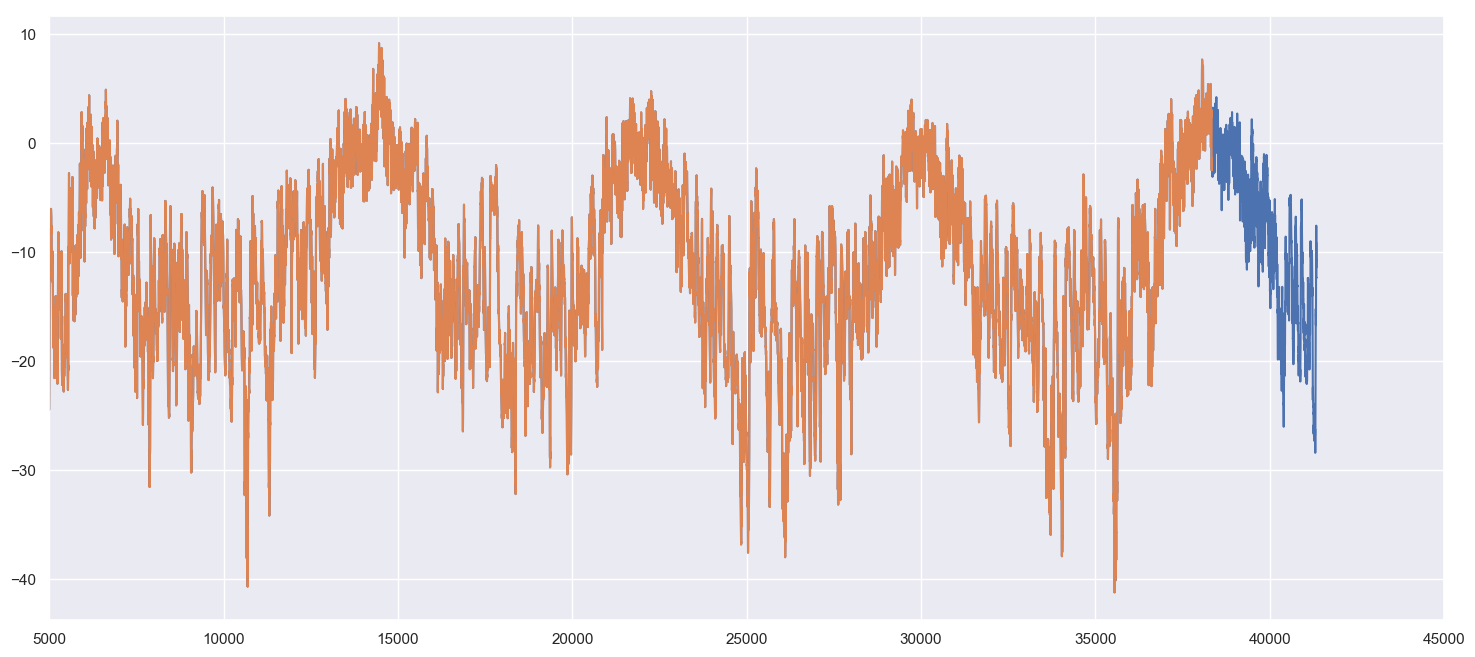

In [12]:
plt.xlim(5000,45000)
plt.plot(temp_values)
plt.plot(df.tempr.values)
plt.show()